In [1]:
# Uncomment the commented-out lines in this cell when generating ELMo embeddings to avoid excess warning messages.
import gc
import glob
import functools
import operator
import itertools
from sacremoses import MosesTokenizer  # For ELMo preprocessing
import matplotlib.pyplot as plt
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
# tf.get_logger().setLevel('ERROR')
# tf.logging.set_verbosity(tf.logging.ERROR)
# tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import tensorflow_hub as hub
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.decomposition import *
from sklearn.feature_selection import *
from Models import *

Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
fs = glob.glob(data_dir + wiki_dir + "*.jsonl")
elmo_tokenizer = MosesTokenizer()  # Tokenise in the same way as ELMo's original training
transl_elmo = lambda s: ' '.join(elmo_tokenizer.tokenize(s, escape=False)).replace(" ' s ", " 's ")

In [3]:
transl_elmo("From 1985―2015 Coster-Waldau"), transl_elmo("From 1985-2015 Coster-Waldau")  # Leaves the dashes alone

('From 1985 ― 2015 Coster-Waldau', 'From 1985-2015 Coster-Waldau')

In [4]:
claims, claims_vocab = load_claims(n=np.inf, test=True)  # Load all test claims
N_claims = len(claims)
N_claims, len(claims_vocab)

(19998, 12684)

In [5]:
# Load documents as term frequencies and total word counts
tfs, wiki, n_t = load_docs(fs, claims_vocab, load_tf=True)

49944 , 0 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  96 tasks      | elapsed:    1.3s
[Parallel(n_jobs=96)]: Done 258 tasks      | elapsed:    1.4s
[Parallel(n_jobs=96)]: Done 530 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 1234 tasks      | elapsed:    1.9s
[Parallel(n_jobs=96)]: Done 3088 tasks      | elapsed:    2.1s
[Parallel(n_jobs=96)]: Done 9792 tasks      | elapsed:    2.6s
[Parallel(n_jobs=96)]: Done 29184 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 49155 tasks      | elapsed:    4.5s
[Parallel(n_jobs=96)]: Done 49632 tasks      | elapsed:    4.9s
[Parallel(n_jobs=96)]: Done 49944 out of 49944 | elapsed:    5.0s finished


49903 , 1 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 874 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2272 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6080 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19520 tasks      | elapsed:    2.1s
[Parallel(n_jobs=96)]: Done 41408 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49220 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49634 tasks      | elapsed:    3.8s
[Parallel(n_jobs=96)]: Done 49903 out of 49903 | elapsed:    3.9s finished


49923 , 2 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 722 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 1424 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 3320 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 10016 tasks      | elapsed:    1.5s
[Parallel(n_jobs=96)]: Done 29440 tasks      | elapsed:    2.5s
[Parallel(n_jobs=96)]: Done 49285 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 49923 out of 49923 | elapsed:    4.0s finished


49938 , 3 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 872 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    2.0s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.6s
[Parallel(n_jobs=96)]: Done 49938 out of 49938 | elapsed:    3.7s finished


49948 , 4 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 118 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 368 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 972 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 4544 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 13184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=96)]: Done 22976 tasks      | elapsed:    2.1s
[Parallel(n_jobs=96)]: Done 33920 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 46016 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49654 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 49948 out of 49948 | elapsed:    3.8s finished


49905 , 5 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=96)]: Done 109 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 350 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 926 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 3032 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 9056 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 25984 tasks      | elapsed:    2.0s
[Parallel(n_jobs=96)]: Done 47683 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 48943 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49357 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 49905 out of 49905 | elapsed:    4.0s finished


48228 , 6 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 870 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6064 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    2.0s
[Parallel(n_jobs=96)]: Done 41226 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 44591 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 46661 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 48228 out of 48228 | elapsed:    3.6s finished


49957 , 7 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 874 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2272 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    2.1s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.6s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.8s
[Parallel(n_jobs=96)]: Done 49957 out of 49957 | elapsed:    3.9s finished


48178 , 8 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 107 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 346 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 908 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2592 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 8608 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 25472 tasks      | elapsed:    2.3s
[Parallel(n_jobs=96)]: Done 42546 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 44814 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 48178 out of 48178 | elapsed:    3.6s finished


49920 , 9 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 874 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2272 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    2.2s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.6s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.8s
[Parallel(n_jobs=96)]: Done 49920 out of 49920 | elapsed:    4.0s finished


49908 , 10 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 872 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2272 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6000 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.9s
[Parallel(n_jobs=96)]: Done 49908 out of 49908 | elapsed:    4.0s finished


49941 , 11 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 110 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 352 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 934 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 3792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 11872 tasks      | elapsed:    1.2s
[Parallel(n_jobs=96)]: Done 31424 tasks      | elapsed:    2.1s
[Parallel(n_jobs=96)]: Done 47918 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 48736 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 49564 tasks      | elapsed:    3.8s
[Parallel(n_jobs=96)]: Done 49750 out of 49941 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=96)]: Done 49941 out of 49941 | elapsed:    3.9s finished


49860 , 12 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 874 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2276 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 19520 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41408 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 49220 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49634 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49860 out of 49860 | elapsed:    3.6s finished


49915 , 13 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 108 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 348 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 918 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2612 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 8640 tasks      | elapsed:    1.1s
[Parallel(n_jobs=96)]: Done 18432 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 29376 tasks      | elapsed:    2.3s
[Parallel(n_jobs=96)]: Done 41472 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 48396 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 48846 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 49332 tasks      | elapsed:    4.0s
[Parallel(n_jobs=96)]: Done 49915 out of 49915 | elapsed:    4.3s finished


49930 , 14 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 104 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 340 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 898 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2320 tasks      | elapsed:    1.1s
[Parallel(n_jobs=96)]: Done 6080 tasks      | elapsed:    1.4s
[Parallel(n_jobs=96)]: Done 10976 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 16448 tasks      | elapsed:    2.2s
[Parallel(n_jobs=96)]: Done 26752 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 40000 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 49130 tasks      | elapsed:    4.2s
[Parallel(n_jobs=96)]: Done 49616 tasks      | elapsed:    4.5s
[Parallel(n_jobs=96)]: Done 49930 out of 49930 | elapsed:    4.6s finished


49921 , 15 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 872 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6048 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    2.4s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    4.0s
[Parallel(n_jobs=96)]: Done 49921 out of 49921 | elapsed:    4.1s finished


49928 , 16 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 868 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2268 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49928 out of 49928 | elapsed:    3.5s finished


49904 , 17 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  99 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 330 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 878 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2280 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6112 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19584 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 48908 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49413 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49904 out of 49904 | elapsed:    3.4s finished


49894 , 18 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 870 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2268 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6048 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    2.5s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.9s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    4.1s
[Parallel(n_jobs=96)]: Done 49894 out of 49894 | elapsed:    4.2s finished


49936 , 19 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  99 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 330 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 880 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6128 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19584 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41472 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49221 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49635 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49936 out of 49936 | elapsed:    3.6s finished


49925 , 20 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  96 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 324 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 868 tasks      | elapsed:    1.3s
[Parallel(n_jobs=96)]: Done 2260 tasks      | elapsed:    1.5s
[Parallel(n_jobs=96)]: Done 5184 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 14080 tasks      | elapsed:    2.4s
[Parallel(n_jobs=96)]: Done 35904 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49925 out of 49925 | elapsed:    4.1s finished


49937 , 21 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 878 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2272 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6064 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19520 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41408 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49220 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49634 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49937 out of 49937 | elapsed:    3.4s finished


49874 , 22 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 870 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2268 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49874 out of 49874 | elapsed:    3.5s finished


48725 , 23 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 870 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41228 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 44946 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 47430 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 48534 out of 48725 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=96)]: Done 48725 out of 48725 | elapsed:    3.6s finished


49936 , 24 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 332 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 886 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6128 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19648 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41536 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49222 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49636 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49936 out of 49936 | elapsed:    3.5s finished


49937 , 25 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 103 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 338 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 898 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2312 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6208 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 19840 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41728 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49225 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49639 tasks      | elapsed:    4.5s
[Parallel(n_jobs=96)]: Done 49937 out of 49937 | elapsed:    4.7s finished


49921 , 26 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 868 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6016 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49921 out of 49921 | elapsed:    3.5s finished


49899 , 27 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 876 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2272 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19520 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41408 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49220 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49634 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49899 out of 49899 | elapsed:    3.5s finished


49441 , 28 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=96)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 332 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 882 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6096 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19648 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41536 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49222 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49441 out of 49441 | elapsed:    3.2s finished


49949 , 29 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 103 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 338 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 892 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2312 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6224 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19840 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41728 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49225 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49639 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49949 out of 49949 | elapsed:    3.5s finished


49925 , 30 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 868 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2268 tasks      | elapsed:    1.9s
[Parallel(n_jobs=96)]: Done 5968 tasks      | elapsed:    2.2s
[Parallel(n_jobs=96)]: Done 12704 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 32128 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 46540 tasks      | elapsed:    4.4s
[Parallel(n_jobs=96)]: Done 48196 tasks      | elapsed:    4.7s
[Parallel(n_jobs=96)]: Done 49925 out of 49925 | elapsed:    4.9s finished


49944 , 31 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 872 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2272 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 19520 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41408 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49220 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49634 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49944 out of 49944 | elapsed:    3.5s finished


49932 , 32 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 109 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 350 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 940 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 3008 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 9056 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 25984 tasks      | elapsed:    2.0s
[Parallel(n_jobs=96)]: Done 47494 tasks      | elapsed:    4.2s
[Parallel(n_jobs=96)]: Done 48943 tasks      | elapsed:    4.5s
[Parallel(n_jobs=96)]: Done 49357 tasks      | elapsed:    4.8s
[Parallel(n_jobs=96)]: Done 49932 out of 49932 | elapsed:    5.1s finished


49901 , 33 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 868 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2272 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6064 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49901 out of 49901 | elapsed:    3.5s finished


49905 , 34 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 124 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 380 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 1012 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 4768 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 17344 tasks      | elapsed:    1.4s
[Parallel(n_jobs=96)]: Done 36928 tasks      | elapsed:    2.4s
[Parallel(n_jobs=96)]: Done 46860 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 47994 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 49236 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49905 out of 49905 | elapsed:    3.4s finished


49931 , 35 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=96)]: Done  99 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 330 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 878 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2280 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6080 tasks      | elapsed:    2.6s
[Parallel(n_jobs=96)]: Done 19584 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 41472 tasks      | elapsed:    4.6s
[Parallel(n_jobs=96)]: Done 49221 tasks      | elapsed:    5.0s
[Parallel(n_jobs=96)]: Done 49635 tasks      | elapsed:    5.3s
[Parallel(n_jobs=96)]: Done 49931 out of 49931 | elapsed:    5.4s finished


49883 , 36 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  96 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 324 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 864 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2256 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6000 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19392 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41280 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49218 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49632 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49883 out of 49883 | elapsed:    3.6s finished


49904 , 37 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 230 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 539 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 1424 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 3272 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 7408 tasks      | elapsed:    1.1s
[Parallel(n_jobs=96)]: Done 17120 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 29216 tasks      | elapsed:    2.4s
[Parallel(n_jobs=96)]: Done 42464 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 48835 tasks      | elapsed:    3.6s
[Parallel(n_jobs=96)]: Done 49321 tasks      | elapsed:    5.6s
[Parallel(n_jobs=96)]: Done 49713 out of 49904 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=96)]: Done 49904 out of 49904 | elapsed:    5.9s finished


49924 , 38 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 134 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 400 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 1102 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 5056 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 13696 tasks      | elapsed:    1.2s
[Parallel(n_jobs=96)]: Done 23488 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 34432 tasks      | elapsed:    2.3s
[Parallel(n_jobs=96)]: Done 46584 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 47826 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49176 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 49924 out of 49924 | elapsed:    3.8s finished


49931 , 39 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  96 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 324 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 866 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2256 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 5984 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19392 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41280 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49218 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49632 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49931 out of 49931 | elapsed:    3.5s finished


49907 , 40 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 876 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2276 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6048 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19520 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41408 tasks      | elapsed:    5.1s
[Parallel(n_jobs=96)]: Done 49220 tasks      | elapsed:    5.5s
[Parallel(n_jobs=96)]: Done 49634 tasks      | elapsed:    5.8s
[Parallel(n_jobs=96)]: Done 49907 out of 49907 | elapsed:    5.9s finished


49917 , 41 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 332 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 880 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2296 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6112 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19648 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41536 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49222 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49636 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49917 out of 49917 | elapsed:    3.5s finished


49919 , 42 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  99 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 330 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 882 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2292 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6064 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19584 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41472 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49221 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49635 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49919 out of 49919 | elapsed:    3.5s finished


49899 , 43 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 254 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 560 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 1476 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 3504 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 8928 tasks      | elapsed:    1.1s
[Parallel(n_jobs=96)]: Done 19840 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 31936 tasks      | elapsed:    4.5s
[Parallel(n_jobs=96)]: Done 39828 tasks      | elapsed:    5.1s
[Parallel(n_jobs=96)]: Done 42528 tasks      | elapsed:    5.5s
[Parallel(n_jobs=96)]: Done 45444 tasks      | elapsed:    5.9s
[Parallel(n_jobs=96)]: Done 49708 out of 49899 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=96)]: Done 49899 out of 49899 | elapsed:    6.4s finished


49928 , 44 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 878 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2272 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 15808 tasks      | elapsed:    1.5s
[Parallel(n_jobs=96)]: Done 26752 tasks      | elapsed:    2.1s
[Parallel(n_jobs=96)]: Done 38848 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 49027 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49508 tasks      | elapsed:    3.8s
[Parallel(n_jobs=96)]: Done 49928 out of 49928 | elapsed:    4.0s finished


49894 , 45 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 189 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 570 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 1310 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 3240 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 7568 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 17568 tasks      | elapsed:    1.6s
[Parallel(n_jobs=96)]: Done 29664 tasks      | elapsed:    2.3s
[Parallel(n_jobs=96)]: Done 42912 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 48663 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49149 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 49703 out of 49894 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=96)]: Done 49894 out of 49894 | elapsed:    4.1s finished


49898 , 46 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  99 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 330 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 882 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2280 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6096 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19584 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 32580 tasks      | elapsed:    4.3s
[Parallel(n_jobs=96)]: Done 37164 tasks      | elapsed:    4.8s
[Parallel(n_jobs=96)]: Done 46908 tasks      | elapsed:    5.4s
[Parallel(n_jobs=96)]: Done 48303 tasks      | elapsed:    5.7s
[Parallel(n_jobs=96)]: Done 49707 out of 49898 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=96)]: Done 49898 out of 49898 | elapsed:    6.1s finished


49920 , 47 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 102 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 336 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 890 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2328 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19776 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41664 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49224 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49638 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49920 out of 49920 | elapsed:    3.5s finished


49877 , 48 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 102 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 336 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 890 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2312 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6256 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19776 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41664 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49224 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49638 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49877 out of 49877 | elapsed:    3.5s finished


49946 , 49 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 103 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 338 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 898 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2320 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6240 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19840 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41728 tasks      | elapsed:    2.5s
[Parallel(n_jobs=96)]: Done 49225 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 49639 tasks      | elapsed:    5.0s
[Parallel(n_jobs=96)]: Done 49946 out of 49946 | elapsed:    5.1s finished


16523 , 50 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 876 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2284 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 12560 tasks      | elapsed:    1.2s
[Parallel(n_jobs=96)]: Done 13928 tasks      | elapsed:    1.5s
[Parallel(n_jobs=96)]: Done 15440 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 16332 out of 16523 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=96)]: Done 16523 out of 16523 | elapsed:    1.9s finished


49936 , 51 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 109 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 350 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 928 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2992 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 9056 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 25984 tasks      | elapsed:    2.0s
[Parallel(n_jobs=96)]: Done 47746 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 48943 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49357 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49936 out of 49936 | elapsed:    3.7s finished


49578 , 52 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  99 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 330 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 882 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2280 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6064 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19584 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41472 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49221 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49578 out of 49578 | elapsed:    3.6s finished


49921 , 53 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 330 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 876 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6080 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19520 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41408 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49220 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49634 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49921 out of 49921 | elapsed:    3.6s finished


49916 , 54 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 876 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2272 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6016 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 15808 tasks      | elapsed:    1.6s
[Parallel(n_jobs=96)]: Done 26752 tasks      | elapsed:    2.4s
[Parallel(n_jobs=96)]: Done 38848 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49058 tasks      | elapsed:    3.8s
[Parallel(n_jobs=96)]: Done 49508 tasks      | elapsed:    4.1s
[Parallel(n_jobs=96)]: Done 49916 out of 49916 | elapsed:    4.4s finished


49903 , 55 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 103 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 338 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 898 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2312 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 15968 tasks      | elapsed:    1.4s
[Parallel(n_jobs=96)]: Done 26912 tasks      | elapsed:    2.1s
[Parallel(n_jobs=96)]: Done 39008 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49063 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49513 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 49903 out of 49903 | elapsed:    3.8s finished


49914 , 56 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  23 tasks      | elapsed:    0.0s
[Parallel(n_jobs=96)]: Done 130 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 392 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 1044 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 4112 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 16192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=96)]: Done 35776 tasks      | elapsed:    2.4s
[Parallel(n_jobs=96)]: Done 45746 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 47636 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49914 out of 49914 | elapsed:    3.3s finished


49904 , 57 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  99 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 330 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 878 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2280 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6064 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19584 tasks      | elapsed:    1.6s
[Parallel(n_jobs=96)]: Done 41472 tasks      | elapsed:    2.6s
[Parallel(n_jobs=96)]: Done 49221 tasks      | elapsed:    5.8s
[Parallel(n_jobs=96)]: Done 49635 tasks      | elapsed:    6.0s
[Parallel(n_jobs=96)]: Done 49904 out of 49904 | elapsed:    6.1s finished


49948 , 58 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 102 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 336 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 926 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2912 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 8832 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 25536 tasks      | elapsed:    1.9s
[Parallel(n_jobs=96)]: Done 47235 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 48936 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 49350 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49948 out of 49948 | elapsed:    3.6s finished


49915 , 59 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 870 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 5984 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 15776 tasks      | elapsed:    1.5s
[Parallel(n_jobs=96)]: Done 26720 tasks      | elapsed:    2.1s
[Parallel(n_jobs=96)]: Done 38816 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49057 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49507 tasks      | elapsed:    3.8s
[Parallel(n_jobs=96)]: Done 49915 out of 49915 | elapsed:    4.0s finished


49944 , 60 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 870 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6064 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    2.0s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 49944 out of 49944 | elapsed:    3.8s finished


49896 , 61 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 108 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 348 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 928 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2984 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 9024 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 27840 tasks      | elapsed:    2.2s
[Parallel(n_jobs=96)]: Done 48756 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49134 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49548 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49896 out of 49896 | elapsed:    3.5s finished


49917 , 62 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 874 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6048 tasks      | elapsed:    0.8s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.6s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.6s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49917 out of 49917 | elapsed:    3.4s finished


49888 , 63 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  99 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 330 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 876 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2284 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6112 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19584 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41472 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49221 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49635 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49888 out of 49888 | elapsed:    3.6s finished


49912 , 64 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 872 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6016 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49912 out of 49912 | elapsed:    3.5s finished


49926 , 65 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 109 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 350 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 938 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 3776 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 11840 tasks      | elapsed:    1.2s
[Parallel(n_jobs=96)]: Done 39236 tasks      | elapsed:    2.4s
[Parallel(n_jobs=96)]: Done 48362 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49118 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 49926 out of 49926 | elapsed:    3.2s finished


49912 , 66 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 874 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 2276 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 6016 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    4.2s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    5.4s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    5.7s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    6.0s
[Parallel(n_jobs=96)]: Done 49912 out of 49912 | elapsed:    6.1s finished


48586 , 67 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 870 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6048 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41228 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 44946 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 47430 tasks      | elapsed:    3.6s
[Parallel(n_jobs=96)]: Done 48586 out of 48586 | elapsed:    3.7s finished


49630 , 68 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 876 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6000 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49630 out of 49630 | elapsed:    3.5s finished


49933 , 69 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 332 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 884 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2296 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6112 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19648 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41536 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49222 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49636 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49933 out of 49933 | elapsed:    3.4s finished


49910 , 70 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 874 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2280 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6080 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19520 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41408 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49220 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49634 tasks      | elapsed:    6.2s
[Parallel(n_jobs=96)]: Done 49910 out of 49910 | elapsed:    6.3s finished


49926 , 71 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  96 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 324 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 870 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2256 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 5984 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19392 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41280 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49218 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49632 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49926 out of 49926 | elapsed:    3.6s finished


49928 , 72 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  99 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 330 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 876 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2280 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6064 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19584 tasks      | elapsed:    1.6s
[Parallel(n_jobs=96)]: Done 41472 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 49221 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49635 tasks      | elapsed:    3.6s
[Parallel(n_jobs=96)]: Done 49928 out of 49928 | elapsed:    3.7s finished


49936 , 73 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 104 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 340 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 896 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2324 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6256 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19904 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41792 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49226 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49640 tasks      | elapsed:    3.8s
[Parallel(n_jobs=96)]: Done 49936 out of 49936 | elapsed:    3.9s finished


49710 , 74 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 102 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 336 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 888 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2304 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6208 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19776 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41664 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49224 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49710 out of 49710 | elapsed:    3.3s finished


49896 , 75 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=96)]: Done 188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 576 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 1322 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 3272 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 8256 tasks      | elapsed:    1.1s
[Parallel(n_jobs=96)]: Done 19200 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 31296 tasks      | elapsed:    2.4s
[Parallel(n_jobs=96)]: Done 44544 tasks      | elapsed:    5.8s
[Parallel(n_jobs=96)]: Done 49116 tasks      | elapsed:    6.2s
[Parallel(n_jobs=96)]: Done 49896 out of 49896 | elapsed:    6.3s finished


49696 , 76 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 876 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6016 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.6s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.6s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 49696 out of 49696 | elapsed:    3.2s finished


49958 , 77 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 874 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2272 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.6s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49958 out of 49958 | elapsed:    3.5s finished


49719 , 78 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 123 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 378 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 1012 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 4720 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 17280 tasks      | elapsed:    1.5s
[Parallel(n_jobs=96)]: Done 46407 tasks      | elapsed:    2.6s
[Parallel(n_jobs=96)]: Done 47433 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 48567 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49719 out of 49719 | elapsed:    3.3s finished


48973 , 79 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 880 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2280 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6048 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19520 tasks      | elapsed:    1.6s
[Parallel(n_jobs=96)]: Done 48973 out of 48973 | elapsed:    2.8s finished


49925 , 80 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 868 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.6s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.6s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49925 out of 49925 | elapsed:    3.4s finished


49876 , 81 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    3.7s
[Parallel(n_jobs=96)]: Done 870 tasks      | elapsed:    3.8s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    4.0s
[Parallel(n_jobs=96)]: Done 6000 tasks      | elapsed:    4.4s
[Parallel(n_jobs=96)]: Done 15776 tasks      | elapsed:    4.9s
[Parallel(n_jobs=96)]: Done 26720 tasks      | elapsed:    5.5s
[Parallel(n_jobs=96)]: Done 38816 tasks      | elapsed:    6.2s
[Parallel(n_jobs=96)]: Done 49057 tasks      | elapsed:    6.8s
[Parallel(n_jobs=96)]: Done 49507 tasks      | elapsed:    7.1s
[Parallel(n_jobs=96)]: Done 49876 out of 49876 | elapsed:    7.2s finished


49931 , 82 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 332 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 882 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2300 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6096 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19648 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41536 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49222 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49636 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49931 out of 49931 | elapsed:    3.6s finished


49897 , 83 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 870 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6016 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49897 out of 49897 | elapsed:    3.5s finished


49849 , 84 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 101 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 334 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 892 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2304 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6160 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19712 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41600 tasks      | elapsed:    2.6s
[Parallel(n_jobs=96)]: Done 49223 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 49637 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49849 out of 49849 | elapsed:    3.3s finished


49938 , 85 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=96)]: Done  99 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 330 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 876 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2284 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6064 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19584 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41472 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49221 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49635 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49938 out of 49938 | elapsed:    3.6s finished


49953 , 86 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 115 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 363 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 940 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2720 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 8864 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 25984 tasks      | elapsed:    5.7s
[Parallel(n_jobs=96)]: Done 42958 tasks      | elapsed:    6.3s
[Parallel(n_jobs=96)]: Done 47978 tasks      | elapsed:    6.7s
[Parallel(n_jobs=96)]: Done 48806 tasks      | elapsed:    7.0s
[Parallel(n_jobs=96)]: Done 49762 out of 49953 | elapsed:    7.3s remaining:    0.0s
[Parallel(n_jobs=96)]: Done 49953 out of 49953 | elapsed:    7.3s finished


49928 , 87 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 256 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 568 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 1480 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 3384 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 7632 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 17568 tasks      | elapsed:    1.6s
[Parallel(n_jobs=96)]: Done 29664 tasks      | elapsed:    2.3s
[Parallel(n_jobs=96)]: Done 42912 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 48849 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49335 tasks      | elapsed:    3.8s
[Parallel(n_jobs=96)]: Done 49737 out of 49928 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=96)]: Done 49928 out of 49928 | elapsed:    4.0s finished


49874 , 88 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 112 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 356 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 970 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 3824 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 12096 tasks      | elapsed:    1.2s
[Parallel(n_jobs=96)]: Done 31552 tasks      | elapsed:    2.2s
[Parallel(n_jobs=96)]: Done 47984 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 48740 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49874 out of 49874 | elapsed:    3.7s finished


49944 , 89 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 870 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6096 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49944 out of 49944 | elapsed:    3.5s finished


49923 , 90 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 332 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 882 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2300 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6128 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19648 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41536 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 49222 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49636 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49923 out of 49923 | elapsed:    3.5s finished


49906 , 91 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 868 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2280 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6016 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49906 out of 49906 | elapsed:    3.5s finished


49896 , 92 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 872 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6048 tasks      | elapsed:    5.6s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    6.4s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    7.4s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    7.8s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    8.1s
[Parallel(n_jobs=96)]: Done 49896 out of 49896 | elapsed:    8.2s finished


49893 , 93 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 107 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 346 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 924 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2976 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 8992 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 25856 tasks      | elapsed:    1.9s
[Parallel(n_jobs=96)]: Done 47303 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 48941 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49355 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49893 out of 49893 | elapsed:    3.7s finished


49923 , 94 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 328 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 874 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2272 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6032 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 19520 tasks      | elapsed:    2.1s
[Parallel(n_jobs=96)]: Done 41408 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49220 tasks      | elapsed:    3.8s
[Parallel(n_jobs=96)]: Done 49634 tasks      | elapsed:    4.2s
[Parallel(n_jobs=96)]: Done 49923 out of 49923 | elapsed:    4.3s finished


49890 , 95 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  96 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 324 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 864 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2268 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6016 tasks      | elapsed:    0.8s
[Parallel(n_jobs=96)]: Done 19392 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41280 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49218 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49632 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49890 out of 49890 | elapsed:    3.4s finished


49865 , 96 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 105 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 343 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 902 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2568 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 8544 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 25344 tasks      | elapsed:    1.9s
[Parallel(n_jobs=96)]: Done 46854 tasks      | elapsed:    2.8s
[Parallel(n_jobs=96)]: Done 48555 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 48969 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49419 tasks      | elapsed:    3.6s
[Parallel(n_jobs=96)]: Done 49865 out of 49865 | elapsed:    3.8s finished


49896 , 97 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 108 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 349 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 912 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2360 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6384 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 20160 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 42048 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49230 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49644 tasks      | elapsed:    3.4s
[Parallel(n_jobs=96)]: Done 49896 out of 49896 | elapsed:    3.5s finished


49939 , 98 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 332 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 884 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6112 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19648 tasks      | elapsed:    6.4s
[Parallel(n_jobs=96)]: Done 32592 tasks      | elapsed:    6.9s
[Parallel(n_jobs=96)]: Done 39120 tasks      | elapsed:    7.4s
[Parallel(n_jobs=96)]: Done 49156 tasks      | elapsed:    7.9s
[Parallel(n_jobs=96)]: Done 49606 tasks      | elapsed:    8.2s
[Parallel(n_jobs=96)]: Done 49939 out of 49939 | elapsed:    8.3s finished


49174 , 99 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 108 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 348 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 914 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2352 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6352 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 20160 tasks      | elapsed:    1.6s
[Parallel(n_jobs=96)]: Done 42048 tasks      | elapsed:    2.6s
[Parallel(n_jobs=96)]: Done 48983 out of 49174 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=96)]: Done 49174 out of 49174 | elapsed:    2.8s finished


49954 , 100 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 172 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 548 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 1268 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 2772 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 6208 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 14528 tasks      | elapsed:    1.6s
[Parallel(n_jobs=96)]: Done 26624 tasks      | elapsed:    2.3s
[Parallel(n_jobs=96)]: Done 39872 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 48940 tasks      | elapsed:    4.0s
[Parallel(n_jobs=96)]: Done 49426 tasks      | elapsed:    4.3s
[Parallel(n_jobs=96)]: Done 49763 out of 49954 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=96)]: Done 49954 out of 49954 | elapsed:    4.5s finished


49931 , 101 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 106 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 344 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 906 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6288 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 20032 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 41920 tasks      | elapsed:    2.9s
[Parallel(n_jobs=96)]: Done 49228 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49642 tasks      | elapsed:    3.5s
[Parallel(n_jobs=96)]: Done 49931 out of 49931 | elapsed:    3.7s finished


47872 , 102 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 230 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 542 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 1428 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 3288 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 7440 tasks      | elapsed:    1.1s
[Parallel(n_jobs=96)]: Done 12912 tasks      | elapsed:    1.5s
[Parallel(n_jobs=96)]: Done 18960 tasks      | elapsed:    2.0s
[Parallel(n_jobs=96)]: Done 25584 tasks      | elapsed:    2.5s
[Parallel(n_jobs=96)]: Done 32784 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 40560 tasks      | elapsed:    3.6s
[Parallel(n_jobs=96)]: Done 47142 tasks      | elapsed:    4.1s
[Parallel(n_jobs=96)]: Done 47681 out of 47872 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=96)]: Done 47872 out of 47872 | elapsed:    4.5s finished


49885 , 103 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 106 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 344 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 912 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2976 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 8960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 25792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=96)]: Done 47428 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 48940 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 49354 tasks      | elapsed:    3.2s
[Parallel(n_jobs=96)]: Done 49885 out of 49885 | elapsed:    3.5s finished


49954 , 104 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 110 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 352 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 928 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 3032 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 11136 tasks      | elapsed:    1.2s
[Parallel(n_jobs=96)]: Done 30656 tasks      | elapsed:    2.1s
[Parallel(n_jobs=96)]: Done 47176 tasks      | elapsed:    6.6s
[Parallel(n_jobs=96)]: Done 48432 tasks      | elapsed:    6.9s
[Parallel(n_jobs=96)]: Done 49954 out of 49954 | elapsed:    7.2s finished


49896 , 105 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 332 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 882 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6144 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19648 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41536 tasks      | elapsed:    2.6s
[Parallel(n_jobs=96)]: Done 49222 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49636 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49896 out of 49896 | elapsed:    3.4s finished


49905 , 106 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=96)]: Done 117 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 367 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 964 tasks      | elapsed:    0.4s
[Parallel(n_jobs=96)]: Done 4528 tasks      | elapsed:    0.7s
[Parallel(n_jobs=96)]: Done 16896 tasks      | elapsed:    1.3s
[Parallel(n_jobs=96)]: Done 36480 tasks      | elapsed:    2.4s
[Parallel(n_jobs=96)]: Done 46778 tasks      | elapsed:    3.0s
[Parallel(n_jobs=96)]: Done 47973 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49215 tasks      | elapsed:    3.6s
[Parallel(n_jobs=96)]: Done 49905 out of 49905 | elapsed:    3.7s finished


49887 , 107 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 326 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 872 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2264 tasks      | elapsed:    0.5s
[Parallel(n_jobs=96)]: Done 6000 tasks      | elapsed:    1.0s
[Parallel(n_jobs=96)]: Done 19456 tasks      | elapsed:    2.4s
[Parallel(n_jobs=96)]: Done 41344 tasks      | elapsed:    3.8s
[Parallel(n_jobs=96)]: Done 49219 tasks      | elapsed:    4.2s
[Parallel(n_jobs=96)]: Done 49633 tasks      | elapsed:    4.6s
[Parallel(n_jobs=96)]: Done 49887 out of 49887 | elapsed:    4.7s finished


49938 , 108 / 109


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=96)]: Done 332 tasks      | elapsed:    0.2s
[Parallel(n_jobs=96)]: Done 880 tasks      | elapsed:    0.3s
[Parallel(n_jobs=96)]: Done 2296 tasks      | elapsed:    0.6s
[Parallel(n_jobs=96)]: Done 6128 tasks      | elapsed:    0.9s
[Parallel(n_jobs=96)]: Done 19648 tasks      | elapsed:    1.7s
[Parallel(n_jobs=96)]: Done 41536 tasks      | elapsed:    2.7s
[Parallel(n_jobs=96)]: Done 49222 tasks      | elapsed:    3.1s
[Parallel(n_jobs=96)]: Done 49636 tasks      | elapsed:    3.3s
[Parallel(n_jobs=96)]: Done 49938 out of 49938 | elapsed:    3.4s finished


In [6]:
D_ids = list(wiki.keys())
tdist = sorted([(a, b) for (b, a) in list(tfs.items())])[::-1]      # Term freqeuency distribution
y = [t[0] for t in tdist]
N_docs = len(wiki)                                                  # Number of documents
N = len(y)                                                          # Number of unique terms
mean_doc_len = np.mean([wiki[id_][1] for id_ in wiki])
words_total = sum(tfs.values())
c_M = {w: tfs[w] / words_total for w in tfs}
N_docs, N, mean_doc_len, words_total, c_M["the"], c_M["of"]

(5396101,
 5174471,
 117.62701346768714,
 634727245,
 0.0421404882344384,
 0.03353797267675188)

In [7]:
# Adjust variables to implement smooth IDF and smoothed Jelinik-Mercer/Dirichlet smoothing (assume that words found only in
# the query claim, and not in the wikipedia pages, occur once in the wikipedia pages, in one existing new document)
changed = False
for w in claims_vocab:
    if w not in n_t:
        n_t[w] = 0
        tfs[w] = 1
        N += 1
        changed = True
if changed:
    words_total = sum(tfs.values())
    c_M = {w: tfs[w] / words_total for w in tfs}

In [8]:
c_M_ = {w: c_M[w] for w in claims_vocab}

In [9]:
# Create doc_Ms (a document model for every a document) (Dirichlet smoothed)
mu = mean_doc_len * 30.0
wiki_M = {}
i_ = 0
for d in list(wiki.keys()):
    i_ += 1
    doc_tf, total = wiki[d]
    doc_M_weight = (1     / (total + mu))  # = (total / (total + mu)) / total
    c_M_weight   = (mu    / (total + mu))
    log_c_M_w = np.float32(np.log(c_M_weight))
    wiki_M[d] = {w: np.float32(np.log((doc_M_weight * doc_tf[w]) + (c_M_weight * c_M_[w]))) for w in doc_tf}, log_c_M_w
    del wiki[d]
    if i_ % 1000 == 0:
        sys_print("\r" + str(i_) + ' documents   (' + str(round(100 * i_ / N_docs)) + '%)')
c_M_log = {w: np.float32(np.log(c_M_[w])) for w in claims_vocab}

5396000 documents   (100%)

In [10]:
# save_ld((wiki_M, c_M_log), "loaded_docs_test")
wiki_M, c_M_log = load_ld("loaded_docs_test")

In [11]:
del wiki, tfs, c_M, tdist, y
gc.collect()

330588

In [19]:
# Define document model
def batch_sims(docs, sim_func, j, **ps):
    return [sim_func(*doc, **ps) for doc in docs]
#     save_ld(np.asarray([sim_func(*doc, **ps) for doc in docs]), "docdists_batch_" + str(j))
#     return []
def dirichlet_ll(doc_M, log_c_M_w, claims_=[], c_M_log_=[]):
    return np.float32([np.sum([
        (doc_M[w] if w in doc_M else (log_c_M_w + c_M_log_[w])) for w in claim["vocab"]]) for claim in claims_])
def retrieve_topdocs(sim_func, wiki_M_, **ps):
    batch_size = 2000
    D_batches = [D_ids[i * batch_size:(i + 1) * batch_size] for i in range((N_docs // batch_size) + 1)]
    D_batches = [[wiki_M_[doc_id] for doc_id in D_batch] for D_batch in D_batches]
    claims_ = ps["claims_"]
    print("Computing similarities (" + str(len(D_ids)) + " in " + str(len(D_batches)) + " batches)...")
#     similarities = sum(joblib.Parallel(n_jobs=n_cpu, verbose=500)(delayed(batch_sims)(
#         D_batches[i], sim_func, i, **ps) for i in range(len(D_batches))), [])
    sims_res = joblib.Parallel(n_jobs=n_cpu, verbose=500)(delayed(batch_sims)(
        D_batches[i], sim_func, i, **ps) for i in range(len(D_batches)))
    sys_print("Ranking documents...")
    top_docs = []
    for i in range(len(claims_)):
#         sims = np.asarray([similarities[j][i] for j in range(len(similarities))])
        sims = np.concatenate([[sims_res[k][j][i] for j in range(len(sims_res[k]))] for k in range(len(sims_res))])
        ord_ = np.argsort(sims)
        top_docs.append([D_ids[j] for j in ord_[-50:]])
        sys_print("\rRanking documents... " + str(i + 1) + '/' + str(len(claims_)) + ' ')
    return top_docs

In [24]:
cb_size, top_docs = 4000, []
c_batches = [claims[i * cb_size:(i + 1) * cb_size] for i in range((len(claims) // cb_size) + 1)]
for claims_b in c_batches[3:]:
    claims_vocab_b = set(sum([list(c["vocab"]) for c in claims_b], []))
    wiki_M_b = {}
    i_ = 0
    for d in list(wiki_M.keys()):
        i_ += 1
        doc_M, log_c_M_w = wiki_M[d]
        wiki_M_b[d] = {w: doc_M[w] for w in claims_vocab_b if w in doc_M}, log_c_M_w
        if i_ % 1000 == 0:
            sys_print("\rSlimming document model " + str(i_) + '   (' + str(round(100 * i_ / N_docs)) + '%)  ')
    c_M_log_b = {w: c_M_log[w] for w in claims_vocab_b}
    top_docs += retrieve_topdocs(dirichlet_ll, wiki_M_b, claims_=claims_b, c_M_log_=c_M_log_b)

Slimming document model 5396000   (100%)  Computing similarities (5396101 in 2699 batches)...
[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   1 tasks      | elapsed:  1.6min
[Parallel(n_jobs=96)]: Done   2 tasks      | elapsed:  2.7min
[Parallel(n_jobs=96)]: Done   3 tasks      | elapsed:  2.7min
[Parallel(n_jobs=96)]: Done   4 tasks      | elapsed:  2.8min
[Parallel(n_jobs=96)]: Done   5 tasks      | elapsed:  2.8min
[Parallel(n_jobs=96)]: Done   6 tasks      | elapsed:  2.8min
[Parallel(n_jobs=96)]: Done   7 tasks      | elapsed:  2.8min
[Parallel(n_jobs=96)]: Done   8 tasks      | elapsed:  2.8min
[Parallel(n_jobs=96)]: Done   9 tasks      | elapsed:  2.9min
[Parallel(n_jobs=96)]: Done  10 tasks      | elapsed:  2.9min
[Parallel(n_jobs=96)]: Done  11 tasks      | elapsed:  2.9min
[Parallel(n_jobs=96)]: Done  12 tasks      | elapsed:  2.9min
[Parallel(n_jobs=96)]: Done  13 tasks      | elapsed:  2.9min
[Parallel(n_jobs=96)]: 

[Parallel(n_jobs=96)]: Done 131 tasks      | elapsed:  6.4min
[Parallel(n_jobs=96)]: Done 132 tasks      | elapsed:  6.4min
[Parallel(n_jobs=96)]: Done 133 tasks      | elapsed:  6.4min
[Parallel(n_jobs=96)]: Done 134 tasks      | elapsed:  6.5min
[Parallel(n_jobs=96)]: Done 135 tasks      | elapsed:  6.5min
[Parallel(n_jobs=96)]: Done 136 tasks      | elapsed:  6.5min
[Parallel(n_jobs=96)]: Done 137 tasks      | elapsed:  6.5min
[Parallel(n_jobs=96)]: Done 138 tasks      | elapsed:  6.6min
[Parallel(n_jobs=96)]: Done 139 tasks      | elapsed:  6.6min
[Parallel(n_jobs=96)]: Done 140 tasks      | elapsed:  6.6min
[Parallel(n_jobs=96)]: Done 141 tasks      | elapsed:  6.7min
[Parallel(n_jobs=96)]: Done 142 tasks      | elapsed:  6.7min
[Parallel(n_jobs=96)]: Done 143 tasks      | elapsed:  6.7min
[Parallel(n_jobs=96)]: Done 144 tasks      | elapsed:  6.7min
[Parallel(n_jobs=96)]: Done 145 tasks      | elapsed:  6.7min
[Parallel(n_jobs=96)]: Done 146 tasks      | elapsed:  6.8min
[Paralle

[Parallel(n_jobs=96)]: Done 264 tasks      | elapsed: 10.1min
[Parallel(n_jobs=96)]: Done 265 tasks      | elapsed: 10.1min
[Parallel(n_jobs=96)]: Done 266 tasks      | elapsed: 10.2min
[Parallel(n_jobs=96)]: Done 267 tasks      | elapsed: 10.2min
[Parallel(n_jobs=96)]: Done 268 tasks      | elapsed: 10.2min
[Parallel(n_jobs=96)]: Done 269 tasks      | elapsed: 10.2min
[Parallel(n_jobs=96)]: Done 270 tasks      | elapsed: 10.3min
[Parallel(n_jobs=96)]: Done 271 tasks      | elapsed: 10.3min
[Parallel(n_jobs=96)]: Done 272 tasks      | elapsed: 10.3min
[Parallel(n_jobs=96)]: Done 273 tasks      | elapsed: 10.4min
[Parallel(n_jobs=96)]: Done 274 tasks      | elapsed: 10.4min
[Parallel(n_jobs=96)]: Done 275 tasks      | elapsed: 10.4min
[Parallel(n_jobs=96)]: Done 276 tasks      | elapsed: 10.4min
[Parallel(n_jobs=96)]: Done 277 tasks      | elapsed: 10.5min
[Parallel(n_jobs=96)]: Done 278 tasks      | elapsed: 10.5min
[Parallel(n_jobs=96)]: Done 279 tasks      | elapsed: 10.5min
[Paralle

[Parallel(n_jobs=96)]: Done 397 tasks      | elapsed: 14.0min
[Parallel(n_jobs=96)]: Done 398 tasks      | elapsed: 14.0min
[Parallel(n_jobs=96)]: Done 399 tasks      | elapsed: 14.0min
[Parallel(n_jobs=96)]: Done 400 tasks      | elapsed: 14.1min
[Parallel(n_jobs=96)]: Done 401 tasks      | elapsed: 14.1min
[Parallel(n_jobs=96)]: Done 402 tasks      | elapsed: 14.1min
[Parallel(n_jobs=96)]: Done 403 tasks      | elapsed: 14.1min
[Parallel(n_jobs=96)]: Done 404 tasks      | elapsed: 14.2min
[Parallel(n_jobs=96)]: Done 405 tasks      | elapsed: 14.2min
[Parallel(n_jobs=96)]: Done 406 tasks      | elapsed: 14.2min
[Parallel(n_jobs=96)]: Done 407 tasks      | elapsed: 14.3min
[Parallel(n_jobs=96)]: Done 408 tasks      | elapsed: 14.3min
[Parallel(n_jobs=96)]: Done 409 tasks      | elapsed: 14.4min
[Parallel(n_jobs=96)]: Done 410 tasks      | elapsed: 14.4min
[Parallel(n_jobs=96)]: Done 411 tasks      | elapsed: 14.4min
[Parallel(n_jobs=96)]: Done 412 tasks      | elapsed: 14.4min
[Paralle

[Parallel(n_jobs=96)]: Done 530 tasks      | elapsed: 17.8min
[Parallel(n_jobs=96)]: Done 531 tasks      | elapsed: 17.8min
[Parallel(n_jobs=96)]: Done 532 tasks      | elapsed: 17.9min
[Parallel(n_jobs=96)]: Done 533 tasks      | elapsed: 17.9min
[Parallel(n_jobs=96)]: Done 534 tasks      | elapsed: 17.9min
[Parallel(n_jobs=96)]: Done 535 tasks      | elapsed: 17.9min
[Parallel(n_jobs=96)]: Done 536 tasks      | elapsed: 17.9min
[Parallel(n_jobs=96)]: Done 537 tasks      | elapsed: 18.0min
[Parallel(n_jobs=96)]: Done 538 tasks      | elapsed: 18.0min
[Parallel(n_jobs=96)]: Done 539 tasks      | elapsed: 18.0min
[Parallel(n_jobs=96)]: Done 540 tasks      | elapsed: 18.1min
[Parallel(n_jobs=96)]: Done 541 tasks      | elapsed: 18.1min
[Parallel(n_jobs=96)]: Done 542 tasks      | elapsed: 18.2min
[Parallel(n_jobs=96)]: Done 543 tasks      | elapsed: 18.2min
[Parallel(n_jobs=96)]: Done 544 tasks      | elapsed: 18.2min
[Parallel(n_jobs=96)]: Done 545 tasks      | elapsed: 18.2min
[Paralle

[Parallel(n_jobs=96)]: Done 664 tasks      | elapsed: 21.6min
[Parallel(n_jobs=96)]: Done 665 tasks      | elapsed: 21.6min
[Parallel(n_jobs=96)]: Done 666 tasks      | elapsed: 21.7min
[Parallel(n_jobs=96)]: Done 667 tasks      | elapsed: 21.7min
[Parallel(n_jobs=96)]: Done 668 tasks      | elapsed: 21.7min
[Parallel(n_jobs=96)]: Done 669 tasks      | elapsed: 21.8min
[Parallel(n_jobs=96)]: Done 670 tasks      | elapsed: 21.8min
[Parallel(n_jobs=96)]: Done 671 tasks      | elapsed: 21.8min
[Parallel(n_jobs=96)]: Done 672 tasks      | elapsed: 21.8min
[Parallel(n_jobs=96)]: Done 673 tasks      | elapsed: 21.9min
[Parallel(n_jobs=96)]: Done 674 tasks      | elapsed: 21.9min
[Parallel(n_jobs=96)]: Done 675 tasks      | elapsed: 21.9min
[Parallel(n_jobs=96)]: Done 676 tasks      | elapsed: 22.0min
[Parallel(n_jobs=96)]: Done 677 tasks      | elapsed: 22.0min
[Parallel(n_jobs=96)]: Done 678 tasks      | elapsed: 22.0min
[Parallel(n_jobs=96)]: Done 679 tasks      | elapsed: 22.0min
[Paralle

[Parallel(n_jobs=96)]: Done 797 tasks      | elapsed: 25.5min
[Parallel(n_jobs=96)]: Done 798 tasks      | elapsed: 25.5min
[Parallel(n_jobs=96)]: Done 799 tasks      | elapsed: 25.5min
[Parallel(n_jobs=96)]: Done 800 tasks      | elapsed: 25.6min
[Parallel(n_jobs=96)]: Done 801 tasks      | elapsed: 25.6min
[Parallel(n_jobs=96)]: Done 802 tasks      | elapsed: 25.6min
[Parallel(n_jobs=96)]: Done 803 tasks      | elapsed: 25.7min
[Parallel(n_jobs=96)]: Done 804 tasks      | elapsed: 25.7min
[Parallel(n_jobs=96)]: Done 805 tasks      | elapsed: 25.7min
[Parallel(n_jobs=96)]: Done 806 tasks      | elapsed: 25.8min
[Parallel(n_jobs=96)]: Done 807 tasks      | elapsed: 25.8min
[Parallel(n_jobs=96)]: Done 808 tasks      | elapsed: 25.8min
[Parallel(n_jobs=96)]: Done 809 tasks      | elapsed: 25.8min
[Parallel(n_jobs=96)]: Done 810 tasks      | elapsed: 25.9min
[Parallel(n_jobs=96)]: Done 811 tasks      | elapsed: 25.9min
[Parallel(n_jobs=96)]: Done 812 tasks      | elapsed: 25.9min
[Paralle

[Parallel(n_jobs=96)]: Done 930 tasks      | elapsed: 29.5min
[Parallel(n_jobs=96)]: Done 931 tasks      | elapsed: 29.5min
[Parallel(n_jobs=96)]: Done 932 tasks      | elapsed: 29.5min
[Parallel(n_jobs=96)]: Done 933 tasks      | elapsed: 29.5min
[Parallel(n_jobs=96)]: Done 934 tasks      | elapsed: 29.6min
[Parallel(n_jobs=96)]: Done 935 tasks      | elapsed: 29.6min
[Parallel(n_jobs=96)]: Done 936 tasks      | elapsed: 29.6min
[Parallel(n_jobs=96)]: Done 937 tasks      | elapsed: 29.7min
[Parallel(n_jobs=96)]: Done 938 tasks      | elapsed: 29.7min
[Parallel(n_jobs=96)]: Done 939 tasks      | elapsed: 29.7min
[Parallel(n_jobs=96)]: Done 940 tasks      | elapsed: 29.8min
[Parallel(n_jobs=96)]: Done 941 tasks      | elapsed: 29.8min
[Parallel(n_jobs=96)]: Done 942 tasks      | elapsed: 29.8min
[Parallel(n_jobs=96)]: Done 943 tasks      | elapsed: 29.8min
[Parallel(n_jobs=96)]: Done 944 tasks      | elapsed: 29.9min
[Parallel(n_jobs=96)]: Done 945 tasks      | elapsed: 29.9min
[Paralle

[Parallel(n_jobs=96)]: Done 1062 tasks      | elapsed: 33.3min
[Parallel(n_jobs=96)]: Done 1063 tasks      | elapsed: 33.3min
[Parallel(n_jobs=96)]: Done 1064 tasks      | elapsed: 33.3min
[Parallel(n_jobs=96)]: Done 1065 tasks      | elapsed: 33.3min
[Parallel(n_jobs=96)]: Done 1066 tasks      | elapsed: 33.4min
[Parallel(n_jobs=96)]: Done 1067 tasks      | elapsed: 33.4min
[Parallel(n_jobs=96)]: Done 1068 tasks      | elapsed: 33.5min
[Parallel(n_jobs=96)]: Done 1069 tasks      | elapsed: 33.5min
[Parallel(n_jobs=96)]: Done 1070 tasks      | elapsed: 33.5min
[Parallel(n_jobs=96)]: Done 1071 tasks      | elapsed: 33.6min
[Parallel(n_jobs=96)]: Done 1072 tasks      | elapsed: 33.6min
[Parallel(n_jobs=96)]: Done 1073 tasks      | elapsed: 33.6min
[Parallel(n_jobs=96)]: Done 1074 tasks      | elapsed: 33.6min
[Parallel(n_jobs=96)]: Done 1075 tasks      | elapsed: 33.6min
[Parallel(n_jobs=96)]: Done 1076 tasks      | elapsed: 33.6min
[Parallel(n_jobs=96)]: Done 1077 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1193 tasks      | elapsed: 37.1min
[Parallel(n_jobs=96)]: Done 1194 tasks      | elapsed: 37.2min
[Parallel(n_jobs=96)]: Done 1195 tasks      | elapsed: 37.2min
[Parallel(n_jobs=96)]: Done 1196 tasks      | elapsed: 37.2min
[Parallel(n_jobs=96)]: Done 1197 tasks      | elapsed: 37.2min
[Parallel(n_jobs=96)]: Done 1198 tasks      | elapsed: 37.2min
[Parallel(n_jobs=96)]: Done 1199 tasks      | elapsed: 37.3min
[Parallel(n_jobs=96)]: Done 1200 tasks      | elapsed: 37.3min
[Parallel(n_jobs=96)]: Done 1201 tasks      | elapsed: 37.3min
[Parallel(n_jobs=96)]: Done 1202 tasks      | elapsed: 37.3min
[Parallel(n_jobs=96)]: Done 1203 tasks      | elapsed: 37.4min
[Parallel(n_jobs=96)]: Done 1204 tasks      | elapsed: 37.4min
[Parallel(n_jobs=96)]: Done 1205 tasks      | elapsed: 37.5min
[Parallel(n_jobs=96)]: Done 1206 tasks      | elapsed: 37.5min
[Parallel(n_jobs=96)]: Done 1207 tasks      | elapsed: 37.5min
[Parallel(n_jobs=96)]: Done 1208 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1324 tasks      | elapsed: 40.9min
[Parallel(n_jobs=96)]: Done 1325 tasks      | elapsed: 40.9min
[Parallel(n_jobs=96)]: Done 1326 tasks      | elapsed: 41.0min
[Parallel(n_jobs=96)]: Done 1327 tasks      | elapsed: 41.0min
[Parallel(n_jobs=96)]: Done 1328 tasks      | elapsed: 41.0min
[Parallel(n_jobs=96)]: Done 1329 tasks      | elapsed: 41.1min
[Parallel(n_jobs=96)]: Done 1330 tasks      | elapsed: 41.1min
[Parallel(n_jobs=96)]: Done 1331 tasks      | elapsed: 41.1min
[Parallel(n_jobs=96)]: Done 1332 tasks      | elapsed: 41.1min
[Parallel(n_jobs=96)]: Done 1333 tasks      | elapsed: 41.2min
[Parallel(n_jobs=96)]: Done 1334 tasks      | elapsed: 41.2min
[Parallel(n_jobs=96)]: Done 1335 tasks      | elapsed: 41.3min
[Parallel(n_jobs=96)]: Done 1336 tasks      | elapsed: 41.3min
[Parallel(n_jobs=96)]: Done 1337 tasks      | elapsed: 41.3min
[Parallel(n_jobs=96)]: Done 1338 tasks      | elapsed: 41.4min
[Parallel(n_jobs=96)]: Done 1339 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1455 tasks      | elapsed: 44.7min
[Parallel(n_jobs=96)]: Done 1456 tasks      | elapsed: 44.8min
[Parallel(n_jobs=96)]: Done 1457 tasks      | elapsed: 44.8min
[Parallel(n_jobs=96)]: Done 1458 tasks      | elapsed: 44.8min
[Parallel(n_jobs=96)]: Done 1459 tasks      | elapsed: 44.9min
[Parallel(n_jobs=96)]: Done 1460 tasks      | elapsed: 44.9min
[Parallel(n_jobs=96)]: Done 1461 tasks      | elapsed: 45.0min
[Parallel(n_jobs=96)]: Done 1462 tasks      | elapsed: 45.0min
[Parallel(n_jobs=96)]: Done 1463 tasks      | elapsed: 45.0min
[Parallel(n_jobs=96)]: Done 1464 tasks      | elapsed: 45.0min
[Parallel(n_jobs=96)]: Done 1465 tasks      | elapsed: 45.1min
[Parallel(n_jobs=96)]: Done 1466 tasks      | elapsed: 45.1min
[Parallel(n_jobs=96)]: Done 1467 tasks      | elapsed: 45.1min
[Parallel(n_jobs=96)]: Done 1468 tasks      | elapsed: 45.1min
[Parallel(n_jobs=96)]: Done 1469 tasks      | elapsed: 45.1min
[Parallel(n_jobs=96)]: Done 1470 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1587 tasks      | elapsed: 48.5min
[Parallel(n_jobs=96)]: Done 1588 tasks      | elapsed: 48.5min
[Parallel(n_jobs=96)]: Done 1589 tasks      | elapsed: 48.6min
[Parallel(n_jobs=96)]: Done 1590 tasks      | elapsed: 48.6min
[Parallel(n_jobs=96)]: Done 1591 tasks      | elapsed: 48.6min
[Parallel(n_jobs=96)]: Done 1592 tasks      | elapsed: 48.7min
[Parallel(n_jobs=96)]: Done 1593 tasks      | elapsed: 48.7min
[Parallel(n_jobs=96)]: Done 1594 tasks      | elapsed: 48.7min
[Parallel(n_jobs=96)]: Done 1595 tasks      | elapsed: 48.7min
[Parallel(n_jobs=96)]: Done 1596 tasks      | elapsed: 48.8min
[Parallel(n_jobs=96)]: Done 1597 tasks      | elapsed: 48.8min
[Parallel(n_jobs=96)]: Done 1598 tasks      | elapsed: 48.8min
[Parallel(n_jobs=96)]: Done 1599 tasks      | elapsed: 48.8min
[Parallel(n_jobs=96)]: Done 1600 tasks      | elapsed: 48.9min
[Parallel(n_jobs=96)]: Done 1601 tasks      | elapsed: 48.9min
[Parallel(n_jobs=96)]: Done 1602 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1718 tasks      | elapsed: 52.3min
[Parallel(n_jobs=96)]: Done 1719 tasks      | elapsed: 52.3min
[Parallel(n_jobs=96)]: Done 1720 tasks      | elapsed: 52.4min
[Parallel(n_jobs=96)]: Done 1721 tasks      | elapsed: 52.4min
[Parallel(n_jobs=96)]: Done 1722 tasks      | elapsed: 52.4min
[Parallel(n_jobs=96)]: Done 1723 tasks      | elapsed: 52.4min
[Parallel(n_jobs=96)]: Done 1724 tasks      | elapsed: 52.5min
[Parallel(n_jobs=96)]: Done 1725 tasks      | elapsed: 52.5min
[Parallel(n_jobs=96)]: Done 1726 tasks      | elapsed: 52.5min
[Parallel(n_jobs=96)]: Done 1727 tasks      | elapsed: 52.5min
[Parallel(n_jobs=96)]: Done 1728 tasks      | elapsed: 52.5min
[Parallel(n_jobs=96)]: Done 1729 tasks      | elapsed: 52.6min
[Parallel(n_jobs=96)]: Done 1730 tasks      | elapsed: 52.6min
[Parallel(n_jobs=96)]: Done 1731 tasks      | elapsed: 52.6min
[Parallel(n_jobs=96)]: Done 1732 tasks      | elapsed: 52.6min
[Parallel(n_jobs=96)]: Done 1733 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1849 tasks      | elapsed: 56.2min
[Parallel(n_jobs=96)]: Done 1850 tasks      | elapsed: 56.2min
[Parallel(n_jobs=96)]: Done 1851 tasks      | elapsed: 56.2min
[Parallel(n_jobs=96)]: Done 1852 tasks      | elapsed: 56.3min
[Parallel(n_jobs=96)]: Done 1853 tasks      | elapsed: 56.3min
[Parallel(n_jobs=96)]: Done 1854 tasks      | elapsed: 56.4min
[Parallel(n_jobs=96)]: Done 1855 tasks      | elapsed: 56.4min
[Parallel(n_jobs=96)]: Done 1856 tasks      | elapsed: 56.4min
[Parallel(n_jobs=96)]: Done 1857 tasks      | elapsed: 56.4min
[Parallel(n_jobs=96)]: Done 1858 tasks      | elapsed: 56.4min
[Parallel(n_jobs=96)]: Done 1859 tasks      | elapsed: 56.5min
[Parallel(n_jobs=96)]: Done 1860 tasks      | elapsed: 56.5min
[Parallel(n_jobs=96)]: Done 1861 tasks      | elapsed: 56.5min
[Parallel(n_jobs=96)]: Done 1862 tasks      | elapsed: 56.5min
[Parallel(n_jobs=96)]: Done 1863 tasks      | elapsed: 56.6min
[Parallel(n_jobs=96)]: Done 1864 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1980 tasks      | elapsed: 59.9min
[Parallel(n_jobs=96)]: Done 1981 tasks      | elapsed: 59.9min
[Parallel(n_jobs=96)]: Done 1982 tasks      | elapsed: 60.0min
[Parallel(n_jobs=96)]: Done 1983 tasks      | elapsed: 60.0min
[Parallel(n_jobs=96)]: Done 1984 tasks      | elapsed: 60.0min
[Parallel(n_jobs=96)]: Done 1985 tasks      | elapsed: 60.1min
[Parallel(n_jobs=96)]: Done 1986 tasks      | elapsed: 60.1min
[Parallel(n_jobs=96)]: Done 1987 tasks      | elapsed: 60.1min
[Parallel(n_jobs=96)]: Done 1988 tasks      | elapsed: 60.2min
[Parallel(n_jobs=96)]: Done 1989 tasks      | elapsed: 60.2min
[Parallel(n_jobs=96)]: Done 1990 tasks      | elapsed: 60.3min
[Parallel(n_jobs=96)]: Done 1991 tasks      | elapsed: 60.3min
[Parallel(n_jobs=96)]: Done 1992 tasks      | elapsed: 60.3min
[Parallel(n_jobs=96)]: Done 1993 tasks      | elapsed: 60.3min
[Parallel(n_jobs=96)]: Done 1994 tasks      | elapsed: 60.3min
[Parallel(n_jobs=96)]: Done 1995 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 2111 tasks      | elapsed: 63.8min
[Parallel(n_jobs=96)]: Done 2112 tasks      | elapsed: 63.8min
[Parallel(n_jobs=96)]: Done 2113 tasks      | elapsed: 63.8min
[Parallel(n_jobs=96)]: Done 2114 tasks      | elapsed: 63.8min
[Parallel(n_jobs=96)]: Done 2115 tasks      | elapsed: 63.9min
[Parallel(n_jobs=96)]: Done 2116 tasks      | elapsed: 63.9min
[Parallel(n_jobs=96)]: Done 2117 tasks      | elapsed: 63.9min
[Parallel(n_jobs=96)]: Done 2118 tasks      | elapsed: 64.0min
[Parallel(n_jobs=96)]: Done 2119 tasks      | elapsed: 64.0min
[Parallel(n_jobs=96)]: Done 2120 tasks      | elapsed: 64.0min
[Parallel(n_jobs=96)]: Done 2121 tasks      | elapsed: 64.1min
[Parallel(n_jobs=96)]: Done 2122 tasks      | elapsed: 64.1min
[Parallel(n_jobs=96)]: Done 2123 tasks      | elapsed: 64.1min
[Parallel(n_jobs=96)]: Done 2124 tasks      | elapsed: 64.1min
[Parallel(n_jobs=96)]: Done 2125 tasks      | elapsed: 64.2min
[Parallel(n_jobs=96)]: Done 2126 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 2242 tasks      | elapsed: 67.5min
[Parallel(n_jobs=96)]: Done 2243 tasks      | elapsed: 67.5min
[Parallel(n_jobs=96)]: Done 2244 tasks      | elapsed: 67.6min
[Parallel(n_jobs=96)]: Done 2245 tasks      | elapsed: 67.7min
[Parallel(n_jobs=96)]: Done 2246 tasks      | elapsed: 67.7min
[Parallel(n_jobs=96)]: Done 2247 tasks      | elapsed: 67.7min
[Parallel(n_jobs=96)]: Done 2248 tasks      | elapsed: 67.7min
[Parallel(n_jobs=96)]: Done 2249 tasks      | elapsed: 67.7min
[Parallel(n_jobs=96)]: Done 2250 tasks      | elapsed: 67.8min
[Parallel(n_jobs=96)]: Done 2251 tasks      | elapsed: 67.8min
[Parallel(n_jobs=96)]: Done 2252 tasks      | elapsed: 67.8min
[Parallel(n_jobs=96)]: Done 2253 tasks      | elapsed: 67.8min
[Parallel(n_jobs=96)]: Done 2254 tasks      | elapsed: 67.9min
[Parallel(n_jobs=96)]: Done 2255 tasks      | elapsed: 67.9min
[Parallel(n_jobs=96)]: Done 2256 tasks      | elapsed: 68.0min
[Parallel(n_jobs=96)]: Done 2257 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 2373 tasks      | elapsed: 71.4min
[Parallel(n_jobs=96)]: Done 2374 tasks      | elapsed: 71.4min
[Parallel(n_jobs=96)]: Done 2375 tasks      | elapsed: 71.4min
[Parallel(n_jobs=96)]: Done 2376 tasks      | elapsed: 71.5min
[Parallel(n_jobs=96)]: Done 2377 tasks      | elapsed: 71.5min
[Parallel(n_jobs=96)]: Done 2378 tasks      | elapsed: 71.6min
[Parallel(n_jobs=96)]: Done 2379 tasks      | elapsed: 71.6min
[Parallel(n_jobs=96)]: Done 2380 tasks      | elapsed: 71.6min
[Parallel(n_jobs=96)]: Done 2381 tasks      | elapsed: 71.6min
[Parallel(n_jobs=96)]: Done 2382 tasks      | elapsed: 71.6min
[Parallel(n_jobs=96)]: Done 2383 tasks      | elapsed: 71.6min
[Parallel(n_jobs=96)]: Done 2384 tasks      | elapsed: 71.7min
[Parallel(n_jobs=96)]: Done 2385 tasks      | elapsed: 71.7min
[Parallel(n_jobs=96)]: Done 2386 tasks      | elapsed: 71.7min
[Parallel(n_jobs=96)]: Done 2387 tasks      | elapsed: 71.8min
[Parallel(n_jobs=96)]: Done 2388 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 2504 tasks      | elapsed: 75.2min
[Parallel(n_jobs=96)]: Done 2505 tasks      | elapsed: 75.3min
[Parallel(n_jobs=96)]: Done 2506 tasks      | elapsed: 75.3min
[Parallel(n_jobs=96)]: Done 2507 tasks      | elapsed: 75.3min
[Parallel(n_jobs=96)]: Done 2508 tasks      | elapsed: 75.4min
[Parallel(n_jobs=96)]: Done 2509 tasks      | elapsed: 75.4min
[Parallel(n_jobs=96)]: Done 2514 out of 2699 | elapsed: 75.5min remaining:  5.6min
[Parallel(n_jobs=96)]: Done 2520 out of 2699 | elapsed: 75.7min remaining:  5.4min
[Parallel(n_jobs=96)]: Done 2526 out of 2699 | elapsed: 75.9min remaining:  5.2min
[Parallel(n_jobs=96)]: Done 2532 out of 2699 | elapsed: 76.0min remaining:  5.0min
[Parallel(n_jobs=96)]: Done 2538 out of 2699 | elapsed: 76.2min remaining:  4.8min
[Parallel(n_jobs=96)]: Done 2544 out of 2699 | elapsed: 76.3min remaining:  4.7min
[Parallel(n_jobs=96)]: Done 2550 out of 2699 | elapsed: 76.5min remaining:  4.5min
[Parallel(n_jobs=96)]: Done 2556 out of 2

[Parallel(n_jobs=96)]: Done  82 tasks      | elapsed:  4.9min
[Parallel(n_jobs=96)]: Done  83 tasks      | elapsed:  4.9min
[Parallel(n_jobs=96)]: Done  84 tasks      | elapsed:  5.0min
[Parallel(n_jobs=96)]: Done  85 tasks      | elapsed:  5.0min
[Parallel(n_jobs=96)]: Done  86 tasks      | elapsed:  5.0min
[Parallel(n_jobs=96)]: Done  87 tasks      | elapsed:  5.0min
[Parallel(n_jobs=96)]: Done  88 tasks      | elapsed:  5.2min
[Parallel(n_jobs=96)]: Done  89 tasks      | elapsed:  5.3min
[Parallel(n_jobs=96)]: Done  90 tasks      | elapsed:  5.3min
[Parallel(n_jobs=96)]: Done  91 tasks      | elapsed:  5.3min
[Parallel(n_jobs=96)]: Done  92 tasks      | elapsed:  5.3min
[Parallel(n_jobs=96)]: Done  93 tasks      | elapsed:  5.3min
[Parallel(n_jobs=96)]: Done  94 tasks      | elapsed:  5.4min
[Parallel(n_jobs=96)]: Done  95 tasks      | elapsed:  5.4min
[Parallel(n_jobs=96)]: Done  96 tasks      | elapsed:  5.4min
[Parallel(n_jobs=96)]: Done  97 tasks      | elapsed:  5.5min
[Paralle

[Parallel(n_jobs=96)]: Done 215 tasks      | elapsed:  8.7min
[Parallel(n_jobs=96)]: Done 216 tasks      | elapsed:  8.7min
[Parallel(n_jobs=96)]: Done 217 tasks      | elapsed:  8.7min
[Parallel(n_jobs=96)]: Done 218 tasks      | elapsed:  8.7min
[Parallel(n_jobs=96)]: Done 219 tasks      | elapsed:  8.8min
[Parallel(n_jobs=96)]: Done 220 tasks      | elapsed:  8.8min
[Parallel(n_jobs=96)]: Done 221 tasks      | elapsed:  8.8min
[Parallel(n_jobs=96)]: Done 222 tasks      | elapsed:  8.8min
[Parallel(n_jobs=96)]: Done 223 tasks      | elapsed:  8.9min
[Parallel(n_jobs=96)]: Done 224 tasks      | elapsed:  9.2min
[Parallel(n_jobs=96)]: Done 225 tasks      | elapsed:  9.2min
[Parallel(n_jobs=96)]: Done 226 tasks      | elapsed:  9.2min
[Parallel(n_jobs=96)]: Done 227 tasks      | elapsed:  9.2min
[Parallel(n_jobs=96)]: Done 228 tasks      | elapsed:  9.2min
[Parallel(n_jobs=96)]: Done 229 tasks      | elapsed:  9.3min
[Parallel(n_jobs=96)]: Done 230 tasks      | elapsed:  9.3min
[Paralle

[Parallel(n_jobs=96)]: Done 348 tasks      | elapsed: 12.5min
[Parallel(n_jobs=96)]: Done 349 tasks      | elapsed: 12.6min
[Parallel(n_jobs=96)]: Done 350 tasks      | elapsed: 12.6min
[Parallel(n_jobs=96)]: Done 351 tasks      | elapsed: 12.7min
[Parallel(n_jobs=96)]: Done 352 tasks      | elapsed: 12.7min
[Parallel(n_jobs=96)]: Done 353 tasks      | elapsed: 12.7min
[Parallel(n_jobs=96)]: Done 354 tasks      | elapsed: 12.7min
[Parallel(n_jobs=96)]: Done 355 tasks      | elapsed: 12.8min
[Parallel(n_jobs=96)]: Done 356 tasks      | elapsed: 12.8min
[Parallel(n_jobs=96)]: Done 357 tasks      | elapsed: 12.8min
[Parallel(n_jobs=96)]: Done 358 tasks      | elapsed: 12.9min
[Parallel(n_jobs=96)]: Done 359 tasks      | elapsed: 13.0min
[Parallel(n_jobs=96)]: Done 360 tasks      | elapsed: 13.0min
[Parallel(n_jobs=96)]: Done 361 tasks      | elapsed: 13.1min
[Parallel(n_jobs=96)]: Done 362 tasks      | elapsed: 13.1min
[Parallel(n_jobs=96)]: Done 363 tasks      | elapsed: 13.1min
[Paralle

[Parallel(n_jobs=96)]: Done 481 tasks      | elapsed: 16.5min
[Parallel(n_jobs=96)]: Done 482 tasks      | elapsed: 16.5min
[Parallel(n_jobs=96)]: Done 483 tasks      | elapsed: 16.5min
[Parallel(n_jobs=96)]: Done 484 tasks      | elapsed: 16.5min
[Parallel(n_jobs=96)]: Done 485 tasks      | elapsed: 16.6min
[Parallel(n_jobs=96)]: Done 486 tasks      | elapsed: 16.6min
[Parallel(n_jobs=96)]: Done 487 tasks      | elapsed: 16.6min
[Parallel(n_jobs=96)]: Done 488 tasks      | elapsed: 16.6min
[Parallel(n_jobs=96)]: Done 489 tasks      | elapsed: 16.7min
[Parallel(n_jobs=96)]: Done 490 tasks      | elapsed: 16.7min
[Parallel(n_jobs=96)]: Done 491 tasks      | elapsed: 16.7min
[Parallel(n_jobs=96)]: Done 492 tasks      | elapsed: 16.7min
[Parallel(n_jobs=96)]: Done 493 tasks      | elapsed: 16.9min
[Parallel(n_jobs=96)]: Done 494 tasks      | elapsed: 16.9min
[Parallel(n_jobs=96)]: Done 495 tasks      | elapsed: 16.9min
[Parallel(n_jobs=96)]: Done 496 tasks      | elapsed: 17.0min
[Paralle

[Parallel(n_jobs=96)]: Done 614 tasks      | elapsed: 20.3min
[Parallel(n_jobs=96)]: Done 615 tasks      | elapsed: 20.3min
[Parallel(n_jobs=96)]: Done 616 tasks      | elapsed: 20.3min
[Parallel(n_jobs=96)]: Done 617 tasks      | elapsed: 20.4min
[Parallel(n_jobs=96)]: Done 618 tasks      | elapsed: 20.4min
[Parallel(n_jobs=96)]: Done 619 tasks      | elapsed: 20.4min
[Parallel(n_jobs=96)]: Done 620 tasks      | elapsed: 20.5min
[Parallel(n_jobs=96)]: Done 621 tasks      | elapsed: 20.5min
[Parallel(n_jobs=96)]: Done 622 tasks      | elapsed: 20.5min
[Parallel(n_jobs=96)]: Done 623 tasks      | elapsed: 20.5min
[Parallel(n_jobs=96)]: Done 624 tasks      | elapsed: 20.6min
[Parallel(n_jobs=96)]: Done 625 tasks      | elapsed: 20.6min
[Parallel(n_jobs=96)]: Done 626 tasks      | elapsed: 20.6min
[Parallel(n_jobs=96)]: Done 627 tasks      | elapsed: 20.7min
[Parallel(n_jobs=96)]: Done 628 tasks      | elapsed: 20.8min
[Parallel(n_jobs=96)]: Done 629 tasks      | elapsed: 20.8min
[Paralle

[Parallel(n_jobs=96)]: Done 747 tasks      | elapsed: 24.2min
[Parallel(n_jobs=96)]: Done 748 tasks      | elapsed: 24.2min
[Parallel(n_jobs=96)]: Done 749 tasks      | elapsed: 24.3min
[Parallel(n_jobs=96)]: Done 750 tasks      | elapsed: 24.3min
[Parallel(n_jobs=96)]: Done 751 tasks      | elapsed: 24.4min
[Parallel(n_jobs=96)]: Done 752 tasks      | elapsed: 24.4min
[Parallel(n_jobs=96)]: Done 753 tasks      | elapsed: 24.4min
[Parallel(n_jobs=96)]: Done 754 tasks      | elapsed: 24.4min
[Parallel(n_jobs=96)]: Done 755 tasks      | elapsed: 24.5min
[Parallel(n_jobs=96)]: Done 756 tasks      | elapsed: 24.5min
[Parallel(n_jobs=96)]: Done 757 tasks      | elapsed: 24.5min
[Parallel(n_jobs=96)]: Done 758 tasks      | elapsed: 24.6min
[Parallel(n_jobs=96)]: Done 759 tasks      | elapsed: 24.6min
[Parallel(n_jobs=96)]: Done 760 tasks      | elapsed: 24.6min
[Parallel(n_jobs=96)]: Done 761 tasks      | elapsed: 24.7min
[Parallel(n_jobs=96)]: Done 762 tasks      | elapsed: 24.8min
[Paralle

[Parallel(n_jobs=96)]: Done 881 tasks      | elapsed: 28.3min
[Parallel(n_jobs=96)]: Done 882 tasks      | elapsed: 28.3min
[Parallel(n_jobs=96)]: Done 883 tasks      | elapsed: 28.3min
[Parallel(n_jobs=96)]: Done 884 tasks      | elapsed: 28.3min
[Parallel(n_jobs=96)]: Done 885 tasks      | elapsed: 28.4min
[Parallel(n_jobs=96)]: Done 886 tasks      | elapsed: 28.4min
[Parallel(n_jobs=96)]: Done 887 tasks      | elapsed: 28.4min
[Parallel(n_jobs=96)]: Done 888 tasks      | elapsed: 28.5min
[Parallel(n_jobs=96)]: Done 889 tasks      | elapsed: 28.5min
[Parallel(n_jobs=96)]: Done 890 tasks      | elapsed: 28.5min
[Parallel(n_jobs=96)]: Done 891 tasks      | elapsed: 28.5min
[Parallel(n_jobs=96)]: Done 892 tasks      | elapsed: 28.6min
[Parallel(n_jobs=96)]: Done 893 tasks      | elapsed: 28.6min
[Parallel(n_jobs=96)]: Done 894 tasks      | elapsed: 28.6min
[Parallel(n_jobs=96)]: Done 895 tasks      | elapsed: 28.8min
[Parallel(n_jobs=96)]: Done 896 tasks      | elapsed: 28.8min
[Paralle

[Parallel(n_jobs=96)]: Done 1013 tasks      | elapsed: 32.2min
[Parallel(n_jobs=96)]: Done 1014 tasks      | elapsed: 32.2min
[Parallel(n_jobs=96)]: Done 1015 tasks      | elapsed: 32.2min
[Parallel(n_jobs=96)]: Done 1016 tasks      | elapsed: 32.3min
[Parallel(n_jobs=96)]: Done 1017 tasks      | elapsed: 32.3min
[Parallel(n_jobs=96)]: Done 1018 tasks      | elapsed: 32.3min
[Parallel(n_jobs=96)]: Done 1019 tasks      | elapsed: 32.4min
[Parallel(n_jobs=96)]: Done 1020 tasks      | elapsed: 32.4min
[Parallel(n_jobs=96)]: Done 1021 tasks      | elapsed: 32.4min
[Parallel(n_jobs=96)]: Done 1022 tasks      | elapsed: 32.4min
[Parallel(n_jobs=96)]: Done 1023 tasks      | elapsed: 32.5min
[Parallel(n_jobs=96)]: Done 1024 tasks      | elapsed: 32.5min
[Parallel(n_jobs=96)]: Done 1025 tasks      | elapsed: 32.5min
[Parallel(n_jobs=96)]: Done 1026 tasks      | elapsed: 32.5min
[Parallel(n_jobs=96)]: Done 1027 tasks      | elapsed: 32.6min
[Parallel(n_jobs=96)]: Done 1028 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1144 tasks      | elapsed: 36.0min
[Parallel(n_jobs=96)]: Done 1145 tasks      | elapsed: 36.1min
[Parallel(n_jobs=96)]: Done 1146 tasks      | elapsed: 36.1min
[Parallel(n_jobs=96)]: Done 1147 tasks      | elapsed: 36.2min
[Parallel(n_jobs=96)]: Done 1148 tasks      | elapsed: 36.2min
[Parallel(n_jobs=96)]: Done 1149 tasks      | elapsed: 36.2min
[Parallel(n_jobs=96)]: Done 1150 tasks      | elapsed: 36.3min
[Parallel(n_jobs=96)]: Done 1151 tasks      | elapsed: 36.3min
[Parallel(n_jobs=96)]: Done 1152 tasks      | elapsed: 36.3min
[Parallel(n_jobs=96)]: Done 1153 tasks      | elapsed: 36.3min
[Parallel(n_jobs=96)]: Done 1154 tasks      | elapsed: 36.3min
[Parallel(n_jobs=96)]: Done 1155 tasks      | elapsed: 36.4min
[Parallel(n_jobs=96)]: Done 1156 tasks      | elapsed: 36.4min
[Parallel(n_jobs=96)]: Done 1157 tasks      | elapsed: 36.4min
[Parallel(n_jobs=96)]: Done 1158 tasks      | elapsed: 36.4min
[Parallel(n_jobs=96)]: Done 1159 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1275 tasks      | elapsed: 39.9min
[Parallel(n_jobs=96)]: Done 1276 tasks      | elapsed: 40.0min
[Parallel(n_jobs=96)]: Done 1277 tasks      | elapsed: 40.0min
[Parallel(n_jobs=96)]: Done 1278 tasks      | elapsed: 40.0min
[Parallel(n_jobs=96)]: Done 1279 tasks      | elapsed: 40.0min
[Parallel(n_jobs=96)]: Done 1280 tasks      | elapsed: 40.1min
[Parallel(n_jobs=96)]: Done 1281 tasks      | elapsed: 40.1min
[Parallel(n_jobs=96)]: Done 1282 tasks      | elapsed: 40.1min
[Parallel(n_jobs=96)]: Done 1283 tasks      | elapsed: 40.2min
[Parallel(n_jobs=96)]: Done 1284 tasks      | elapsed: 40.2min
[Parallel(n_jobs=96)]: Done 1285 tasks      | elapsed: 40.2min
[Parallel(n_jobs=96)]: Done 1286 tasks      | elapsed: 40.2min
[Parallel(n_jobs=96)]: Done 1287 tasks      | elapsed: 40.3min
[Parallel(n_jobs=96)]: Done 1288 tasks      | elapsed: 40.3min
[Parallel(n_jobs=96)]: Done 1289 tasks      | elapsed: 40.3min
[Parallel(n_jobs=96)]: Done 1290 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1406 tasks      | elapsed: 43.9min
[Parallel(n_jobs=96)]: Done 1407 tasks      | elapsed: 43.9min
[Parallel(n_jobs=96)]: Done 1408 tasks      | elapsed: 43.9min
[Parallel(n_jobs=96)]: Done 1409 tasks      | elapsed: 43.9min
[Parallel(n_jobs=96)]: Done 1410 tasks      | elapsed: 43.9min
[Parallel(n_jobs=96)]: Done 1411 tasks      | elapsed: 44.0min
[Parallel(n_jobs=96)]: Done 1412 tasks      | elapsed: 44.0min
[Parallel(n_jobs=96)]: Done 1413 tasks      | elapsed: 44.1min
[Parallel(n_jobs=96)]: Done 1414 tasks      | elapsed: 44.1min
[Parallel(n_jobs=96)]: Done 1415 tasks      | elapsed: 44.1min
[Parallel(n_jobs=96)]: Done 1416 tasks      | elapsed: 44.1min
[Parallel(n_jobs=96)]: Done 1417 tasks      | elapsed: 44.1min
[Parallel(n_jobs=96)]: Done 1418 tasks      | elapsed: 44.2min
[Parallel(n_jobs=96)]: Done 1419 tasks      | elapsed: 44.2min
[Parallel(n_jobs=96)]: Done 1420 tasks      | elapsed: 44.2min
[Parallel(n_jobs=96)]: Done 1421 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1537 tasks      | elapsed: 47.6min
[Parallel(n_jobs=96)]: Done 1538 tasks      | elapsed: 47.7min
[Parallel(n_jobs=96)]: Done 1539 tasks      | elapsed: 47.7min
[Parallel(n_jobs=96)]: Done 1540 tasks      | elapsed: 47.7min
[Parallel(n_jobs=96)]: Done 1541 tasks      | elapsed: 47.7min
[Parallel(n_jobs=96)]: Done 1542 tasks      | elapsed: 47.7min
[Parallel(n_jobs=96)]: Done 1543 tasks      | elapsed: 47.8min
[Parallel(n_jobs=96)]: Done 1544 tasks      | elapsed: 47.8min
[Parallel(n_jobs=96)]: Done 1545 tasks      | elapsed: 47.8min
[Parallel(n_jobs=96)]: Done 1546 tasks      | elapsed: 47.9min
[Parallel(n_jobs=96)]: Done 1547 tasks      | elapsed: 47.9min
[Parallel(n_jobs=96)]: Done 1548 tasks      | elapsed: 47.9min
[Parallel(n_jobs=96)]: Done 1549 tasks      | elapsed: 47.9min
[Parallel(n_jobs=96)]: Done 1550 tasks      | elapsed: 48.0min
[Parallel(n_jobs=96)]: Done 1551 tasks      | elapsed: 48.0min
[Parallel(n_jobs=96)]: Done 1552 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1668 tasks      | elapsed: 51.4min
[Parallel(n_jobs=96)]: Done 1669 tasks      | elapsed: 51.4min
[Parallel(n_jobs=96)]: Done 1670 tasks      | elapsed: 51.4min
[Parallel(n_jobs=96)]: Done 1671 tasks      | elapsed: 51.5min
[Parallel(n_jobs=96)]: Done 1672 tasks      | elapsed: 51.5min
[Parallel(n_jobs=96)]: Done 1673 tasks      | elapsed: 51.5min
[Parallel(n_jobs=96)]: Done 1674 tasks      | elapsed: 51.5min
[Parallel(n_jobs=96)]: Done 1675 tasks      | elapsed: 51.6min
[Parallel(n_jobs=96)]: Done 1676 tasks      | elapsed: 51.6min
[Parallel(n_jobs=96)]: Done 1677 tasks      | elapsed: 51.6min
[Parallel(n_jobs=96)]: Done 1678 tasks      | elapsed: 51.6min
[Parallel(n_jobs=96)]: Done 1679 tasks      | elapsed: 51.7min
[Parallel(n_jobs=96)]: Done 1680 tasks      | elapsed: 51.7min
[Parallel(n_jobs=96)]: Done 1681 tasks      | elapsed: 51.7min
[Parallel(n_jobs=96)]: Done 1682 tasks      | elapsed: 51.7min
[Parallel(n_jobs=96)]: Done 1683 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1800 tasks      | elapsed: 55.5min
[Parallel(n_jobs=96)]: Done 1801 tasks      | elapsed: 55.5min
[Parallel(n_jobs=96)]: Done 1802 tasks      | elapsed: 55.5min
[Parallel(n_jobs=96)]: Done 1803 tasks      | elapsed: 55.5min
[Parallel(n_jobs=96)]: Done 1804 tasks      | elapsed: 55.5min
[Parallel(n_jobs=96)]: Done 1805 tasks      | elapsed: 55.6min
[Parallel(n_jobs=96)]: Done 1806 tasks      | elapsed: 55.6min
[Parallel(n_jobs=96)]: Done 1807 tasks      | elapsed: 55.6min
[Parallel(n_jobs=96)]: Done 1808 tasks      | elapsed: 55.6min
[Parallel(n_jobs=96)]: Done 1809 tasks      | elapsed: 55.6min
[Parallel(n_jobs=96)]: Done 1810 tasks      | elapsed: 55.7min
[Parallel(n_jobs=96)]: Done 1811 tasks      | elapsed: 55.7min
[Parallel(n_jobs=96)]: Done 1812 tasks      | elapsed: 55.8min
[Parallel(n_jobs=96)]: Done 1813 tasks      | elapsed: 55.8min
[Parallel(n_jobs=96)]: Done 1814 tasks      | elapsed: 55.8min
[Parallel(n_jobs=96)]: Done 1815 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 1931 tasks      | elapsed: 59.4min
[Parallel(n_jobs=96)]: Done 1932 tasks      | elapsed: 59.4min
[Parallel(n_jobs=96)]: Done 1933 tasks      | elapsed: 59.4min
[Parallel(n_jobs=96)]: Done 1934 tasks      | elapsed: 59.4min
[Parallel(n_jobs=96)]: Done 1935 tasks      | elapsed: 59.4min
[Parallel(n_jobs=96)]: Done 1936 tasks      | elapsed: 59.4min
[Parallel(n_jobs=96)]: Done 1937 tasks      | elapsed: 59.4min
[Parallel(n_jobs=96)]: Done 1938 tasks      | elapsed: 59.5min
[Parallel(n_jobs=96)]: Done 1939 tasks      | elapsed: 59.5min
[Parallel(n_jobs=96)]: Done 1940 tasks      | elapsed: 59.5min
[Parallel(n_jobs=96)]: Done 1941 tasks      | elapsed: 59.6min
[Parallel(n_jobs=96)]: Done 1942 tasks      | elapsed: 59.6min
[Parallel(n_jobs=96)]: Done 1943 tasks      | elapsed: 59.6min
[Parallel(n_jobs=96)]: Done 1944 tasks      | elapsed: 59.6min
[Parallel(n_jobs=96)]: Done 1945 tasks      | elapsed: 59.7min
[Parallel(n_jobs=96)]: Done 1946 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 2062 tasks      | elapsed: 63.1min
[Parallel(n_jobs=96)]: Done 2063 tasks      | elapsed: 63.1min
[Parallel(n_jobs=96)]: Done 2064 tasks      | elapsed: 63.1min
[Parallel(n_jobs=96)]: Done 2065 tasks      | elapsed: 63.2min
[Parallel(n_jobs=96)]: Done 2066 tasks      | elapsed: 63.2min
[Parallel(n_jobs=96)]: Done 2067 tasks      | elapsed: 63.3min
[Parallel(n_jobs=96)]: Done 2068 tasks      | elapsed: 63.3min
[Parallel(n_jobs=96)]: Done 2069 tasks      | elapsed: 63.3min
[Parallel(n_jobs=96)]: Done 2070 tasks      | elapsed: 63.3min
[Parallel(n_jobs=96)]: Done 2071 tasks      | elapsed: 63.4min
[Parallel(n_jobs=96)]: Done 2072 tasks      | elapsed: 63.4min
[Parallel(n_jobs=96)]: Done 2073 tasks      | elapsed: 63.4min
[Parallel(n_jobs=96)]: Done 2074 tasks      | elapsed: 63.4min
[Parallel(n_jobs=96)]: Done 2075 tasks      | elapsed: 63.5min
[Parallel(n_jobs=96)]: Done 2076 tasks      | elapsed: 63.5min
[Parallel(n_jobs=96)]: Done 2077 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 2193 tasks      | elapsed: 66.9min
[Parallel(n_jobs=96)]: Done 2194 tasks      | elapsed: 67.0min
[Parallel(n_jobs=96)]: Done 2195 tasks      | elapsed: 67.0min
[Parallel(n_jobs=96)]: Done 2196 tasks      | elapsed: 67.0min
[Parallel(n_jobs=96)]: Done 2197 tasks      | elapsed: 67.2min
[Parallel(n_jobs=96)]: Done 2198 tasks      | elapsed: 67.2min
[Parallel(n_jobs=96)]: Done 2199 tasks      | elapsed: 67.2min
[Parallel(n_jobs=96)]: Done 2200 tasks      | elapsed: 67.2min
[Parallel(n_jobs=96)]: Done 2201 tasks      | elapsed: 67.2min
[Parallel(n_jobs=96)]: Done 2202 tasks      | elapsed: 67.2min
[Parallel(n_jobs=96)]: Done 2203 tasks      | elapsed: 67.2min
[Parallel(n_jobs=96)]: Done 2204 tasks      | elapsed: 67.2min
[Parallel(n_jobs=96)]: Done 2205 tasks      | elapsed: 67.2min
[Parallel(n_jobs=96)]: Done 2206 tasks      | elapsed: 67.2min
[Parallel(n_jobs=96)]: Done 2207 tasks      | elapsed: 67.3min
[Parallel(n_jobs=96)]: Done 2208 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 2325 tasks      | elapsed: 70.7min
[Parallel(n_jobs=96)]: Done 2326 tasks      | elapsed: 70.8min
[Parallel(n_jobs=96)]: Done 2327 tasks      | elapsed: 70.8min
[Parallel(n_jobs=96)]: Done 2328 tasks      | elapsed: 70.8min
[Parallel(n_jobs=96)]: Done 2329 tasks      | elapsed: 70.8min
[Parallel(n_jobs=96)]: Done 2330 tasks      | elapsed: 70.9min
[Parallel(n_jobs=96)]: Done 2331 tasks      | elapsed: 70.9min
[Parallel(n_jobs=96)]: Done 2332 tasks      | elapsed: 70.9min
[Parallel(n_jobs=96)]: Done 2333 tasks      | elapsed: 70.9min
[Parallel(n_jobs=96)]: Done 2334 tasks      | elapsed: 71.1min
[Parallel(n_jobs=96)]: Done 2335 tasks      | elapsed: 71.1min
[Parallel(n_jobs=96)]: Done 2336 tasks      | elapsed: 71.1min
[Parallel(n_jobs=96)]: Done 2337 tasks      | elapsed: 71.1min
[Parallel(n_jobs=96)]: Done 2338 tasks      | elapsed: 71.1min
[Parallel(n_jobs=96)]: Done 2339 tasks      | elapsed: 71.1min
[Parallel(n_jobs=96)]: Done 2340 tasks      | elapsed: 

[Parallel(n_jobs=96)]: Done 2456 tasks      | elapsed: 74.5min
[Parallel(n_jobs=96)]: Done 2457 tasks      | elapsed: 74.5min
[Parallel(n_jobs=96)]: Done 2458 tasks      | elapsed: 74.5min
[Parallel(n_jobs=96)]: Done 2459 tasks      | elapsed: 74.6min
[Parallel(n_jobs=96)]: Done 2460 tasks      | elapsed: 74.6min
[Parallel(n_jobs=96)]: Done 2461 tasks      | elapsed: 74.6min
[Parallel(n_jobs=96)]: Done 2462 tasks      | elapsed: 74.6min
[Parallel(n_jobs=96)]: Done 2463 tasks      | elapsed: 74.6min
[Parallel(n_jobs=96)]: Done 2464 tasks      | elapsed: 74.7min
[Parallel(n_jobs=96)]: Done 2465 tasks      | elapsed: 74.7min
[Parallel(n_jobs=96)]: Done 2466 tasks      | elapsed: 74.7min
[Parallel(n_jobs=96)]: Done 2467 tasks      | elapsed: 74.8min
[Parallel(n_jobs=96)]: Done 2468 tasks      | elapsed: 74.8min
[Parallel(n_jobs=96)]: Done 2469 tasks      | elapsed: 74.8min
[Parallel(n_jobs=96)]: Done 2470 tasks      | elapsed: 75.0min
[Parallel(n_jobs=96)]: Done 2471 tasks      | elapsed: 

In [5]:
# save_json(top_docs, "topdocs_dirichlet_ll_20k_test.json", pad=False)
top_docs = load_json("topdocs_dirichlet_ll_20k_test.json", pad=False)

In [5]:
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=False)  # Load ELMo

# just a random sentence 
x = ["The quick brown fox",
     "The quick brown fox jumped",
     "The quick brown fox jumped over",
     "Random test sentence without any relevance",
     "The quick brown fox jumped over the lazy dog",]

# Extract ELMo features 
embeddings = elmo(x, signature="default", as_dict=True)["elmo"]
embeddings.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


TensorShape([Dimension(5), Dimension(9), Dimension(1024)])

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())
def elmo_vectors(x, key='elmo'):
    embeddings = elmo(x, signature="default", as_dict=True)[key]
    return sess.run(embeddings)
v = elmo_vectors(x, key='elmo')          # Test ELMo
v_ = elmo_vectors(x)
w = elmo_vectors(x, key='default')
# "default" 1024-d sentence embedding is mean-pooling of contextualised word vectors, excluding the stop word
v.shape, w.shape, sum(np.mean(v[-1], axis=0) - w[-1]), sum(np.mean(v[-2], axis=0) - w[-2]), np.sum(v_ - v)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


((5, 9, 1024), (5, 1024), 0.0, 1.4267778010107577, 0.0)

In [7]:
v_[-4:, 4:, 0] # An identical stop symbol is used at the end of all sentences with length lower than the max; use indexing

array([[ 0.05095804, -0.02840842, -0.02840842, -0.02840842, -0.02840842],
       [ 0.05095762, -0.45303276, -0.02840842, -0.02840842, -0.02840842],
       [-0.13401757, -0.2672357 , -0.02840842, -0.02840842, -0.02840842],
       [ 0.05095759, -0.4530329 , -0.26147658, -0.31868386,  0.2618989 ]],
      dtype=float32)

In [9]:
wiki_lines = load_docs_lines()

In [ ]:
# save_ld(wiki_lines, "loaded_wikilines")
wiki_lines = load_ld("loaded_wikilines")

In [ ]:
# Generate IDF weightings counts for sentences & documents
min_valid_words = 3
rchs = list(punct + '0123456789') + ['']
N_sents = 0
sent_n_t = defaultdict(int)
sent_tfs = defaultdict(int)
N_docs = len(wiki_lines)
doc_n_t = defaultdict(int)
i, max_i = -1, len(wiki_lines)
for a_id in wiki_lines:
    i += 1
    doc_words = set()
    for l in list(wiki_lines[a_id].values()) + [a_id.replace('_', ' ')
                    .replace('-LRB-', ' ( ').replace('-RRB-', ' ) ')]:
        ws = l.split(' ')
        ws = [w for w in ws if len(w) > 0]
        if len([w for w in ws if w[0] not in rchs]) < min_valid_words: continue
        N_sents += 1
        for w in ws:
            sent_tfs[w] += 1
        for w in set(ws):
            sent_n_t[w] += 1
            doc_words.add(w)
    for w in doc_words:
        doc_n_t[w] += 1
    if i % 1000 == 0 or i == max_i - 1:
        sys_print("\r" + str(i + 1) + '/' + str(max_i) + ' documents   (' + str(round(100 * (i + 1) / max_i)) + '%)')
print('\nTotal sentences: ' + str(N_sents))
sent_words_total = sum(sent_tfs.values())
print('Total words: ' + str(sent_words_total))
sent_c_M = {w: sent_tfs[w] / sent_words_total for w in sent_tfs}

In [8]:
# save_ld((N_docs, doc_n_t, N_sents, sent_n_t, sent_tfs, sent_words_total, sent_c_M, min_valid_words), "sentence_model")
N_docs, doc_n_t, N_sents, sent_n_t, sent_tfs, sent_words_total, sent_c_M, min_valid_words = load_ld("sentence_model")

In [ ]:
# Sentence Relevance data
# Create dataset: for each sentence of the top 5 documents for each of the 1000 claims,
# encode the dependent variable as whether it appears in one of the evidence sentences of the claim.
rel_data, sample_lens = [], []
n_samples, n_relevant = 0, 0
for i in range(len(claims)):
    claim = deepcopy(claims[i])
    top5 = top_docs[i][-5:]
    doc_titles = [' '.join([w for w in doc.replace('_', ' ')
                    .replace('-LRB-', '( ').replace('-RRB-', ' )').split(' ') if w != '']) for doc in top5]
    samples = OrderedDict()
    j = -1
    for doc in top5:
        j += 1
        samples[doc] = [(doc_titles[j], wiki_lines[doc][l_num], True, (doc, l_num)) for l_num in wiki_lines[doc]]
        sample_lens += [len(d[1].split()) for d in samples[doc] if d[2]]
    samples_list = sum(list(samples.values()), [])
    n_samples += len(samples_list)
    n_relevant += sum([x[2] for x in samples_list])
    claim["relevance_claim"] = transl_elmo(claim["claim"])
    claim["relevance_documents"] = doc_titles
    claim["relevance_samples"] = samples
    rel_data.append(claim)
len(rel_data), n_samples, n_relevant / n_samples, n_relevant, max(sample_lens)

In [9]:
# save_ld(rel_data, "rel_data_test")
rel_data = load_ld("rel_data_test")
len(rel_data)

19998

In [10]:
elmo_bsize = 1024   # Assemble final data shape prior to batching (total number of sentences, 7)
l_max = 150         # Maximum sentence length when feeding to elmo (truncate longer lines - none are relevant to task > 123)
all_relsamples = []
i_ = -1
for claim in rel_data:
    i_ += 1
    n_added = 0
    for doc in claim["relevance_samples"]:
        all_relsamples += [[t, s, r, i, i_, None, ((t + ' : ') if i > 0 else '') + \
            (s if len(s.split(' ')) < l_max else ' '.join(s.split(' ')[:l_max])), id_] \
                           for (i, (t, s, r, id_)) in enumerate(claim["relevance_samples"][doc])]
        n_added = len(claim["relevance_samples"][doc])
        for i in range(len(all_relsamples) - n_added, len(all_relsamples)):
            all_relsamples[i][5] = len(all_relsamples[i][6].split(' '))
Y = [y for _, _, y, _, _, _, _, _ in all_relsamples]
n_elmo_bats = 1 + ((len(all_relsamples) - 1) // elmo_bsize)
len(Y), n_elmo_bats

(1435989, 1403)

In [11]:
eval_dists = lambda comps, f: f(comps)  # Define similarity metrics
eval_comps = lambda x, f, q: f(x, q)
cos_dist = lambda comps: 1.0 - np.sum(comps, axis=1)
l2_dist  = lambda comps: np.sqrt(np.sum(comps, axis=1))
l1_dist  = lambda comps: np.sum(comps, axis=1)
cos_comp = lambda x, y: x * y / np.atleast_2d((np.sqrt(np.sum(x ** 2, axis=1)) * np.sqrt(np.sum(y ** 2)))).T
l2_comp = lambda x, y: (x - y) ** 2
l1_comp  = lambda x, y: np.abs(x - y)
cos_distance = lambda x, y: cos_dist(cos_comp(x, y))
l1_distance = lambda x, y: l1_dist(l1_comp(x, y))
l2_distance = lambda x, y: l2_dist(l2_comp(x, y))
cos_dist.__name__ = "cosine distance"
l2_dist.__name__ = "l2 distance"
l1_dist.__name__ = "l1 distance"
dist_funcs = [(cos_dist, cos_comp), (l2_dist, l2_comp), (l1_dist, l1_comp)]

In [12]:
# Task-specific (macro F1-optimised) similarity estimation hyperparameters
sentence_means = True    # Whether to use the mean of the sentence words rather than the last word
query_use_mean = True    # Whether to use the mean of the query words rather than the last word
enable_trunc = False     # Enable (bi)directional subsentence truncation to the point which minimises the distance (experimental)
trunc_mode = 'b'         # Truncation mode (n = normal - truncate from the end, r = reverse - truncate from start, b = both)
arg_min_idx = 3          # Minimum index into the sentence to end truncation for minimising distance to query (experimental)
query_incl_fstop = True # Whether to include the fullstop at the end of the query (claim)
incl_cols = False        # Whether to include the postprocessing-inserted colons in the sentence
incl_fstops = True      # Whether to include the fullstop at the end of the sentence (if present)
incl_punc = True        # Whether to include any common punctuation (if false, full stops and colons are also excluded)
smooth_idf = True       # Whether to use the smoothed IDF function (add one to numberator & denominator) (enables use of OOVs)
incl_oov = False         # Don't include 'OOV' words (workaround for format changes since generating embeddings) for IDFs
print_oov = True         # Whether to print OOV words found (most relevant/valid are given in the comment in the next cell)

query_idf = False         # Whether to weight query words according to the inverse document frequency
query_idf_sent = False   # Use sentences as documents in the IDF calculation (assume longer pages indicate a less obscure word)
query_softmax = True    # Whether to weight query words according to the softmax of the IDF scores (prioritise obscure info)
doc_model = False        # Whether to weight query words according to relative probability of occuring in the sentence
doc_smoothing = 'jm'      # Model smoothing: jm (Jelinik-Mercer corpus model w/ lambda), or l (Lidstone constant w/ epsilon)
doc_epsilon = 0.05
doc_lambda = 0.975

doc_idf = False           # Whether to weight sentence words according to the inverse document frequency
doc_idf_sent = False      # Use sentences as documents in the IDF calculation (assume longer pages indicate a less obscure word)
doc_softmax = True      # Whether to weight sentence words according to the softmax of the IDF scores (prioritise obscure info)
query_model = True       # Whether to weight sentence words according to relative probability of occuring in the query
query_smoothing = 'jm'    # Model smoothing, either jm (Jelinik-Mercer with optimal lambda), or l (Lidstone with optimal epsilon)
query_epsilon = 0.05
query_lambda = 0.975

In [13]:
def q_idf_func(w):
    if (w not in sent_n_t or sent_n_t[w] == 0) and not incl_oov:
        print("Error, query IDF word not found:", w)
    if (w not in doc_n_t or doc_n_t[w] == 0) and not incl_oov:
        print("Error, query IDF word not found (doc n_t):", w)
    n_t_w = (sent_n_t[w] if w in sent_n_t else 0) if query_idf_sent else (doc_n_t[w] if w in sent_n_t else 0)
    N_ = N_sents if query_idf_sent else N_docs
    w_idf = np.log((N_ + (1 if smooth_idf else 0)) / (n_t_w + (1 if smooth_idf else 0)))
    return w_idf
def d_idf_func(w):
    if (w not in sent_n_t or sent_n_t[w] == 0) and not incl_oov:
        print("Error, document IDF word not found:", w)
    if (w not in doc_n_t or doc_n_t[w] == 0) and not incl_oov:
        print("Error, document IDF word not found (doc n_t):", w)
    n_t_w = (sent_n_t[w] if w in sent_n_t else 0) if doc_idf_sent else (doc_n_t[w] if w in sent_n_t else 0)
    N_ = N_sents if doc_idf_sent else N_docs
    w_idf = np.log((N_ + (1 if smooth_idf else 0)) / (n_t_w + (1 if smooth_idf else 0)))
    return w_idf
def multinom(x):
    x_s = np.sum(x)
    return x / x_s if x_s > 0 else x
def softmax(x):
    return multinom(np.exp(x))

In [14]:
def rem_fullstop_q(x):
    x = x[:-1] if x[-1] == '.' and not query_incl_fstop else (x[:-1] + ' .' if x[-1] == '.' and x[-2] != ' ' else x)
    if x[:3] == "XXx": x = "XXX" + x[3:]  # Hollywood movie XXX: Return of Xander Cage is misspelt in training set
    if ' " 'in x: x = x.replace(' " ', ' ').replace(' "', ' ').replace('" ', ' ')
    return x.strip()
query_words = []
query_vocab = []
query_elmos = []
query_elmos_folded = []
n_batches = 4 * 20 #* 2
for i in range(n_batches):
    i_, i__ = i * (len(rel_data) // n_batches), ((i + 1) * (len(rel_data) // n_batches)) if i < n_batches - 1 else len(rel_data)
    words = [rem_fullstop_q(claim["relevance_claim"]).split(' ') for claim in rel_data[i_:i__]]
    ix = [len(rem_fullstop_q(claim["relevance_claim"]).split(' ')) - 1 for claim in rel_data[i_:i__]]
    xs = elmo_vectors([rem_fullstop_q(claim["relevance_claim"]) for claim in rel_data[i_:i__]])
    xs = [xs[j, :ix[j] + 1] for j in range(len(xs))]
    query_words += words
    query_vocab += [set(ws) for ws in words]
    idf_ws = [np.ones(len(ws)) / len(ws) for ws in words]
    if query_idf:
        idf_ws = [np.asarray([q_idf_func(w) for w in words[j]]) for j in range(len(xs))]
        idf_ws = [softmax(w) if query_softmax else multinom(w) for w in idf_ws]
    xs = [xs[j] * np.atleast_2d(idf_ws[j]).T for j in range(len(xs))]
    query_elmos += xs
    query_elmos_folded += [np.sum(x, axis=0) if query_use_mean else x[-1] for x in xs]
    sys_print("\r" + str(i + 1) + '/' + str(n_batches))
query_elmos_folded = np.vstack(query_elmos_folded)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


1/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


3/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


4/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


5/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


6/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


7/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


8/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


9/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


10/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


11/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


12/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


13/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


14/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


15/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


16/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


17/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


18/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


19/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


20/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


21/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


22/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


23/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


24/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


25/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


26/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


27/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


28/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


29/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


30/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


31/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


32/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


33/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


34/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


35/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


36/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


37/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


38/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


39/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


40/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


41/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


42/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


43/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


44/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


45/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


46/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


47/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


48/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


49/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


50/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


51/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


52/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


53/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


54/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


55/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


56/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


57/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


58/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


59/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


60/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


61/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


62/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


63/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


64/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


65/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


66/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


67/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


68/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


69/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


70/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


71/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


72/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


73/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


74/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


75/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


76/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


77/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


78/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


79/80INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


80/80

In [15]:
save_ld((query_words, query_vocab, query_elmos, query_elmos_folded), "query_elmo_res_test_0005")
# query_words, query_vocab, query_elmos, query_elmos_folded = load_ld("query_elmo_res_test_0005")

In [16]:
# Generate claim embeddings and compute the relevance probabilities
print("Estimating relevance probabilities of retrieved sentences...", n_elmo_bats)  # Predict relevances
c_vocab = functools.reduce(operator.or_, query_vocab, set())
sent_c_M_ = {w: v for (w, v) in sent_c_M.items() if w in c_vocab}
rchs = punct + '0123456789'
min_valid_words = 3
m = load_ld("final_relevance_model.data", pad=False)[0]
def rem_fullstop_d(x):
    x = x[:-1] if x[-1] == '.' and not incl_fstops else x
    return x.strip()
def elmo_vectors_batched(x, n_bats=1):
    if n_bats < 2: return elmo_vectors(x)
    bsize = len(x) // n_bats
    idx = [(i * bsize, ((i + 1) * bsize) if i < (n_bats - 1) else len(x)) for i in range(n_bats)]
    eres = [elmo_vectors(x[start:end]) for (start, end) in idx]
    maxlen = max([r.shape[1] for r in eres])
    return np.vstack([np.pad(r, ((0, 0), (0, maxlen - r.shape[1]), (0, 0))) for r in eres])
def elmo_batch(rel_bat, idx):
    print(gc.collect())
    memory_err, nbat, elmo_samples = True, 1, None
    while memory_err:
        try:
            elmo_samples = elmo_vectors_batched([s for _, _, _, _, _, _, s, _ in rel_bat], n_bats=nbat)
            memory_err = False
        except tf.errors.ResourceExhaustedError as e:
            print("ResourceExhaustedError", nbat)
            nbat *= 2
    X, X_dists = [], []
    sent_c_M_b = sent_c_M
    for i in range(elmo_samples.shape[0]):
        q_i = rel_bat[i][4]  # Claim index
        elmo_sample = elmo_samples[i]
        n_words = rel_bat[i][5]
        fstop = rel_bat[i][1][-2:] == ' .'
        title_len = len(rel_bat[i][0].split(' '))
        min_idx = max(min(title_len + arg_min_idx + 1, n_words - 2), 0)
        max_idx = n_words - (2 if fstop and not incl_fstops else 1)
        nw = max_idx + 1
        qwords = query_words[q_i]
        qvoc = query_vocab[q_i]
        sent = rem_fullstop_d(rel_bat[i][6]).split(' ')
        if rel_bat[i][3] > 0 and not incl_cols:                      # Don't include postprocessing-inserted colons
            sent = sent[:title_len] + sent[title_len + 1:]
            elmo_sample = np.delete(elmo_sample, title_len, axis=0)
            n_words -= 1
            nw -= 1
            min_idx -= 1
            max_idx -= 1
        if len(sent) >= l_max + arg_min_idx:                         # Truncate if sentence is over max. length
            sent = sent[:l_max + arg_min_idx]
            nw = len(sent)
            max_idx = nw - 1
        sent = [':' if w == "COLON-" else w for w in sent]           # Convert symbol placeholder to actual symbol
        sent = ['xXx' if w == "XXx" else w for w in sent]            # Convert misspelt thing (erroneous capitalisation?)
#         sent = [w.replace('–', '-') for w in sent]                   # Uniform dash symbol
        oov_idx = [idx for idx in range(nw) if sent[idx] not in sent_n_t or sent_n_t[sent[idx]] == 0]
        if len(oov_idx) > 0:
            if print_oov:
                print("OOV word(s):   " + str([sent[idx] for idx in oov_idx]))
            if not incl_oov:                                         # Remove rare (usually punctuation/alphanumeric) OOV words
                sent = [sent[idx] for idx in range(nw) if idx not in oov_idx]
                elmo_sample = np.delete(elmo_sample, oov_idx, axis=0)
                nw = len(sent)
                max_idx = nw - 1
            else:
                changed = False
                for w in [sent[idx] for idx in oov_idx]:
                    if w not in sent_c_M:
                        print("  Added OOV word: " + str(w))
                        sent_tfs[w] = 1
                        changed = True
                if changed:
                    sent_words_total = sum(sent_tfs.values())
                    sent_c_M_b = {w: sent_tfs[w] / sent_words_total for w in sent_tfs}
        if not incl_punc:                                             # Remove common punctuation
            punc_idx = [idx for idx in range(nw) if sent[idx] in punct]
            if len(punc_idx) > 0:
                sent = [sent[idx] for idx in range(nw) if idx not in punc_idx]
                elmo_sample = np.delete(elmo_sample, punc_idx, axis=0)
                nw = len(sent)
                max_idx = nw - 1
        if len(sent) > nw:
            print("Truncated sentence from", len(sent), "to", nw)
            sent = sent[:nw]
        svoc = set(sent)
        if doc_model:
            qw_w = np.asarray([(1. if w in svoc else 0.) for w in qwords])
            qw_w = multinom(qw_w)  # Renormalise
            if doc_smoothing == 'l':
                qw_w += doc_epsilon
            elif doc_smoothing == 'jm':
                qw_w = (doc_lambda * qw_w) + ((1 - doc_lambda) * np.asarray([sent_c_M_[w] for w in qwords]))
            qw_w = multinom(qw_w)  # Renormalise
            query_elmo = deepcopy(query_elmos[q_i])
            query_elmo *= np.atleast_2d(qw_w).T
            query_elmo = np.sum(query_elmo, axis=0)
        else:
            query_elmo = query_elmos_folded[q_i]
        dw_w = np.ones(nw) / nw
        if query_model:
            dw_w = np.asarray([(1. if w in qvoc else 0.) for w in sent])
            dw_w = multinom(dw_w)  # Renormalise
            if query_smoothing == 'l':
                dw_w += query_epsilon
            elif query_smoothing == 'jm':
                dw_w = (query_lambda * dw_w) + ((1 - query_lambda) * np.asarray([sent_c_M_b[w] for w in sent]))
            dw_w = multinom(dw_w)  # Renormalise
        if doc_idf:
            idf_w = np.asarray([d_idf_func(w) for w in sent])
            idf_w = softmax(idf_w) if doc_softmax else multinom(idf_w)
            dw_w *= idf_w
            dw_w = multinom(dw_w)  # Renormalise
        n_grps = nw
        if sentence_means:
            if enable_trunc:
                sample_grps, grp_ws = [], []
                if trunc_mode == 'n' or trunc_mode == 'b':
                    sample_grps += [elmo_sample[:t + 1] for t in range(max_idx + 1)]
                    grp_ws += [multinom(dw_w[:t + 1]) for t in range(max_idx + 1)]
                if trunc_mode == 'r' or trunc_mode == 'b':
                    sample_grps += [elmo_sample[t:nw] for t in range(0 if trunc_mode == 'r' else 1, max_idx + 2 - arg_min_idx)]
                    grp_ws += [multinom(dw_w[t:]) for t in range(0 if trunc_mode == 'r' else 1, max_idx + 2 - arg_min_idx)]
                elmo_sample = np.vstack([np.sum(sample_grps[t]*np.atleast_2d(grp_ws[t]).T, axis=0) for t in range(len(grp_ws))])
                n_grps = len(grp_ws)
                max_idx = n_grps - 1
            else:
                elmo_sample = elmo_sample[:max_idx + 1] * np.atleast_2d(dw_w).T
                elmo_sample = np.sum(elmo_sample, axis=0, keepdims=True)
                max_idx = 0
        elmo_comps = [eval_comps(elmo_sample, f, query_elmo) for (_, f) in dist_funcs]
        elmo_dists = [eval_dists(elmo_comps[k], dist_funcs[k][0]) for k in range(len(dist_funcs))]
        dists, dist_comps = [], []
        for k in range(len(dist_funcs)):
            elmo_s = elmo_dists[k][min_idx:max_idx + 1]
            idx = ((min_idx + np.argmin(elmo_s)) if len(elmo_s) > 0 else min(len(elmo_dists[k][:min_idx]) - 1,
                                                                             min_idx - 1)) if enable_trunc else max_idx
            dists.append(elmo_dists[k][idx])
            dist_comps.append(elmo_comps[k][idx])
        X.append(np.hstack(dist_comps))
        X_dists.append(np.asarray(dists))
    X = np.vstack(X)
    X_dists = np.vstack(X_dists)
    X = np.hstack([X_dists, X])

    nan_ix = list(set(np.nonzero(np.isfinite(X) == False)[0]))  # Check for NaNs
    X[nan_ix] = m.steps[0][1].mean_ 
    y_hat = m.predict_proba(X)[:, 1]
    
    for i in range(len(rel_bat)):  # Filter out invalid sentences
        if i in nan_ix or len([w for w in rel_bat[i][1].split(' ') if w[0] not in rchs]) < min_valid_words:
            y_hat[i] = 0.

    print(sum(y_hat > 0.5) / len(y_hat), sum(y_hat) / len(y_hat), sum(y_hat > 0.5), len(y_hat))  # Check we have a reasonable %
    return y_hat
ci = np.asarray([d[4] for d in all_relsamples])
ei = np.asarray([d[7] for d in all_relsamples])
all_relsamples_A = [all_relsamples[i] for i in np.nonzero(ci >= 10000)[0]]
print(len(all_relsamples_A) / len(all_relsamples))
n_elmo_bats_A = 1 + ((len(all_relsamples_A) - 1) // elmo_bsize)
probs = joblib.Parallel(n_jobs=1, verbose=500)(delayed(elmo_batch)(
        all_relsamples_A[j * elmo_bsize:(j + 1) * elmo_bsize], j) for j in range(n_elmo_bats_A))
probs = np.hstack(probs)

Estimating relevance probabilities of retrieved sentences... 1403
0.4969418289415866
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Makhalisa']
OOV word(s):   ['Ndhlala']
0.0322265625 0.07040214076199221 33 1024
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.4s remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Dali's"]
OOV word(s):   ["Dali's"]
OOV word(s):   ["Dali's"]
OOV word(s):   ["Dali's"]
OOV word(s):   ['Yeopgijeogin', 'geunyeo']
0.03125 0.06874801980333545 32 1024
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['alboniveus']
OOV word(s):   ['aloponotum']
OOV word(s):   ['amesii']
OOV word(s):   ['argenteoventralis']
OOV word(s):   ['aurimargo']
OOV word(s):   ['axitiosus']
OOV word(s):   ['barraudi']
OOV word(s):   ['bekkui']
OOV word(s):   ['brelandi']
OOV word(s):   ['brevitibia']
OOV word(s):   ['clivis']
OOV word(s):   ['cretinus']
OOV word(s):   ['dasyorrhus']
OOV word(s):   ['dupreei']
OOV word(s):   ['eldridgei']
OOV word(s):   ['esoensis']
OOV word(s):   ['futunae']
OOV word(s):   ['grossbecki']
OOV word(s):   ['harinasutai']
OOV word(s):   ['hesperonotius']
OOV word(s):   ['horotoi']
OOV word(s):   ['imprimens']
OOV word(s):   ['infirmatus']
OOV word(s):   ['intrudens']
OOV word(s):   ['kompi'

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.044921875 0.08378067155234714 46 1024
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.015625 0.04716024813939512 16 1024
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['MscGen']
OOV word(s):   ['MscGen']
OOV word(s):   ['MscGen']
0.029296875 0.062343259602526346 30 1024
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.01953125 0.05075310092290184 20 1024
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Featuring...Ice']
OOV word(s):   ['Featuring...Ice']
OOV word(s):   ['Featuring...Ice']
OOV word(s):   ['Featuring...Ice']
OOV word(s):   ['Featuring...Ice']
OOV word(s):   ['Featuring...Ice']
0.0234375 0.058212689213842844 24 1024
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Rubero']
0.015625 0.0509164022169995 16 1024
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0302734375 0.0556567450989173 31 1024
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.01171875 0.022708303391143006 12 1024
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  5.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['Jahangushay']
OOV word(s):   ['WildLike']
0.025390625 0.05302569681801243 26 1024
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  6.0min remaining:    0.0s
0
INFO:tensorfl

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Denjoy–Riesz']
OOV word(s):   ['Denjoy–Riesz']
OOV word(s):   ['Denjoy–Riesz']
OOV word(s):   ['Denjoy–Riesz']
OOV word(s):   ['Denjoy–Riesz']
OOV word(s):   ['Denjoy–Riesz']
OOV word(s):   ['Denjoy–Riesz']
OOV word(s):   ['Denjoy–Riesz']
OOV word(s):   ['Denjoy–Riesz']
OOV word(s):   ['Denjoy–Riesz']
OOV word(s):   ['Denjoy–Riesz']
OOV word(s):   ["Armbruster's"]
0.0595703125 0.08281841645461047 61 1024
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  6.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Epiousios']
OOV word(s):   ['Epiousios']
OOV word(s):   ['Epiousios']
OOV word(s):   ['Epiousios']
OOV word(s):   ['Epiousios']
OOV word(s):   ['Epiousios']
OOV word(s):   ['Epiousios']
OOV word(s):   ['Epiousios']
OOV word(s):   ['Epiousios']
OOV word(s):   ['Epiousios']
OOV word(s):   ['Epiousios']
OOV word(s):   ['Epiousios']
OOV word(s):   ['Epiousios']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
0.0537109375 0.08394453205132407 55 1024
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  7.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.076171875 0.09694494506017508 78 1024
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  7.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0400390625 0.08316062770858393 41 1024
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  7.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0283203125 0.07593930917074468 29 1024
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  8.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Impulse-control']
0.0625 0.11591719177676019 64 1024
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  8.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Al-Mawardi']
0.0302734375 0.07050902482822109 31 1024
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  9.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Cocinera']
OOV word(s):   ['Fanduca']
OOV word(s):   ['Cabritas']
OOV word(s):   ['Pinerito']
OOV word(s):   ['Alcarraza']
OOV word(s):   ['Matojo']
OOV word(s):   ['Geniqui']
OOV word(s):   ['Botijuela']
OOV word(s):   ['Nagüabo']
OOV word(s):   ['Morrillo']
OOV word(s):   ['Alfenique']
OOV word(s):   ['Cabezazos']
OOV word(s):   ['Cabritas']
OOV word(s):   ['Jalovita']
OOV word(s):   ['Martínez-Colón']
0.0380859375 0.0744821994862289 39 1024
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  9.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.01171875 0.041077711109390125 12 1024
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 10.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.048828125 0.08371221022843162 50 1024
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed: 10.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.1142578125 0.1337924844904626 117 1024
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed: 11.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Uhthoff's"]
OOV word(s):   ["Uhthoff's"]
0.0302734375 0.06822680004276648 31 1024
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 11.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
0.0185546875 0.06561797013556359 19 1024
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 12.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Pickaroon']
OOV word(s):   ['Pickaroon']
OOV word(s):   ['Luteoma']
OOV word(s):   ['Luteoma']
OOV word(s):   ['Luteoma']
OOV word(s):   ['Luteoma']
OOV word(s):   ['Luteoma']
OOV word(s):   ['Luteoma']
OOV word(s):   ['Luteoma']
OOV word(s):   ['Luteoma']
OOV word(s):   ['Luteoma']
OOV word(s):   ['Luteoma']
OOV word(s):   ['Luteoma']
0.009765625 0.0325675202968089 10 1024
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed: 12.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tregging']
OOV word(s):   ['Tregging']
0.0458984375 0.09052673331677084 47 1024
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 13.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['183,133']
OOV word(s):   ['446,817']
OOV word(s):   ['575,660']
0.029296875 0.05986504552444873 30 1024
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed: 13.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Lead(']
OOV word(s):   ['Lead(']
OOV word(s):   ['Lead(']
OOV word(s):   ['Lead(']
OOV word(s):   ['Lead(']
OOV word(s):   ['Lead(']
OOV word(s):   ['Lead(']
OOV word(s):   ['Lead(']
OOV word(s):   ['Lead(']
OOV word(s):   ['IDreamBooks']
OOV word(s):   ['IDreamBooks']
OOV word(s):   ['IDreamBooks']
OOV word(s):   ['IDreamBooks']
OOV word(s):   ['IDreamBooks']
0.0478515625 0.0995186334867806 49 1024
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed: 14.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.02734375 0.07116964934732371 28 1024
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 14.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Armbruster's"]
0.0234375 0.06684486422987788 24 1024
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed: 15.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['mixanitouxronou.gr']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
0.025390625 0.07587280389485455 26 1024
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 15.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Antifungals']
OOV word(s):   ['Antihistamine']
OOV word(s):   ['Antimalarials']
OOV word(s):   ['Antiretrovirals']
OOV word(s):   ['Gastroprokinetic']
OOV word(s):   ['C20H21FN2O']
OOV word(s):   ['C20H21FN2O']
OOV word(s):   ['GetAmped2']
OOV word(s):   ['GetAmped2']
OOV word(s):   ['GetAmped2']
OOV word(s):   ['GetAmped2']
OOV word(s):   ['GetAmped2']
OOV word(s):   ['GetAmped2']
OOV word(s):   ['GetAmped2']
OOV word(s):   ['fɔːrʃiˈoʊraɪ']
OOV word(s):   ['ˌpɒstiːri']
OOV word(s):   ['oʊraɪ']
OOV word(s):   ['oʊraɪ']
OOV word(s):   ['ˈkwoʊ']
OOV word(s):   ['ˌæb', 'ˈɛkstrə']
OOV word(s):   ['ˌæb', 'ɪˈnɪʃi']
OOV word(s):   ['ˌæktəs']
OOV word(s):   ['ˌæd']
OOV word(s):   ['ˌæd', 'ˈhɒk']
OOV word(s):   ['ˌæd', 'ˈhɒmᵻnɛm']
OOV word(s):   ['ˌæd', 'ˈaɪdəm']
OOV word(s):   ['ˌæd', 'ɪnfᵻˈnaɪtəm']
OOV word(s):   ['ˌæd', 'ˈlaɪtɛm']
OOV word(s):   ['ˌæd', 'vəˈloʊrɛm']
OOV word(s):   ['ˌsaɪniː']
OOV word(s):   ['əˈmaɪkəs']
OOV word(s):   ['ˈboʊnə', 'ˈfaɪdiː']
OOV word(s):   ['ˈ

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['dᵻˈlɪktaɪ']
OOV word(s):   ['ˈʌksɔːr']
OOV word(s):   ['ˈvɜːr']
OOV word(s):   ['ˈæntiː']
OOV word(s):   ['concessis']
OOV word(s):   ['ɛnz']
OOV word(s):   ['grəˈveɪmɛn']
OOV word(s):   ['ˈheɪbi.əs']
OOV word(s):   ['fjuːˈtjuːroʊ']
OOV word(s):   ['ˈtoʊtoʊ']
OOV word(s):   ['ˈeɪli']
OOV word(s):   ['ˈvaɪvɒs']
OOV word(s):   ['ˈɪpsiː', 'ˈdɪksᵻt']
OOV word(s):   ['ˈɪpsoʊ', 'ˈfæktoʊ']
OOV word(s):   ['ˈdʒʌs', 'ˈsæŋgwᵻnᵻs']
OOV word(s):   ['ˈdʒʌs']
OOV word(s):   ['ˈloʊkaɪ']
OOV word(s):   ['ˈloʊkəs', 'ˈstændaɪ']
OOV word(s):   ['mænˈdeɪməs']
OOV word(s):   ['ˈmeɪriː', 'ˈklɔːzəm']
OOV word(s):   ['ˈmɛns']
OOV word(s):   ['accipiendi']
OOV word(s):   ['solvendi']
OOV word(s):   ['ˈɛksi']
0.0 0.01259550256963391 0 1024
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed: 16.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['ˈnɒliː', 'ˈprɒsᵻkwaɪ']
OOV word(s):   ['ˈnoʊloʊ', 'kɒnˈtɛndᵻriː']
OOV word(s):   ['ˌpɜːr']
OOV word(s):   ['æm']
OOV word(s):   ['ˈpɒsiː', 'ˌkɒmᵻˈteɪtəs']
OOV word(s):   ['ˈfeɪʃi']
OOV word(s):   ['quareitur']
OOV word(s):   ['defendendo']
OOV word(s):   ['ˈsteɪriː', 'dᵻˈsaɪsᵻs']
0.0048828125 0.025837440367248304 5 1024
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 17.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Radiation-dominated']
OOV word(s):   ['radiofluorescence']
OOV word(s):   ['radiohalo']
OOV word(s):   ['radiofluorescence']
OOV word(s):   ['radiolyse']
0.0673828125 0.09044178236572258 69 1024
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 18.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.03125 0.06590339952178793 32 1024
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed: 18.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.03515625 0.06004996112660648 36 1024
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed: 19.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Duvvada–Vijayawada']
OOV word(s):   ['Duvvada–Vijayawada']
OOV word(s):   ['Indibacter']
OOV word(s):   ['Koreibacter']
0.052734375 0.10049177405215028 54 1024
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed: 19.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0283203125 0.06777351930109558 29 1024
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 20.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),', 'Paracito']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['Twotinos']
OOV word(s):   ['Scattered-disc']
OOV word(s):   ['2-COLON-22']
OOV word(s):   ['2-COLON-22']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['Aide-memoire']
0.01953125 0.05910772645839121 20 1024
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed: 20.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Fudepen']
OOV word(s):   ['Fudepen']
OOV word(s):   ['Fudepen']
OOV word(s):   ['Fudepen']
0.0126953125 0.053948031672755165 13 1024
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed: 21.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous', 'Varicella-Zoster']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous', 'Immunobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
0.015625 0.050891493309677065 16 1024
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed: 21.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variabl

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
0.005859375 0.029228346963320745 6 1024
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed: 22.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0 0.002191382249038721 0 1024
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 23.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["O'Steen"]
OOV word(s):   ["O'Steen"]
OOV word(s):   ["O'Steen"]
OOV word(s):   ['Срібна']
OOV word(s):   ['Брати']
OOV word(s):   ['Легіон']
0.021484375 0.0532163981992881 22 1024
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed: 23.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0244140625 0.06003508289257686 25 1024
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed: 24.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s):   ['Chemotaxonomy']
OOV word(s

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0283203125 0.06603700451524801 29 1024
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed: 25.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Malert']
0.015625 0.03760462614467563 16 1024
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 26.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
OOV word(s):   ['Vesuite']
0.02734375 0.0658742900369363 28 1024
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed: 26.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['K-H']
0.0234375 0.06054729068727228 24 1024
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed: 27.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.033203125 0.06956991712881547 34 1024
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed: 27.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Skrappys']
OOV word(s):   ['Skrappys']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
0.0244140625 0.0691346872321551 25 1024
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 28.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0185546875 0.05224198575393666 19 1024
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed: 28.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.017578125 0.05302294915442146 18 1024
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed: 29.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Josephnie']
OOV word(s):   ['218,525']
OOV word(s):   ['Uharis']
OOV word(s):   ['252,303']
OOV word(s):   ['617,909']
OOV word(s):   ['334,801']
OOV word(s):   ['146,212']
OOV word(s):   ['123,649']
OOV word(s):   ['51,437']
OOV word(s):   ['392,298']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
OOV word(s):   ['1729–1811']
0.01953125 0.051502083064610925 20 1024
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed: 29.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Pongrass']
OOV word(s):   ['Racké']
OOV word(s):   ['Göttelmann']
OOV word(s):   ['Herman-Hartmut', 'Weyel']
0.0126953125 0.0353774611431846 13 1024
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed: 30.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Infomorph']
OOV word(s):   ['Infomorph']
OOV word(s):   ['Infomorph']
OOV word(s):   ['Infomorph']
OOV word(s):   ['Infomorph']
OOV word(s):   ['Infomorph']
OOV word(s):   ['Infomorph']
OOV word(s):   ['Infomorph']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Disquotational']
OOV word(s):   ['Dis

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Occam's"]
OOV word(s):   ["Occam's"]
OOV word(s):   ["Occam's"]
OOV word(s):   ["Occam's"]
OOV word(s):   ["Gladstone's"]
OOV word(s):   ["Gladstone's"]
OOV word(s):   ["Gladstone's"]
OOV word(s):   ["Gladstone's"]
OOV word(s):   ["Gladstone's"]
OOV word(s):   ["Gladstone's"]
OOV word(s):   ["Gladstone's"]
OOV word(s):   ["Gladstone's"]
OOV word(s):   ["Gladstone's"]
OOV word(s):   ["Gladstone's"]
OOV word(s):   ["Gladstone's"]
OOV word(s):   ["Gladstone's"]
OOV word(s):   ["Gladstone's"]
OOV word(s): 

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['SN95']
OOV word(s):   ['CJ-R']
0.0205078125 0.0619072490811662 21 1024
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed: 31.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['27P/Crommelin']
OOV word(s):   ['27P/Crommelin']
OOV word(s):   ['27P/Crommelin']
OOV word(s):   ['27P/Crommelin']
OOV word(s):   ['27P/Crommelin']
OOV word(s):   ['27P/Crommelin']
OOV word(s):   ['27P/Crommelin']
OOV word(s):   ['27P/Crommelin']
OOV word(s):   ['27P/Crommelin']
OOV word(s):   ['27P/Crommelin']
OOV word(s):   ['27P/Crommelin']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ['26P/Grigg–Skjellerup']
OOV word(s):   ["Armbruster's"]
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Oviposit

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Twotinos']
OOV word(s):   ['Scattered-disc']
0.0185546875 0.039631857247824746 19 1024
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed: 32.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Eedy']
OOV word(s):   ['Gorrara']
OOV word(s):   ['Renision']
OOV word(s):   ['Thawnton']
OOV word(s):   ['Vancao']
0.03125 0.052501081592364045 32 1024
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed: 33.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Avermectin']
OOV word(s):   ['Avermectin']
OOV word(s):   ['Avermectin']
OOV word(s):   ['Avermectin']
OOV word(s):   ['Avermectin']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
0.033203125 0.06240132727489158 34 1024
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed: 34.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.025390625 0.0543886489414002 26 1024
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed: 34.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
0.03515625 0.07541221436974918 36 1024
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed: 35.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.056640625 0.09453789247911612 58 1024
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed: 36.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Rptr']
OOV word(s):   ['Androidify']
OOV word(s):   ['Crowdsource']
0.0380859375 0.053794086061592084 39 1024
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed: 36.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.03125 0.07100324856101599 32 1024
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed: 37.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Eedy']
OOV word(s):   ['Gorrara']
OOV word(s):   ['Renision']
OOV word(s):   ['Thawnton']
OOV word(s):   ['Vancao']
OOV word(s):   ['277,468']
OOV word(s):   ['20,178']
OOV word(s):   ['903,460']
OOV word(s):   ['620,242']
OOV word(s):   ['547,369']
OOV word(s):   ['380,865']
OOV word(s):   ['280,940']
OOV word(s):   ['157,953']
OOV word(s):   ['103,731']
OOV word(s):   ['63,902']
OOV word(s):   ['50,485']
OOV word(s):   ['742,010']
OOV word(s):   ['89,054']
OOV word(s):   ['82,660']
OOV word(s):   ['68,482']
OOV word(s):   ['64,041']
OOV word(s):   ['27,662']
OOV word(s):   ['Al-

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.02734375 0.07509337082953683 28 1024
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 38.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Cerigotikos']
OOV word(s):   ['Diavaritikos']
OOV word(s):   ['Fourlana']
OOV word(s):   ['Charge!!']
OOV word(s):   ['Charge!!']
OOV word(s):   ['Charge!!']
OOV word(s):   ['Charge!!']
OOV word(s):   ['Charge!!']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   ['ITUC-Asia']
OOV word(s):   

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ["bi-Ahkami'l-Lah"]
OOV word(s):   ["bi-Ahkami'l-Lah"]
OOV word(s):   ["bi-Ahkami'l-Lah"]
OOV word(s):   ["bi-Ahkami'l-Lah"]
OOV word(s):   ['Investmentbank']
OOV word(s):   ['Alpenbank']
0.01171875 0.04150528599262161 12 1024
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed: 39.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['BankPrivat']
OOV word(s):   ['direktanlage.at']
OOV word(s):   ['easybank']
OOV word(s):   ['Factor-Bank']
OOV word(s):   ['Privatgeschäftsbank']
OOV word(s):   ['Depotbank']
OOV word(s):   ['Oberbank']
OOV word(s):   ['Verkehrskreditbank']
OOV word(s):   ['Privatinvest']
OOV word(s):   ['Schoellerbank']
OOV word(s):   ['Volkskreditbank']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['NetComm']
0.0166015625 0.036857626483867076 17 1024
[Pa

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.03125 0.055723822289843745 32 1024
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed: 40.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kippa-Ring,']
OOV word(s):   ['Kippa-Ring,']
0.03515625 0.07410626319155705 36 1024
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed: 41.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Har'el"]
OOV word(s):   ["Har'el"]
OOV word(s):   ["Har'el"]
OOV word(s):   ["Har'el"]
OOV word(s):   ["Har'el"]
OOV word(s):   ["Har'el"]
OOV word(s):   ["Har'el"]
OOV word(s):   ["Har'el"]
OOV word(s):   ['Uma-Bawang']
OOV word(s):   ['Jerecuaro']
OOV word(s):   ['Patzucaro']
OOV word(s):   ['Daisen-Nakayama']
OOV word(s):   ['Troisk']
0.005859375 0.017531130770919365 6 1024
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed: 41.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.04296875 0.06578276487518822 44 1024
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed: 42.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['385-386']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
0.0390625 0.08612527309371536 40 1024
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 42.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tallanasty']
OOV word(s):   ['43.30']
0.0146484375 0.039049256524988925 15 1024
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 43.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['RTS,S']
OOV word(s):   ['RTS,S']
OOV word(s):   ['RTS,S']
OOV word(s):   ['RTS,S']
OOV word(s):   ['RTS,S']
OOV word(s):   ['RTS,S']
OOV word(s):   ['Dose-sparing']
OOV word(s):   ['Revolution!!']
OOV word(s):   ['Revolution!!']
OOV word(s):   ['Revolution!!']
OOV word(s):   ['Revolution!!']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['alboniveus']
OOV word(s):   ['aloponotum']
OOV word(s):   ['amesii']
OOV word(s):   ['argenteoventralis']
OOV word(s):   ['aurimargo']
OOV word(s):   ['axitiosus']
OOV word(s):   ['barraudi']
OOV word(s):   ['bekkui']
OOV word(s):   ['brelandi']
OOV word(s):   ['brevitibia']
OOV word(s):   ['clivis']
OOV word(s):   ['cretinus']
OOV word(s):   ['dasyorrhus']
OOV word(s):   ['dupreei']
OOV word(s):   ['eldridgei']
OOV word(s):   ['esoensis']
OOV word(s):   ['futunae']
OOV word(s):   ['grossbecki']
OOV word(s):   ['harinasutai']
OOV word(s):   ['hesperonotius']
OOV word(s):   ['horotoi']
OOV word(s):   ['imprimens']
OOV word(s):   ['infirmatus']
OOV word(s):   ['intrudens']
OOV word(s):   ['kompi']
OOV word(s):   ['mediolineatus']
OOV word(s):   ['mefouensis']
OOV word(s):   ['meronephada']
OOV word(s):   ['michaelikati']
OOV word(s):   ['mohani']
OOV word(s):   ['niphadopsis']
OOV word(s):   ['nummatus']
OOV word(s):   ['pseudoniveus']
OOV word(s):   ['pseudonummatus']
O

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Manycast']
OOV word(s):   ['164595']
OOV word(s):   ['164595']
0.0185546875 0.059198232543769456 19 1024
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed: 45.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Spanochóri']
0.033203125 0.08725959791543877 34 1024
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed: 45.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Rangpur,']
0.0263671875 0.07170343030624055 27 1024
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed: 46.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ["Collier's"]
0.06640625 0.08480057560338673 68 1024
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed: 47.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['ドレイパー']
OOV word(s):   ['Khordzyan']
OOV word(s):   ['Hashtyank']
OOV word(s):   ['Paghnatun']
OOV word(s):   ['Andzit']
OOV word(s):   ['Degik']
OOV word(s):   ['Gavrek']
0.0556640625 0.09772249700632045 57 1024
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed: 47.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Rangpur,']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Baerwind']
OOV word(s):   ['Erbrich-Crawford']
OOV word(s):   ['Mellophone']
OOV word(s):   ['Mellophone']
OOV word(s):   ['Mellophone']
OOV word(s):   ['Mellophone']
OOV word(s):   ['Mellophone']
OOV word(s):   ['Mellophone']
0.056640625 0.08109354251651053 58 1024
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed: 48.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Spin-mass']
OOV word(s):   ['Spin-mass']
OOV word(s):   ['Spin-mass']
OOV word(s):   ['Group-theoretically']
OOV word(s):   ['ドレイパー']
0.0087890625 0.0340039538311085 9 1024
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 49.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.005859375 0.016899268691491106 6 1024
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed: 49.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0224609375 0.05760416139758567 23 1024
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed: 50.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Antifungals']
OOV word(s):   ['Antihistamine']
OOV word(s):   ['Antimalarials']
OOV word(s):   ['Antiretrovirals']
OOV word(s):   ['Gastroprokinetic']
OOV word(s):   ['C20H21FN2O']
OOV word(s):   ['C20H21FN2O']
0.0380859375 0.09094160499476402 39 1024
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed: 50.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ['Manycast']
0.0302734375 0.05206413054892709 31 1024
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed: 51.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0283203125 0.05679811052523363 29 1024
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed: 51.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0576171875 0.07835739414399605 59 1024
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 52.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0205078125 0.04890614156999591 21 1024
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed: 53.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Parademon']
OOV word(s):   ['Skrappys']
OOV word(s):   ['Skrappys']
0.0146484375 0.03469461013969734 15 1024
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed: 53.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['N-Butanol']
OOV word(s):   ['2-COLON-22']
OOV word(s):   ['2-COLON-22']
OOV word(s):   ["Geri's"]
OOV word(s):   ["Geri's"]
OOV word(s):   ["Geri's"]
OOV word(s):   ["Geri's"]
OOV word(s):   ["Geri's"]
OOV word(s):   ["Geri's"]
OOV word(s):   ["Geri's"]
OOV word(s):   ["Geri's"]
OOV word(s):   ["Geri's"]
OOV word(s):   ["Geri's"]
OOV word(s):   ["Geri's"]
OOV word(s):   ["Geri's"]
0.0693359375 0.0931869166986567 71 1024
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed: 54.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0166015625 0.05653754663133059 17 1024
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 55.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0 0.0005161004845226109 0 1024
[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed: 55.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.033203125 0.058007556145799576 34 1024
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed: 56.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['P$C']
OOV word(s):   ['P$C']
OOV word(s):   ['P$C']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
0.02734375 0.07345318829996453 28 1024
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed: 56.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Androidify']
OOV word(s):   ['Crowdsource']
0.0107421875 0.030675505088715187 11 1024
[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed: 57.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['1961–1984']
OOV word(s):   ['1961–1984']
OOV word(s):   ['1961–1984']
0.0556640625 0.0898963986934146 57 1024
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed: 58.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['ドレイパー']
OOV word(s):   ['Tsvelik']
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
0.0302734375 0.07521223494026562 31 1024
[Parallel(n_jobs=1)]: Done 106 out of 106 | elapsed: 58.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0537109375 0.10626738517203083 55 1024
[Parallel(n_jobs=1)]: Done 107 out of 107 | elapsed: 59.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.029296875 0.07507199758367647 30 1024
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 60.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Isoseismal']
OOV word(s):   ['Isoseismal']
OOV word(s):   ['Isoseismal']
OOV word(s):   ['Isoseismal']
0.0283203125 0.07777814362467546 29 1024
[Parallel(n_jobs=1)]: Done 109 out of 109 | elapsed: 60.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['unitssold']
0.0458984375 0.0812013274644732 47 1024
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed: 61.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.01953125 0.0565791439715111 20 1024
[Parallel(n_jobs=1)]: Done 111 out of 111 | elapsed: 61.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Smokiana']
OOV word(s):   ['Eesterenmuseum']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['unitssold']
OOV word(s):   ['Poly(']
OOV word(s):   ['Poly(']
OOV word(s):   ['Poly(']
OOV word(s):   ['Poly(']
OOV word(s):   ['Poly(']
OOV word(s):   ['17α-Methylprogesterone']
OOV word(s):   ['17α-Methylprogesterone']
OOV word(s):   ['17α-Methylprogesterone']
OOV word(s):   ['17α-Methylprogesterone']
OOV word(s):   ['17α-Methylprogesterone']
OOV word(s):   ['17α-Methylprogesterone']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
0.025390625 0.05518771840822003 26 1024
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed: 62.4min remaining:   

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['PhpGrabComics']
OOV word(s):   ['PhpGrabComics']
OOV word(s):   ['PhpGrabComics']
OOV word(s):   ['PhpGrabComics']
OOV word(s):   ['PhpGrabComics']
OOV word(s):   ['PhpGrabComics']
OOV word(s):   ['PhpGrabComics']
OOV word(s):   ['PhpGrabComics']
OOV word(s):   ['PhpGrabComics']
OOV word(s):   ['Smokiana']
OOV word(s):   ['Eesterenmuseum']
OOV word(s):   ['alboniveus']
OOV word(s):   ['aloponotum']
OOV word(s):   ['amesii']
OOV word(s):   ['argenteoventralis']
OOV word(s):   ['aurimargo']
OOV word(s):   ['axitiosus']
OOV word(s):   ['barraudi']
OOV word(s):   ['bekkui']
OOV word(s):   ['brelandi']
OOV word(s):   ['brevitibia']
OOV word(s):   ['clivis']
OOV word(s):   ['cretinus']
OOV word(s):   ['dasyorrhus']
OOV word(s):   ['dupreei']
OOV word(s):   ['eldridgei']
OOV word(s):   ['esoensis']
OOV word(s):   ['futunae']
OOV word(s):   ['grossbecki']
OOV word(s):   ['harinasutai']
OOV word(s):   ['hesperonotius']
OOV word(s):   ['horotoi']
OOV word(s):   ['imprimens']
OOV

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['Borg–McEnroe']
OOV word(s):   ['International-Lawyers']
OOV word(s):   ['INTLawyers']
OOV word(s):   ['พิธีสาร']
0.0341796875 0.0685665846944032 35 1024
[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed: 63.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['277,468']
OOV word(s):   ['20,178']
OOV word(s):   ['903,460']
OOV word(s):   ['620,242']
OOV word(s):   ['547,369']
OOV word(s):   ['380,865']
OOV word(s):   ['280,940']
OOV word(s):   ['157,953']
OOV word(s):   ['103,731']
OOV word(s):   ['63,902']
OOV word(s):   ['50,485']
OOV word(s):   ['742,010']
OOV word(s):   ['89,054']
OOV word(s):   ['82,660']
OOV word(s):   ['68,482']
OOV word(s):   ['64,041']
OOV word(s):   ['27,662']
0.0419921875 0.09322696957062045 43 1024
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed: 64.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Semestre']
OOV word(s):   ['Semestre']
OOV word(s):   ['Semestre']
OOV word(s):   ['Semestre']
OOV word(s):   ['Semestre']
OOV word(s):   ['Semestre']
OOV word(s):   ['Semestre']
OOV word(s):   ['Semestre']
OOV word(s):   ['Tsvelik']
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
OOV word(s):   ["DiVincenzo's"]
0.01953125 0.03795955838066349 20 1024
[Parallel(n_jobs=1)]: Done 116 out of 116 | elapsed: 64.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Bi-Gle']
OOV word(s):   ['ab-Krallnith-ul-Caltmour']
OOV word(s):   ['ab-Brma-ab-Krallnith-ul-Tymbrimi']
OOV word(s):   ["'ruthian"]
OOV word(s):   ['Foruni']
OOV word(s):   ['kahesh']
OOV word(s):   ['Glououvis']
OOV word(s):   ['Gooksyu', 'ul-Gubru']
OOV word(s):   ['Guldingar']
OOV word(s):   ['ul-Hoon']
OOV word(s):   ['ab-Puber-ul-Soro']
OOV word(s):   ['Incrementor', 'ab-Tandu']
OOV word(s):   ['8lek']
OOV word(s):   ['Jouourouou']
OOV word(s):   ['ab-Linten-ab-Siqul-ul-Nish']
OOV word(s):   ['Kiqui']
OOV word(s):   ['ab-Soro-ab-Hul-ab-Puber-ul-Pila']
OOV word(s):   ['Klennath']
OOV word(s):   ['Klesh']
OOV word(s):   ['Klick-Klick', 'ab-Synthian']
OOV word(s):   ['Komahd']
OOV word(s):   ['ab-Rosh-ab-Tothtoon-ul-Wortl']
OOV word(s):   ['Krallnith', 'ul-Brma']
OOV word(s):   ['Kwackoo', 'ab-Gubru-ab-Gooksyu']
OOV word(s):   ['4-2vo']
OOV word(s):   ['Linten', 'ab-Siqul-ul-Kanten']
OOV word(s):   ['Mrgh', '4luargi']
OOV word(s):   ['Muhurn8']
OOV word(s):   ['ul-T

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ["Ratcatcher's"]
OOV word(s):   ["Ratcatcher's"]
OOV word(s):   ["Ratcatcher's"]
0.025390625 0.056309260985142995 26 1024
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed: 66.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['hileen']
OOV word(s):   ['yakum']
OOV word(s):   ['tofah']
OOV word(s):   ['mayit']
OOV word(s):   ['basrah']
OOV word(s):   ['Hineyuu']
OOV word(s):   ['karba']
OOV word(s):   ['magmadh']
OOV word(s):   ['hafr']
OOV word(s):   ['msheeda']
OOV word(s):   ['qabidh']
OOV word(s):   ['thabt']
OOV word(s):   ['Hawasis']
OOV word(s):   ['qunfudh']
OOV word(s):   ['Mashdah']
OOV word(s):   ['treea']
OOV word(s):   ['muhtabi']
OOV word(s):   ['shakht']
OOV word(s):   ['masary']
OOV word(s):   ['maqham']
OOV word(s):   ['tasweeb']
OOV word(s):   ['Bharoob']
OOV word(s):   ['mnfakha']
OOV word(s):   ['Qarqush']
OOV word(s):   ['saqa']
OOV word(s):   ['qseema']
OOV word(s):   ['Knisoh']
OOV word(s):   ['jeem']
OOV word(s):   ['basrah']
OOV word(s):   ['jabla']
OOV word(s):   ['Mamlada']
OOV word(s):   ['trj']
OOV word(s):   ['maldk']
OOV word(s):   ['jafra']
OOV word(s):   ['mawaki']
OOV word(s):   ['waghmeel']
OOV word(s):   ['qahis']
OOV word(s):   ['hlani']
OOV word(s):   ['h

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0537109375 0.09624716711737873 55 1024
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 67.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.07421875 0.10035484806417817 76 1024
[Parallel(n_jobs=1)]: Done 121 out of 121 | elapsed: 68.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0322265625 0.044108443517336886 33 1024
[Parallel(n_jobs=1)]: Done 122 out of 122 | elapsed: 69.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   [')-approximate']
OOV word(s):   [')-approximate']
OOV word(s):   [')-approximate']
0.0322265625 0.07778547735945819 33 1024
[Parallel(n_jobs=1)]: Done 123 out of 123 | elapsed: 69.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Robinson-Lewis-G']
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['173

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.052734375 0.09750932305622327 54 1024
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 70.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0380859375 0.06493375678311904 39 1024
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed: 71.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
0.0244140625 0.05851896333214785 25 1024
[Parallel(n_jobs=1)]: Done 127 out of 127 | elapsed: 72.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous', 'Varicella-Zoster']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous', 'Immunobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
0.03125 0.075627949653491 32 1024
[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed: 72.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.06640625 0.1247424748095472 68 1024
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed: 73.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['7-COLON-15']
OOV word(s):   ['7-COLON-15']
OOV word(s):   ['7-COLON-15']
OOV word(s):   ['7-COLON-15']
OOV word(s):   ['7-COLON-15']
OOV word(s):   ['7-COLON-15']
OOV word(s):   ['7-COLON-15']
OOV word(s):   ['7-COLON-15']
OOV word(s):   ['7-COLON-15']
0.0234375 0.060314452065014484 24 1024
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed: 74.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
0.0546875 0.115627431061025 56 1024
[Parallel(n_jobs=1)]: Done 131 out of 131 | elapsed: 74.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0263671875 0.08669099652668594 27 1024
[Parallel(n_jobs=1)]: Done 132 out of 132 | elapsed: 75.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0361328125 0.08483014688173084 37 1024
[Parallel(n_jobs=1)]: Done 133 out of 133 | elapsed: 76.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru', 'axiṛ', 'daεwessu']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Asefru']
OOV word(s):   ['Light-dragging']
OOV word(s):   ['Light-dragging']
OOV word(s):   ['Light-dragging']
OOV word(s):   ['Light-dragging']
OOV word(s):   ['Light-dragging']
OOV word(s):   ['Light-dragging']
OOV word(s):   ['Light-dragging']
OOV word(s):   ['Light-dragging']
OOV word(s):   ['Light-dragging']
0.0419921875 0.08697978066076573 43 1024
[Parallel(n_jobs=1)]: Done 134 out of 134 | elapsed: 76.6min remaining:    0.0s


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0146484375 0.04626770911076087 15 1024
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 77.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Druțu']
0.013671875 0.04554309215160115 14 1024
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed: 78.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Britney/Brittany']
OOV word(s):   ['Andriske']
OOV word(s):   ['Kantilaftas']
0.0205078125 0.06222847086717198 21 1024
[Parallel(n_jobs=1)]: Done 137 out of 137 | elapsed: 78.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.013671875 0.038961050631264704 14 1024
[Parallel(n_jobs=1)]: Done 138 out of 138 | elapsed: 79.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Mass-to-light']
OOV word(s):   ['Mass-to-light']
OOV word(s):   ['Mass-to-light']
OOV word(s):   ['Mass-to-light']
OOV word(s):   ['Mass-to-light']
OOV word(s):   ['Mass-to-light']
OOV word(s):   ['Mass-to-light']
0.0185546875 0.05035104346750284 19 1024
[Parallel(n_jobs=1)]: Done 139 out of 139 | elapsed: 80.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0625 0.0865308783900026 64 1024
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed: 80.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Southeastern,']
OOV word(s):   ['Southeastern,']
OOV word(s):   ['Southeastern,']
OOV word(s):   ['Southeastern,']
OOV word(s):   ['Southeastern,']
OOV word(s):   ['Southeastern,']
OOV word(s):   ['Southeastern,']
OOV word(s):   ['Southeastern,']
OOV word(s):   ['Southeastern,']
OOV word(s):   ['Southeastern,']
OOV word(s):   ['Southeastern,']
0.0185546875 0.05171551903749535 19 1024
[Parallel(n_jobs=1)]: Done 141 out of 141 | elapsed: 81.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Carbonate–silicate']
OOV word(s):   ['Carbonate–silicate']
OOV word(s):   ['Carbonate–silicate']
OOV word(s):   ['Carbonate–silicate']
OOV word(s):   ['Carbonate–silicate']
OOV word(s):   ['Carbonate–silicate']
OOV word(s):   ['Carbonate–silicate']
OOV word(s):   ['Carbonate–silicate']
OOV word(s):   ['Carbonate–silicate']
OOV word(s):   ['Carbonate–silicate']
OOV word(s):   ['Carbonate–silicate']
OOV word(s):   ['Carbonate–silicate']
OOV word(s):   ['Carbonate–silicate']
0.0263671875 0.05610642950286925 27 1024
[Parallel(n_jobs=1)]: Done 142 out of 142 | elapsed: 82.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Срібна']
OOV word(s):   ['Брати']
OOV word(s):   ['Легіон']
0.0322265625 0.06584778611032531 33 1024
[Parallel(n_jobs=1)]: Done 143 out of 143 | elapsed: 83.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0234375 0.05150833252993696 24 1024
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 83.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
0.0107421875 0.05044790636160584 11 1024
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed: 84.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Pongrass']
OOV word(s):   ['Racké']
OOV word(s):   ['Göttelmann']
OOV word(s):   ['Herman-Hartmut', 'Weyel']
0.0224609375 0.06671148339331344 23 1024
[Parallel(n_jobs=1)]: Done 146 out of 146 | elapsed: 85.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Carnett's"]
OOV word(s):   ["Carnett's"]
OOV word(s):   ["Carnett's"]
OOV word(s):   ["Carnett's"]
OOV word(s):   ['Vicknesh.M.S']
OOV word(s):   ['Aleyxp']
OOV word(s):   ['Surenderan']
OOV word(s):   ['Panjanathan']
OOV word(s):   ['S.A.Rajkumar']
OOV word(s):   ['S.Navin']
OOV word(s):   ['T.G.Lingappa']
OOV word(s):   ['T.Olichandran']
OOV word(s):   ['T.S.Muralidharan']
OOV word(s):   ['Thamodharan']
OOV word(s):   ['Uthiriyan']
OOV word(s):   ['Y.S.Julius']
0.0234375 0.07354774185737831 24 1024
[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed: 85.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Nirula's"]
OOV word(s):   ["Nirula's"]
OOV word(s):   ["Nirula's"]
OOV word(s):   ["Nirula's"]
0.06640625 0.1040678730151182 68 1024
[Parallel(n_jobs=1)]: Done 148 out of 148 | elapsed: 86.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["N'Tyamba"]
OOV word(s):   ["N'Tyamba"]
OOV word(s):   ["N'Tyamba"]
OOV word(s):   ["N'Tyamba"]
OOV word(s):   ["N'Tyamba"]
OOV word(s):   ["N'Tyamba"]
OOV word(s):   ["N'Tyamba"]
OOV word(s):   ["N'Tyamba"]
OOV word(s):   ["N'Tyamba"]
0.025390625 0.061994149330097566 26 1024
[Parallel(n_jobs=1)]: Done 149 out of 149 | elapsed: 87.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Patrilocal']
0.0517578125 0.08872459093758647 53 1024
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 87.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kariss']
OOV word(s):   ['Tavolacci']
OOV word(s):   ['65,109']
OOV word(s):   ['92.48']
OOV word(s):   ['380,269']
OOV word(s):   ['623,931', '95.40']
OOV word(s):   ['21,146']
0.041015625 0.054761666447585775 42 1024
[Parallel(n_jobs=1)]: Done 151 out of 151 | elapsed: 88.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Armbruster's"]
0.0380859375 0.06937583661007994 39 1024
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed: 89.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0400390625 0.09260121002633435 41 1024
[Parallel(n_jobs=1)]: Done 153 out of 153 | elapsed: 89.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Nighswonger']
OOV word(s):   ['Nighswonger']
OOV word(s):   ['Nighswonger']
OOV word(s):   ['Margalee']
OOV word(s):   ['Precomposition']
OOV word(s):   ['Precomposition']
OOV word(s):   ['Precomposition']
OOV word(s):   ['Precomposition']
OOV word(s):   ['Precomposition']
OOV word(s):   ['Precomposition']
OOV word(s):   ['Precomposition']
OOV word(s):   ['Precomposition']
0.0517578125 0.07531931871783144 53 1024
[Parallel(n_jobs=1)]: Done 154 out of 154 | elapsed: 90.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['17α-Methylprogesterone']
OOV word(s):   ['17α-Methylprogesterone']
OOV word(s):   ['17α-Methylprogesterone']
OOV word(s):   ['17α-Methylprogesterone']
OOV word(s):   ['17α-Methylprogesterone']
OOV word(s):   ['17α-Methylprogesterone']
0.0224609375 0.0608030211687894 23 1024
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed: 91.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Jamboree-Kingston']
OOV word(s):   ['Jamboree-Barbados']
OOV word(s):   ['Jamboree-Dominica']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
0.0400390625 0.06379122138966564 41 1024
[Parallel(n_jobs=1)]: Done 156 out of 156 | elapsed: 91.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine', 'Atevirdine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
0.0390625 0.08666300854052511 40 1024
[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed: 92.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0 0.000873352856323156 0 1024
[Parallel(n_jobs=1)]: Done 158 out of 158 | elapsed: 93.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.013671875 0.02775533423179563 14 1024
[Parallel(n_jobs=1)]: Done 159 out of 159 | elapsed: 93.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Secretly,']
OOV word(s):   ['Secretly,']
OOV word(s):   ['Secretly,']
OOV word(s):   ['Secretly,']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
0.005859375 0.036327931390661185 6 1024
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 94.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0107421875 0.03308560140273891 11 1024
[Parallel(n_jobs=1)]: Done 161 out of 161 | elapsed: 95.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['corruptos']
0.0576171875 0.10110184083199004 59 1024
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 95.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Malert']
0.029296875 0.04798256698417964 30 1024
[Parallel(n_jobs=1)]: Done 163 out of 163 | elapsed: 96.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0361328125 0.06874644923809461 37 1024
[Parallel(n_jobs=1)]: Done 164 out of 164 | elapsed: 97.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.017578125 0.05561683417777917 18 1024
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed: 97.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["McAlister's"]
OOV word(s):   ["McAlister's"]
OOV word(s):   ["McAlister's"]
OOV word(s):   ["McAlister's"]
OOV word(s):   ["McAlister's"]
OOV word(s):   ["McAlister's"]
OOV word(s):   ["McAlister's"]
OOV word(s):   ["McAlister's"]
OOV word(s):   ["McAlister's"]
0.0400390625 0.07190754482473473 41 1024
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed: 98.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['USDnotes.png']
OOV word(s):   ['Kominternovsky']
OOV word(s):   ['Pridonskoy']
OOV word(s):   ['Krasnolesny']
OOV word(s):   ['Kislyay']
OOV word(s):   ['Yelan-Kolenovsky']
OOV word(s):   ['Pereleshinsky']
OOV word(s):   ['Latnaya']
OOV word(s):   ['Strelitsa']
OOV word(s):   ['Novovyatsky']
OOV word(s):   ['Levintsy']
OOV word(s):   ['Pinyug']
OOV word(s):   ['Vakhrushi']
OOV word(s):   ['Svetlopolyansk']
OOV word(s):   ['Murygino']
0.0166015625 0.04678138986829646 17 1024
[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed: 99.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kelvin–Helmholtz']
OOV word(s):   ['Kelvin–Helmholtz']
OOV word(s):   ['Kelvin–Helmholtz']
OOV word(s):   ['Kelvin–Helmholtz']
OOV word(s):   ['Kelvin–Helmholtz']
OOV word(s):   ['Kelvin–Helmholtz']
OOV word(s):   ['Kelvin–Helmholtz']
OOV word(s):   ['Kelvin–Helmholtz']
OOV word(s):   ['Kelvin–Helmholtz']
OOV word(s):   ['Kelvin–Helmholtz']
OOV word(s):   ['Kelvin–Helmholtz']
OOV word(s):   ['Twotinos']
OOV word(s):   ['Scattered-disc']
OOV word(s):   ['chrysotherapy']
OOV word(s):   ['massotherapy']
0.0224609375 0.05102811669950965 23 1024
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed: 99.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['platin']
OOV word(s):   ['560023']
OOV word(s):   ['560023']
OOV word(s):   ['560023']
OOV word(s):   ['560023']
OOV word(s):   ['560023']
OOV word(s):   ['Secretly,']
OOV word(s):   ['Secretly,']
OOV word(s):   ['Secretly,']
OOV word(s):   ['Secretly,']
0.0322265625 0.07127146811573454 33 1024
[Parallel(n_jobs=1)]: Done 169 out of 169 | elapsed: 100.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0224609375 0.05013173950497857 23 1024
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed: 101.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Borrometi']
OOV word(s):   ['Cozzari']
OOV word(s):   ['Deriu']
OOV word(s):   ['Draghetti']
OOV word(s):   ['Fontanili']
OOV word(s):   ['Frigato']
OOV word(s):   ['Gasbarra']
OOV word(s):   ['Gaviano']
OOV word(s):   ['Francantonio']
OOV word(s):   ['Kutufà']
OOV word(s):   ['Laratta']
OOV word(s):   ['Latteri']
OOV word(s):   ['Montagnino']
OOV word(s):   ['Ossicini']
OOV word(s):   ['Picchioni']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
0.0341796875 0.06388375261220114 35 1024
[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed: 101.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.021484375 0.07990801715687261 22 1024
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed: 102.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0400390625 0.08271812579819711 41 1024
[Parallel(n_jobs=1)]: Done 173 out of 173 | elapsed: 103.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Arawaca']
0.0302734375 0.06374300853059524 31 1024
[Parallel(n_jobs=1)]: Done 174 out of 174 | elapsed: 104.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
0.0302734375 0.07547299454365396 31 1024
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed: 104.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['Young–Laplace']
OOV word(s):   ['Young–Laplace']
OOV word(s):   ['Young–Laplace']
OOV word(s):   ['Young–Laplace']
OOV word(s):   ['Young–Laplace']
OOV word(s):   ['Young–Laplace']
OOV word(s):   ['Young–Laplace']
OOV word(s):   ['Young–Laplace']
OOV word(s):   ['OGrady']
0.0283203125 0.06497329519352646 29 1024
[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed: 105.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.060546875 0.07573500426653426 62 1024
[Parallel(n_jobs=1)]: Done 177 out of 177 | elapsed: 106.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['PAd']
0.029296875 0.060728620563990546 30 1024
[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed: 107.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Meselson–Stahl']
OOV word(s):   ['Meselson–Stahl']
OOV word(s):   ['Meselson–Stahl']
OOV word(s):   ['Meselson–Stahl']
OOV word(s):   ['Meselson–Stahl']
0.01953125 0.05176098668800967 20 1024
[Parallel(n_jobs=1)]: Done 179 out of 179 | elapsed: 107.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   [

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0185546875 0.048553928269082426 19 1024
[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed: 109.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.025390625 0.08356716814127489 26 1024
[Parallel(n_jobs=1)]: Done 182 out of 182 | elapsed: 110.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine', 'Atevirdine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
0.01953125 0.04658715739789298 20 1024
[Parallel(n_jobs=1)]: Done 183 out of 183 | elapsed: 110.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['Investmentbank']
OOV word(s):   ['Alpenbank']
OOV word(s):   ['BankPrivat']
OOV word(s):   ['direktanlage.at']
OOV word(s):   ['easybank']
OOV word(s):   ['Factor-Bank']
OOV word(s):   ['Privatgeschäftsbank']
OOV word(s):   ['Depotbank']
OOV word(s):   ['Oberbank']
OOV word(s):   ['Verkehrskreditbank']
OOV word(s):   ['Privatinvest']
OOV word(s):   ['Schoellerbank']
OOV word(s):   ['Volkskreditbank']
0.0322265625 0.056434983505887513 33 1024
[Parallel(n_jobs=1)]: Done 184 out of 184 | elapsed: 111.5min remaining:    0

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
0.04296875 0.10930486984675272 44 1024
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed: 112.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
0.02734375 0.07242921872439106 28 1024
[Parallel(n_jobs=1)]: Done 186 out of 186 | elapsed: 112.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Per-unit']
OOV word(s):   ['Per-unit']
OOV word(s):   ['Per-unit']
OOV word(s):   ['Per-unit']
OOV word(s):   ['Per-unit']
OOV word(s):   ['Per-unit']
OOV word(s):   ['Per-unit']
OOV word(s):   ['Per-unit']
0.0400390625 0.0793171752786631 41 1024
[Parallel(n_jobs=1)]: Done 187 out of 187 | elapsed: 113.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Per-unit']
OOV word(s):   ['Per-unit']
OOV word(s):   ['Per-unit']
OOV word(s):   ['Per-unit']
OOV word(s):   ['Per-unit']
OOV word(s):   ['Rangpur,']
OOV word(s):   ['Unpinned']
OOV word(s):   ['Unpinned']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
0.0244140625 0.06161688556822228 25 1024
[Parallel(n_jobs=1)]: Done 188 out of 188 | elapsed: 114.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ubli,']
OOV word(s):   ['Ubli,']
OOV word(s):   ['Ubli,']
OOV word(s):   ['Ubli,']
OOV word(s):   ['Ubli,']
OOV word(s):   ['Ubli,']
OOV word(s):   ['Ubli,']
OOV word(s):   ['Ubli,']
0.04296875 0.06653492271588095 44 1024
[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed: 114.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Blackhall,']
OOV word(s):   ['Blackhall,']
OOV word(s):   ['Blackhall,']
OOV word(s):   ['Blackhall,']
OOV word(s):   ['Blackhall,']
OOV word(s):   ['Blackhall,']
OOV word(s):   ['Blackhall,']
OOV word(s):   ['Blackhall,']
OOV word(s):   ['Blackhall,']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
0.0380859375 0.08157519634961018 39 1024
[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed: 115.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['1652–1724']
OOV word(s):   ['1652–1724']
OOV word(s):   ['1652–1724']
OOV word(s):   ['1652–1724']
OOV word(s):   ['1652–1724']
OOV word(s):   ['1652–1724']
OOV word(s):   ['1652–1724']
OOV word(s):   ['1652–1724']
OOV word(s):   ['1652–1724']
OOV word(s):  

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Gnaneshwara']
OOV word(s):   ['Gnaneshwara']
OOV word(s):   ['Gnaneshwara']
0.02734375 0.07099380440966022 28 1024
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed: 116.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['hileen']
OOV word(s):   ['yakum']
OOV word(s):   ['tofah']
OOV word(s):   ['mayit']
OOV word(s):   ['basrah']
OOV word(s):   ['Hineyuu']
OOV word(s):   ['karba']
OOV word(s):   ['magmadh']
OOV word(s):   ['hafr']
OOV word(s):   ['msheeda']
OOV word(s):   ['qabidh']
OOV word(s):   ['thabt']
OOV word(s):   ['Hawasis']
OOV word(s):   ['qunfudh']
OOV word(s):   ['Mashdah']
OOV word(s):   ['treea']
OOV word(s):   ['muhtabi']
OOV word(s):   ['shakht']
OOV word(s):   ['masary']
OOV word(s):   ['maqham']
OOV word(s):   ['tasweeb']
OOV word(s):   ['Bharoob']
OOV word(s):   ['mnfakha']
OOV word(s):   ['Qarqush']
OOV word(s):   ['saqa']
OOV word(s):   ['qseema']
OOV word(s):   ['Knisoh']
OOV word(s):   ['jeem']
OOV word(s):   ['basrah']
OOV word(s):   ['jabla']
OOV word(s):   ['Mamlada']
OOV word(s):   ['trj']
OOV word(s):   ['maldk']
OOV word(s):   ['jafra']
OOV word(s):   ['mawaki']
OOV word(s):   ['waghmeel']
OOV word(s):   ['qahis']
OOV word(s):   ['hlani']
OOV word(s):   ['h

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Impulse-control']
OOV word(s):   ['Associationtball']
0.0361328125 0.08160830586373127 37 1024
[Parallel(n_jobs=1)]: Done 194 out of 194 | elapsed: 118.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0458984375 0.07989308278215511 47 1024
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed: 119.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['C20H21FN2O']
OOV word(s):   ['C20H21FN2O']
OOV word(s):   ['Antifungals']
OOV word(s):   ['Antihistamine']
OOV word(s):   ['Antimalarials']
OOV word(s):   ['Antiretrovirals']
OOV word(s):   ['Gastroprokinetic']
0.03125 0.05626529693597777 32 1024
[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed: 119.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0322265625 0.08020149649630129 33 1024
[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed: 120.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Pistons']
0.052734375 0.07294624809397325 54 1024
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed: 121.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0849609375 0.10536852665348126 87 1024
[Parallel(n_jobs=1)]: Done 199 out of 199 | elapsed: 122.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Cheeps']
0.0185546875 0.059287136842778726 19 1024
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 123.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Drewdanna']
0.0390625 0.08365936793001075 40 1024
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed: 123.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Musta'arabi"]
OOV word(s):   ["Musta'arabi"]
OOV word(s):   ["Musta'arabi"]
OOV word(s):   ["Musta'arabi"]
OOV word(s):   ["Musta'arabi"]
OOV word(s):   ["Musta'arabi"]
0.041015625 0.08088898072491683 42 1024
[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed: 124.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
0.0224609375 0.043821965807155874 23 1024
[Parallel(n_jobs=1)]: Done 203 out of 203 | elapsed: 125.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauop

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   [')-COLON-']
OOV word(s):   [')-COLON-']
0.017578125 0.046905466414510245 18 1024
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed: 127.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0244140625 0.03484244365551461 25 1024
[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed: 127.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Kanagarthi,']
0.0205078125 0.04997740606427916 21 1024
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed: 128.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0205078125 0.06004393543765051 21 1024
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed: 129.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.021484375 0.061312602075684446 22 1024
[Parallel(n_jobs=1)]: Done 209 out of 209 | elapsed: 130.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Spin-mass']
OOV word(s):   ['Spin-mass']
OOV word(s):   ['Spin-mass']
OOV word(s):   ['Group-theoretically']
0.021484375 0.06380497351992406 22 1024
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed: 131.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
0.04296875 0.07832805318516557 44 1024
[Parallel(n_jobs=1)]: Done 211 out of 211 | elapsed: 131.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0166015625 0.05951520197637547 17 1024
[Parallel(n_jobs=1)]: Done 212 out of 212 | elapsed: 132.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0341796875 0.05888686587825711 35 1024
[Parallel(n_jobs=1)]: Done 213 out of 213 | elapsed: 133.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Nicotinates']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
OOV word(s):   ['ʻĀmaui']
0.029296875 0.060392654539755806 30 1024
[Parallel(n_jobs=1)]: Done 214 out of 214 | elapsed: 134.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['2,2,4-Trimethylpentane']
OOV word(s):   ['2,2,4-Trimethylpentane']
OOV word(s):   ['2,2,4-Trimethylpentane']
OOV word(s):   ['2,2,4-Trimethylpentane']
OOV word(s):   ['2,2,4-Trimethylpentane']
OOV word(s):   ['4-Nitroaniline']
OOV word(s):   ['4-Nitroaniline']
0.064453125 0.08932915462213442 66 1024
[Parallel(n_jobs=1)]: Done 215 out of 215 | elapsed: 134.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['RSDr']
0.0283203125 0.06751921902023492 29 1024
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed: 135.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Grapevine,']
OOV word(s):   ['Grapevine,']
OOV word(s):   ['Grapevine,']
OOV word(s):   ['Grapevine,']
OOV word(s):   ['Grapevine,']
OOV word(s):   ['Grapevine,']
OOV word(s):   ['Grapevine,']
0.041015625 0.08424393180635041 42 1024
[Parallel(n_jobs=1)]: Done 217 out of 217 | elapsed: 136.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Twotinos']
OOV word(s):   ['Scattered-disc']
0.0341796875 0.0673812291397641 35 1024
[Parallel(n_jobs=1)]: Done 218 out of 218 | elapsed: 137.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
OOV word(s):   ['330mm/50']
0.0458984375 0.07576672129894421 47 1024
[Parallel(n_jobs=1)]: Done 219 out of 219 | elapsed: 138.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
OOV word(s):   ["Sjögren's"]
0.099609375 0.13311190703220216 102 1024
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed: 138.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Yashish']
OOV word(s):   ['Bradeston']
OOV word(s):   ['พิธีสาร']
0.0185546875 0.0498909857904238 19 1024
[Parallel(n_jobs=1)]: Done 221 out of 221 | elapsed: 139.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Rezano']
OOV word(s):   ["Zaxby's"]
0.025390625 0.08002037070955802 26 1024
[Parallel(n_jobs=1)]: Done 222 out of 222 | elapsed: 140.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0244140625 0.060530830527733705 25 1024
[Parallel(n_jobs=1)]: Done 223 out of 223 | elapsed: 141.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0556640625 0.10816107935040625 57 1024
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed: 142.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
0.0458984375 0.07610336555007051 47 1024
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 142.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.021484375 0.04909259183724448 22 1024
[Parallel(n_jobs=1)]: Done 226 out of 226 | elapsed: 143.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['OGrady']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous', 'Varicella-Zoster']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous', 'Immunobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
0.02734375 0.05314815359258886 28 1024
[Parallel(n_jobs=1)]: Done 227 out of 227 | elapsed: 144.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0380859375 0.06748560345400036 39 1024
[Parallel(n_jobs=1)]: Done 228 out of 228 | elapsed: 145.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['231,480']
OOV word(s):   ['185,672']
OOV word(s):   ['164,562']
OOV word(s):   ['388,280']
OOV word(s):   ['70,424']
OOV word(s):   ['506,462']
OOV word(s):   ['Write-ins']
OOV word(s):   ['Kariss']
OOV word(s):   ['Tavolacci']
OOV word(s):   ['830,818']
OOV word(s):   ['340,309']
OOV word(s):   ['304,399']
OOV word(s):   ['283,437']
OOV word(s):   ['238,027']
OOV word(s):   ['88,254']
OOV word(s):   ['86,438']
OOV word(s):   ['61,992']
OOV word(s):   ['575,296']
OOV word(s):   ['177,784']
OOV word(s):   ['252,303']
OOV word(s):   ['162,435']
OOV word(s):   ['91,512']
OOV word(s):   ['59,240']
OOV word(s):   ['24,332']
OOV word(s):   ['Shearen']
OOV word(s):   ['Gulatte']
OOV word(s):   ['250,451']
OOV word(s):   ['207,062']
OOV word(s):   ['159,640']
OOV word(s):   ['80,374']
OOV word(s):   ['340,730']
OOV word(s):   ['798,431']
OOV word(s):   ['672,984']
OOV word(s):   ['267,106']
OOV word(s):   ['131,432']
OOV word(s):   ['81,614']
OOV word(s):   ['236,242']
OOV wor

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['553,990']
OOV word(s):   ['430,703']
OOV word(s):   ['331,415']
OOV word(s):   ['79,446']
OOV word(s):   ['37,401']
OOV word(s):   ['19,533']
OOV word(s):   ['830,818']
OOV word(s):   ['340,309']
OOV word(s):   ['304,399']
OOV word(s):   ['283,437']
OOV word(s):   ['238,027']
OOV word(s):   ['88,254']
OOV word(s):   ['86,438']
OOV word(s):   ['61,992']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
0.052734375 0.08688524233035531 54 1024
[Parallel(n_jobs=1)]: Done 230 out of 230 | elapsed: 146.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0576171875 0.08888619482893446 59 1024
[Parallel(n_jobs=1)]: Done 231 out of 231 | elapsed: 147.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Shitkadi']
OOV word(s):   ['190,782']
OOV word(s):   ['181,153']
OOV word(s):   ['97,793']
OOV word(s):   ['68,155']
OOV word(s):   ['68,155']
OOV word(s):   ['331,333']
OOV word(s):   ['59,589']
OOV word(s):   ['Campbell-Cline']
OOV word(s):   ['495,590']
OOV word(s):   ['471,716']
OOV word(s):   ['127,111']
OOV word(s):   ['123,278']
OOV word(s):   ['71,456']
0.0283203125 0.11752548347867782 29 1024
[Parallel(n_jobs=1)]: Done 232 out of 232 | elapsed: 148.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['V6H']
0.02734375 0.06683622513692374 28 1024
[Parallel(n_jobs=1)]: Done 233 out of 233 | elapsed: 149.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Bradeston']
0.01953125 0.05244475945421284 20 1024
[Par

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0576171875 0.10519742049241176 59 1024
[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed: 150.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.07421875 0.10678733208912136 76 1024
[Parallel(n_jobs=1)]: Done 236 out of 236 | elapsed: 151.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kanagarthi,']
OOV word(s):   ['Photosensitisation']
OOV word(s):   ['Eosinohpilia']
OOV word(s):   ['Paraesthesias']
OOV word(s):   ['Nervousness']
0.0166015625 0.06103199402083419 17 1024
[Parallel(n_jobs=1)]: Done 237 out of 237 | elapsed: 152.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Baltic–Soviet']
OOV word(s):   ['Baltic–Soviet']
OOV word(s):   ['Baltic–Soviet']
OOV word(s):   ['Baltic–Soviet']
OOV word(s):   ['Baltic–Soviet']
OOV word(s):   ['Baltic–Soviet']
OOV word(s):   ['Baltic–Soviet']
OOV word(s):   ['Baltic–Soviet']
OOV word(s):   ['Baltic–Soviet']
OOV word(s):   ['Baltic–Soviet']
OOV word(s):   ['Baltic–Soviet']
OOV word(s):   ['Actinophage']
0.037109375 0.08020110236962191 38 1024
[Parallel(n_jobs=1)]: Done 238 out of 238 | elapsed: 153.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0458984375 0.08170672690164268 47 1024
[Parallel(n_jobs=1)]: Done 239 out of 239 | elapsed: 154.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Duvvada–Vijayawada']
OOV word(s):   ['Duvvada–Vijayawada']
0.0234375 0.05685678936535745 24 1024
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 154.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Investmentbank']
OOV word(s):   ['Alpenbank']
OOV word(s):   ['BankPrivat']
OOV word(s):   ['direktanlage.at']
OOV word(s):   ['easybank']
OOV word(s):   ['Factor-Bank']
OOV word(s):   ['Privatgeschäftsbank']
OOV word(s):   ['Depotbank']
OOV word(s):   ['Oberbank']
OOV word(s):   ['Verkehrskreditbank']
OOV word(s):   ['Privatinvest']
OOV word(s):   ['Schoellerbank']
OOV word(s):   ['Volkskreditbank']
OOV word(s):   ['OGrady']
0.021484375 0.06452140965454391 22 1024
[Parallel(n_jobs=1)]: Done 241 out of 241 | elapsed: 155.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Propositionalization']
OOV word(s):   ['Multi-view']
OOV word(s):   ['Rolandohttps']
OOV word(s):   ["Assata's"]
OOV word(s):   ["Assata's"]
OOV word(s):   ["Assata's"]
0.0361328125 0.06977661230145164 37 1024
[Parallel(n_jobs=1)]: Done 242 out of 242 | elapsed: 156.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
0.1181640625 0.15717833420615912 121 1024
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed: 157.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Grafio']
OOV word(s):   ['Carolman']
OOV word(s):   ['Bernhar']
OOV word(s):   ['ejs']
OOV word(s):   ['ejss']
0.03125 0.06602306756583153 32 1024
[Parallel(n_jobs=1)]: Done 244 out of 244 | elapsed: 158.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
0.033203125 0.07029935105666484 34 1024
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed: 159.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Impulse-control']
0.0322265625 0.06444860275258729 33 1024
[Parallel(n_jobs=1)]: Done 246 out of 246 | elapsed: 159.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tiθrafarna']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
OOV word(s):   ['Empa,']
0.052734375 0.09204136145472316 54 1024
[Parallel(n_jobs=1)]: Done 247 out of 247 | elapsed: 160.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Drewdanna']
0.02734375 0.06284270141725015 28 1024
[Parallel(n_jobs=1)]: Done 248 out of 248 | elapsed: 161.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.03125 0.07313971209322091 32 1024
[Parallel(n_jobs=1)]: Done 249 out of 249 | elapsed: 162.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Oataka']
0.03125 0.07784555192400751 32 1024
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 163.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
0.0703125 0.08952020476820903 72 1024
[Parallel(n_jobs=1)]: Done 251 out

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tregging']
OOV word(s):   ['Tregging']
0.033203125 0.06416904337770653 34 1024
[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed: 164.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.021484375 0.050714319014510754 22 1024
[Parallel(n_jobs=1)]: Done 253 out of 253 | elapsed: 165.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
0.064453125 0.0916809675432948 66 1024
[Parallel(n_jobs=1)]: Done 254 out of 254 | elapsed: 166.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Condyloid']
OOV word(s):   ['Ischioanal']
OOV word(s):   ['Supraspinous']
OOV word(s):   ['Infraspinous']
OOV word(s):   ['Ship-Bored']
0.033203125 0.06646058007342079 34 1024
[Parallel(n_jobs=1)]: Done 255 out of 255 | elapsed: 167.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0234375 0.05869556242579422 24 1024
[Parallel(n_jobs=1)]: Done 256 out of 256 | elapsed: 168.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Gi-cheon']
OOV word(s):   ['Allograph']
OOV word(s):   ['Penup']
0.015625 0.03069268450298346 16 1024
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed: 168.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Liza!', 'Liza!']
OOV word(s):   ['Liza!', 'Liza!']
OOV word(s):   ['Liza!', 'Liza!']
OOV word(s):   ['Liza!', 'Liza!']
OOV word(s):   ['Liza!', 'Liza!']
0.0283203125 0.0532990343786376 29 1024
[Parallel(n_jobs=1)]: Done 258 out of 258 | elapsed: 169.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['PD-217,014']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
0.02734375 0.07000150344198496 28 1024
[Parallel(n_jobs=1)]: Done 259 out of 259 | elapsed: 170.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Hussah']
OOV word(s):   ['Angioi']
OOV word(s):   ['Bellesi']
OOV word(s):   ['Bissarra-Fréreau']
OOV word(s):   ['Bogliaccino']
OOV word(s):   ['Nana-Kow']
OOV word(s):   ['Buoncristiano']
OOV word(s):   ['Buricchi']
OOV word(s):   ['Buyet']
OOV word(s):   ['Camarlinghi']
OOV word(s):   ['Cappugi']
OOV word(s):   ['Casciu']
OOV word(s):   ["'Ostilio"]
OOV word(s):   ['Faietti']
OOV word(s):   ['Faldi']
OOV word(s):   ['Fatichi']
OOV word(s):   ['Gengeli']
OOV word(s):   ['Insabato']
OOV word(s):   ['Lapucci']
OOV word(s):   ['Ragionieri']
OOV word(s):   ['Scudieri']
OOV word(s):   ['Sisinni']
OOV word(s):   ['Stremmenos']
OOV word(s):   ['Sznura']
OOV word(s):   ['Tartuferi']
0.01953125 0.05285592875748079 20 1024
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed: 171.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
OOV word(s):   ['Ridgling']
0.0263671875 0.0680539012685344 27 1024
[Parallel(n_jobs=1)]: Done 261 out of 261 | elapsed: 172.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created bec

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['126-136']
0.01953125 0.057997632350728114 20 1024
[Parallel(n_jobs=1)]: Done 262 out of 262 | elapsed: 173.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
OOV word(s):   ['Agness,']
0.041015625 0.07841682433410481 42 1024
[Parallel(n_jobs=1)]: Done 263 out of 263 | elapsed: 174.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ["O'Marah"]
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Bermondsey,']
OOV word(s):   ['Cerigotikos']
OOV word(s):   ['Diavaritikos']
OOV word(s):   ['Fourlana']
0.037109375 

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Intra-country']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['151932']
OOV word(s):   ['151932']
OOV word(s):   ['151932']
OOV word(s):   ['151932']
OOV word(s):   ['151932']
OOV word(s):   ['151932']
OOV word(s):   ['151932']
OOV word(s):   ['151932']
OOV word(s):   ['151932']
OOV word(s):   ['151932']
OOV word(s):   ['151932']
OOV word(s):   ['151932']
OOV word(s):   ['Kaskaskia,']
OOV word(s):   ['Kaskaskia,']


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.02734375 0.05915816159453655 28 1024
[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed: 176.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['OMQ']
OOV word(s):   ['Cypriol']
0.0439453125 0.06954592721769318 45 1024
[Parallel(n_jobs=1)]: Done 267 out of 267 | elapsed: 177.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Idaho-grown']
OOV word(s):   ['Linaloe']
0.0419921875 0.0697282780361402 43 1024
[Parallel(n_jobs=1)]: Done 268 out of 268 | elapsed: 178.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous', 'Varicella-Zoster']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous', 'Immunobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
0.03125 0.07616449145841989 32 1024
[Parallel(n_jobs=1)]: Done 269 out of 269 | elapsed: 179.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Hu-city']
0.05859375 0.09711120716464747 60 1024
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 180.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Whoa,', 'Nelly!']
OOV word(s):   ['Impulse-control']
0.0263671875 0.06898220058167209 27 1024
[Parallel(n_jobs=1)]: Done 271 out of 271 | elapsed: 181.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.03515625 0.07856422998977107 36 1024
[Parallel(n_jobs=1)]: Done 272 out of 272 | elapsed: 182.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ['Skycap']
OOV word(s):   ['Skycap']
OOV word(s):   ['Skycap']
OOV word(s):   ['Skycap']
OOV word(s):   ['Skycap']
OOV word(s):   ['Skycap']
OOV word(s):   ['Skycap']
OOV word(s):   ['Skycap']
OOV word(s):   ['Skycap']
OOV word(s):   ['Skycap']
OOV word(s):   ['Skycap']
OOV word(s):   ['Skycap']
OOV word(s):   ['Skycap']
0.037109375 0.07563407986949804 38 1024
[Parallel(n_jobs=1)]: Done 273 out of 273 | elapsed: 182.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Al-Mawardi']
0.060546875 0.08485979356734835 62 1024
[Parallel(n_jobs=1)]: Done 274 out of 274 | elapsed: 183.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.03125 0.056408165988517375 32 1024
[Parallel(n_jobs=1)]: Done 275 out of 275 | elapsed: 184.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0185546875 0.051424332859630335 19 1024
[Parallel(n_jobs=1)]: Done 276 out of 276 | elapsed: 185.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['Vorwärts!']
OOV word(s):   ['PBluescript']
OOV word(s):   ['PBluescript']
OOV word(s):   ['PBluescript']
OOV word(s):   ['PBluescript']
OOV word(s):   ['PBluescript']
OOV word(s):   ['PBluescript']
OOV word(s):   ['PBluescript']
OOV word(s):   ['PBluescript']
OOV word(s):   ['PBluescript']
OOV word(s):   ['PBluescript']
OOV word(s):   ['PBluescript']
OOV word(s):   ['PBluescript']
OOV word(s):   ['PB

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-10']
OOV word(s):   ['DirecTV-10']
OOV word(s):   ['DirecTV-10']
OOV word(s):   ['DirecTV-10']
OOV word(s):   ['DirecTV-10']
OOV word(s):   ['DirecTV-10']
OOV word(s):   ['DirecTV-10']
0.0126953125 0.041105956730276415 13 1024
[Parallel(n_jobs=1)]: Done 278 out of 278 | elapsed: 187.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28-COLON-11']
OOV word(s):   ['28

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Human–animal']
OOV word(s):   ['Pictorials']
0.033203125 0.07093185636652771 34 1024
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed: 189.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0283203125 0.06467075626429704 29 1024
[Parallel(n_jobs=1)]: Done 281 out of 281 | elapsed: 190.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Wyler's"]
OOV word(s):   ["Wyler's"]
0.0146484375 0.06580875651852988 15 1024
[Parallel(n_jobs=1)]: Done 282 out of 282 | elapsed: 190.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Huangyangchuan']
OOV word(s):   ['Huangyangchuan']
OOV word(s):   ['Huangyangchuan']
OOV word(s):   ['Huangyangchuan']
OOV word(s):   ['Huangyangchuan']
OOV word(s):   ['Huangyangchuan']
OOV word(s):   ['Huangyangchuan']
OOV word(s):   ['Huangyangchuan']
OOV word(s):   ['Huangyangchuan']
OOV word(s):   ['Huangyangchuan']
OOV word(s):   ['Huangyangchuan']
OOV word(s):   ['HiperSocket']
OOV word(s):   ['HiperSocket']
OOV word(s):   ['HiperSocket']
OOV word(s):   ['HiperSocket']
OOV word(s):   ['HiperSocket']
OOV word(s):   ['HiperSocket']
OOV word(s):   ['HiperSocket']
0.017578125 0.06072770851063725 18 1024
[Parallel(n_jobs=1)]: Done 283 out of 283 | elapsed: 191.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
0.04296875 0.08967008101739797 44 1024
[Parallel(n_jobs=1)]: Done 284 out of 284 | elapsed: 192.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.03515625 0.06341277412642897 36 1024
[Parallel(n_jobs=1)]: Done 285 out of 285 | elapsed: 193.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Арнетт']
0.0107421875 0.03210247181092396 11 1024
[Parallel(n_jobs=1)]: Done 286 out of 286 | elapsed: 194.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kariss']
OOV word(s):   ['Tavolacci']
OOV word(s):   ['65,109']
OOV word(s):   ['92.48']
OOV word(s):   ['380,269']
OOV word(s):   ['623,931', '95.40']
OOV word(s):   ['21,146']
0.0087890625 0.04227718046111803 9 1024
[Parallel(n_jobs=1)]: Done 287 out of 287 | elapsed: 195.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Pre-money']
OOV word(s):   ['Pre-money']
OOV word(s):   ['Pre-money']
OOV word(s):   ['Pre-money']
OOV word(s):   ['Pre-money']
OOV word(s):   ['Pre-money']
0.0634765625 0.09962910784254858 65 1024
[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 196.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Gnaneshwara']
OOV word(s):   ['Gnaneshwara']
OOV word(s):   ['Gnaneshwara']
0.033203125 0.06845034761212589 34 1024
[Parallel(n_jobs=1)]: Done 289 out of 289 | elapsed: 197.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Crony-capitalism']
OOV word(s):   ['Crony-capitalism']
OOV word(s):   ['Dashcam']
OOV word(s):   ['Pinspeck']
OOV word(s):   ['Rapatronic']
0.0205078125 0.0863786363067684 21 1024
[Parallel(n_jobs=1)]: Done 290 out of 290 | elapsed: 198.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0537109375 0.1007259596015759 55 1024
[Parallel(n_jobs=1)]: Done 291 out of 291 | elapsed: 199.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0400390625 0.06897525406057271 41 1024
[Parallel(n_jobs=1)]: Done 292 out of 292 | elapsed: 199.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Lee–Jackson']
OOV word(s):   ['Lee–Jackson']
OOV word(s):   ['Lee–Jackson']
OOV word(s):   ['Lee–Jackson']
OOV word(s):   ['Lee–Jackson']
OOV word(s):   ['Lee–Jackson']
OOV word(s):   ['Lee–Jackson']
OOV word(s):   ['Lee–Jackson']
OOV word(s):   ['Lee–Jackson']
OOV word(s):   ['Lee–Jackson']
OOV word(s):   ['Lee–Jackson']
OOV word(s):   ['Lee–Jackson–King']
OOV word(s):   ['Lee–Jackson–King']
OOV word(s):   ['Lee–Jackson–King']
OOV word(s):   ['Lee–Jackson–King']
OOV word(s):   ['Lee–Jackson–King']
OOV word(s):   ['Lee–Jackson–King']
OOV word(s):   ['Lee–Jackson–King']
OOV word(s):   ['Lee–Jackson–King']
OOV word(s):   ['Marseille-Fos']
OOV word(s):   ['Marseille-Fos']
OOV word(s):   ['Marseille-Fos']
OOV word(s):   ['Marseille-Fos']
OOV word(s):   ['Marseille-Fos']
OOV word(s):   ['Marseille-Fos']
0.025390625 0.06274201858752675 26 1024
[Parallel(n_jobs=1)]: Done 293 out of 293 | elapsed: 200.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there ar

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["L'Arpège"]
OOV word(s):   ["L'Arpège"]
OOV word(s):   ["L'Arpège"]
OOV word(s):   ["L'Arpège"]
OOV word(s):   ["L'Arpège"]
OOV word(s):   ["L'Arpège"]
OOV word(s):   ["L'Arpège"]
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
0.052734375 0.08580670106737297 54 1024
[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 201.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kilmington,']
OOV word(s):   ['Kilmington,']
OOV word(s):   ['Kilmington,']
OOV word(s):   ['Kilmington,']
0.0224609375 0.059421692270350226 23 1024
[Parallel(n_jobs=1)]: Done 295 out of 295 | elapsed: 202.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Armbruster's"]
0.0859375 0.12621479449222733 88 1024
[Parallel(n_jobs=1)]: Done 296 out of 296 | elapsed: 203.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.025390625 0.06445599768413231 26 1024
[Parallel(n_jobs=1)]: Done 297 out of 297 | elapsed: 204.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
OOV word(s):   ['Phycotoxin']
0.0361328125 0.07245306972012122 37 1024
[Parallel(n_jobs=1)]: Done 298 out of 298 | elapsed: 205.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ka`iulani']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['IQue']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navratilova']
OOV word(s):   ['Evert–Navra

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Moldova–Ukraine']
OOV word(s):   ['Moldova–Ukraine']
OOV word(s):   ['Moldova–Ukraine']
OOV word(s):   ['Moldova–Ukraine']
OOV word(s):   ['Moldova–Ukraine']
OOV word(s):   ['Moldova–Ukraine']
OOV word(s):   ['Moldova–Ukraine']
OOV word(s):   ['Moldova–Ukraine']
OOV word(s):   ['Moldova–Ukraine']
OOV word(s):   ['Moldova–Ukraine']
OOV word(s):   ['Moldova–Ukraine']
OOV word(s):   ['Moldova–Ukraine']
0.0234375 0.06409011535661971 24 1024
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 206.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.048828125 0.09324112827504723 50 1024
[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed: 207.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0712890625 0.09275571098116989 73 1024
[Parallel(n_jobs=1)]: Done 302 out of 302 | elapsed: 208.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Hildigern']
OOV word(s):   ['Hroccolf']
0.0244140625 0.06380572188396798 25 1024
[Parallel(n_jobs=1)]: Done 303 out of 303 | elapsed: 209.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0322265625 0.071183122176285 33 1024
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed: 210.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
OOV word(s):   ["Playfair's"]
0.0234375 0.07303901372543622 24 1024
[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed: 211.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0595703125 0.07991729238441948 61 1024
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed: 212.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Bradeston']
0.013671875 0.051965409059796866 14 1024
[Parallel(n_jobs=1)]: Done 307 out of 307 | elapsed: 213.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0595703125 0.10502383139285129 61 1024
[Parallel(n_jobs=1)]: Done 308 out of 308 | elapsed: 214.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Shariputra']
OOV word(s):   ['Maitrayani-putra']
0.013671875 0.05239216923451337 14 1024
[Parallel(n_jobs=1)]: Done 309 out of 309 | elapsed: 215.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ["Pinney's"]
OOV word(s):   ["Pinney's"]
OOV word(s):   ["Pinney's"]
OOV word(s):   ["Pinney's"]
OOV word(s):   ["Pinney's"]
0.009765625 0.03438320404591568 10 1024
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed: 216.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.05078125 0.07730333543108371 52 1024
[Parallel(n_jobs=1)]: Done 311 out of 311 | elapsed: 216.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
OOV word(s):   ['51(']
0.0234375 0.05483716377978568 24 1024
[Parallel(n_jobs=1)]: Done 312 out of 312 | elapsed: 217.9min remaining:    0.0s
0
INFO:tensorflow:Saver not create

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Antifungals']
OOV word(s):   ['Antihistamine']
OOV word(s):   ['Antimalarials']
OOV word(s):   ['Antiretrovirals']
OOV word(s):   ['Gastroprokinetic']
OOV word(s):   ['C20H21FN2O']
OOV word(s):   ['C20H21FN2O']
0.0185546875 0.056627543532508845 19 1024
[Parallel(n_jobs=1)]: Done 313 out of 313 | elapsed: 218.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.05078125 0.07374366388308705 52 1024
[Parallel(n_jobs=1)]: Done 314 out of 314 | elapsed: 219.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0537109375 0.07371977785184422 55 1024
[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed: 220.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['140-147']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine', 'Atevirdine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
0.0263671875 0.05306394960921118 27 1024
[Parallel(n_jobs=1)]: Done 316 out of 316 | elapsed: 221.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Qychak']
OOV word(s):   ['Simtab']
0.029296875 0.05588353297708963 30 1024
[Parallel(n_jobs=1)]: Done 317 out of 317 | elapsed: 222.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0654296875 0.10508305874817876 67 1024
[Parallel(n_jobs=1)]: Done 318 out of 318 | elapsed: 223.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
0.01171875 0.03574770566076415 12 1024
[Parallel(n_jobs=1)]: Done 319 out of 319 | elapsed: 224.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Mellophone']
OOV word(s):   ['Mellophone']
OOV word(s):   ['Mellophone']
OOV word(s):   ['Mellophone']
OOV word(s):   ['Mellophone']
OOV word(s):   ['Mellophone']
OOV word(s):   ['Aaaaarrrggh']
0.046875 0.0778585803914722 48 1024
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 225.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Dalí-Jewels']
OOV word(s):   ['Dalí-Jewels']
OOV word(s):   ['Dalí-Jewels']
OOV word(s):   ['Dalí-Jewels']
OOV word(s):   ['Dalí-Jewels']
OOV word(s):   ['Davenport–Schinzel']
OOV word(s):   ['Davenport–Schinzel']
OOV word(s):   ['Davenport–Schinzel']
0.025390625 0.062079858427439516 26 1024
[Parallel(n_jobs=1)]: Done 321 out of 321 | elapsed: 226.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
OOV word(s):   ['Obversion']
0.021484375 0.05808374412437445 22 1024
[Parallel(n_jobs=1)]: Done 322 out of 322 | elapsed: 227.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.064453125 0.09392534742771211 66 1024
[Parallel(n_jobs=1)]: Done 323 out of 323 | elapsed: 227.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Bioalcohol']
OOV word(s):   ['Bio-nano']
OOV word(s):   ['Sulfur-iodine']
OOV word(s):   ['Synfuel']
0.06640625 0.09231544196414504 68 1024
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 228.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
0.03125 0.06234263490498379 32 1024
[Parallel(n_jobs=1)]: Done 325 out of 325 | elapsed: 229.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0205078125 0.07898944625269708 21 1024
[Parallel(n_jobs=1)]: Done 326 out of 326 | elapsed: 230.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['0.784']
OOV word(s):   ['0.0397']
OOV word(s):   ['0.0204']
OOV word(s):   ['0.00269']
OOV word(s):   ['0.00219']
0.0390625 0.07700263552935313 40 1024
[Parallel(n_jobs=1)]: Done 327 out of 327 | elapsed: 231.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['www.ispni.org']
OOV word(s):   ['Cartosat-2D']
OOV word(s):   ['Cartosat-2D']
0.0419921875 0.07652821350625456 43 1024
[Parallel(n_jobs=1)]: Done 328 out of 328 | elapsed: 232.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['C20H21FN2O']
OOV word(s):   ['C20H21FN2O']
OOV word(s):   ['1912–51']
OOV word(s):   ['1912–51']
OOV word(s):   ['1912–51']
OOV word(s):   ['1912–51']
OOV word(s):   ['1912–51']
0.0244140625 0.05733522146800637 25 1024
[Parallel(n_jobs=1)]: Done 329 out of 329 | elapsed: 233.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['841,316']
OOV word(s):   ['427,597']
OOV word(s):   ['107,150']
OOV word(s):   ['736,161']
OOV word(s):   ['343,032']
OOV word(s):   ['270,798']
OOV word(s):   ['276,314']
0.0859375 0.11598650560284939 88 1024
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed: 234.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['244,805']
OOV word(s):   ['249,642']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['Predimed']
OOV word(s):   ['Predimed']
OOV word(s):   ['Predimed']
OOV word(s):   ['Predimed']
OOV word(s):   ['Predimed']
OOV word(s):   ['Predimed']
OOV word(s):   ['Predimed']
OOV word(s):   ['Predimed']
OOV word(s):   ['Sidesplit']
OOV word(s):   ['Sidesplit']
OOV word(s):   ['Sidesplit']
OOV word(s):   ['Sidesplit']
OOV word(s):   ['Sidesplit']
OOV word(s):   ['Sidesplit']
OOV word(s):   ['Sidesplit']
OOV word(s):   ['Sidesplit']
OOV wo

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
0.0341796875 0.07566513964657393 35 1024
[Parallel(n_jobs=1)]: Done 332 out of 332 | elapsed: 236.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Robinson-Lewis-G']
OOV word(s):   ["Ciro's"]
OOV word(s):   ["Ciro's"]
OOV word(s):   ["Ciro's"]
OOV word(s):   ["Ciro's"]
OOV word(s):   ["Ciro's"]
OOV word(s):   ["Ciro's"]
OOV word(s):   ["Ciro's"]
OOV word(s):   ["Ciro's"]
OOV word(s):   ["Ciro's"]
OOV word(s):   ["Ciro's"]
OOV word(s):   ["Ciro's"]
OOV word(s):   ["Ciro's"]
OOV word(s):   ['Fotmal']
OOV word(s):   ['Fotmal']
OOV word(s):   ['Fotmal']
OOV word(s):   ['Fotmal']
OOV word(s):   ['Fotmal']
0.01953125 0.05694583077274953 20 1024
[Parallel(n_jobs=1)]: Done 333 out of 333 | elapsed: 237.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Vaso-occlusive']
OOV word(s):   ['Vaso-occlusive']
OOV word(s):   ['Vaso-occlusive']
OOV word(s):   ['Vaso-occlusive']
OOV word(s):   ['Vaso-occlusive']
OOV word(s):   ['Vaso-occlusive']
OOV word(s):   ["Carnett's"]
OOV word(s):   ["Carnett's"]
OOV word(s):   ["Carnett's"]
OOV word(s):   ["Carnett's"]
0.0126953125 0.05642174152572252 13 1024
[Parallel(n_jobs=1)]: Done 334 out of 334 | elapsed: 238.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0263671875 0.06521142919500247 27 1024
[Parallel(n_jobs=1)]: Done 335 out of 335 | elapsed: 239.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Enterotype']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
0.05859375 0.07716375503779034 60 1024
[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed: 240.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Арнетт']
0.03515625 0.0879405539424114 36 1024
[Parallel(n_jobs=1)]: Done 337 out of 337 | elapsed: 241.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
0.0302734375 0.06122454562916317 31 1024
[Parallel(n_jobs=1)]: Done 338 out of 338 | elapsed: 242.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Diphenylbutylpiperidine']
OOV word(s):   ['Diphenylbutylpiperidine']
OOV word(s):   ['Diphenylbutylpiperidine']
OOV word(s):   ['Diphenylbutylpiperidine']
OOV word(s):   ['Diphenylbutylpiperidine']
0.013671875 0.03828071130107085 14 1024
[Parallel(n_jobs=1)]: Done 339 out of 339 | elapsed: 242.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.013671875 0.04659362779945318 14 1024
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed: 243.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Bangzao']
0.04296875 0.0767851776462037 44 1024
[Parallel(n_jobs=1)]: Done 341 out of 341 | elapsed: 244.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.029296875 0.07061425500181376 30 1024
[Parallel(n_jobs=1)]: Done 342 out of 342 | elapsed: 245.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0400390625 0.06743793596692597 41 1024
[Parallel(n_jobs=1)]: Done 343 out of 343 | elapsed: 246.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kanagarthi,']
OOV word(s):   ['faf']
OOV word(s):   ['DnL']
OOV word(s):   ['DnL']
OOV word(s):   ['DnL']
OOV word(s):   ['DnL']
OOV word(s):   ['DnL']
OOV word(s):   ['DnL']
OOV word(s):   ['DnL']
OOV word(s):   ['DnL']
OOV word(s):   ['DnL']
OOV word(s):   ['vmm']
0.015625 0.06830923496945603 16 1024
[Parallel(n_jobs=1)]: Done 344 out of 344 | elapsed: 247.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
OOV word(s):   ['Milkshake!']
0.03515625 0.07059151496376788 36 1024
[Parallel(n_jobs=1)]: Done 345 out of 345 | elapsed: 248.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
OOV word(s):   ['Meteotsunami']
0.017578125 0.0491798180166493 18 1024
[Parallel(n_jobs=1)]: Done 346 out of 346 | elapsed: 249.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Grabherr']
OOV word(s):   ['Promi-Special']
OOV word(s):   ['Promi-Special']
OOV word(s):   ['Promi-Special']
OOV word(s):   ['Sidikjar']
OOV word(s):   ['Valgeirsson']
OOV word(s):   ['Sanooja']
OOV word(s):   ['Akishi']
OOV word(s):   ['Nozoe']
OOV word(s):   ['Stalnaya']
OOV word(s):   ['Ufodike']
0.015625 0.034031102748190836 16 1024
[Parallel(n_jobs=1)]: Done 347 out of 347 | elapsed: 250.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Sazeyev']
OOV word(s):   ['Yaroslavtseva']
0.0390625 0.06563947278669892 40 1024
[Parallel(n_jobs=1)]: Done 348 out of 348 | elapsed: 251.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["d'Ornesan"]
OOV word(s):   ["d'Ornesan"]
OOV word(s):   ["d'Ornesan"]
OOV word(s):   ["d'Ornesan"]
OOV word(s):   ["d'Ornesan"]
OOV word(s):   ["d'Ornesan"]
OOV word(s):   ["d'Ornesan"]
OOV word(s):   ["d'Ornesan"]
OOV word(s):   ["d'Ornesan"]
OOV word(s):   ["d'Ornesan"]
OOV word(s):   ["d'Ornesan"]
OOV word(s):   ["d'Ornesan"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
0.02734375 0.07213583351909694 28 1024
[Parallel(n_jobs=1)]: Done 349 out of 349 | elapsed: 253.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0 0.0001811219443628432 0 1024
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed: 253.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0 0.002289360502925125 0 1024
[Parallel(n_jobs=1)]: Done 351 out of 351 | elapsed: 254.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Hensōjutsu']
OOV word(s):   ['Hensōjutsu']
OOV word(s):   ['Hensōjutsu']
OOV word(s):   ['Hensōjutsu']
OOV word(s):   ['Hensōjutsu']
OOV word(s):   ['Hensōjutsu']
OOV word(s):   ['Hensōjutsu']
OOV word(s):   ['Hensōjutsu']
OOV word(s):   ['Hensōjutsu']
OOV word(s):   ['Hensōjutsu']
OOV word(s):   ['Hensōjutsu']
OOV word(s):   ['Hensōjutsu']
OOV word(s):   ['Hensōjutsu']
0.0234375 0.05626924921262926 24 1024
[Parallel(n_jobs=1)]: Done 352 out of 352 | elapsed: 255.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Кермадек']
0.03125 0.056924272485785674 32 1024
[Parallel(n_jobs=1)]: Done 353 out of 353 | elapsed: 256.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Druțu']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['Rolandohttps']
OOV word(s):   ["Assata's"]
OOV word(s):   ["Assata's"]
OOV word(s):   ["Assata's"]
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous', 'Varicella-Zoster']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous', 'Immunobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
OOV word(s):   ['Vesiculobullous']
0.0234375 0.07743656549645796 24 1024
[Para

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0341796875 0.07960057226095144 35 1024
[Parallel(n_jobs=1)]: Done 355 out of 355 | elapsed: 258.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
OOV word(s):   ["L'Infedele"]
0.0283203125 0.06623560249739505 29 1024
[Parallel(n_jobs=1)]: Done 356 out of 356 | elapsed: 259.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0244140625 0.06352540548636491 25 1024
[Parallel(n_jobs=1)]: Done 357 out of 357 | elapsed: 260.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
0.0078125 0.028495088993631058 8 1024
[Parallel(n_jobs=1)]: Done 358 out of 358 | elapsed: 261.5min remaining:    0.0s
0
INF

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.01953125 0.058482076371293296 20 1024
[Parallel(n_jobs=1)]: Done 359 out of 359 | elapsed: 262.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['K2H']
OOV word(s):   ['Yeopgijeogin', 'geunyeo']
OOV word(s):   ['Ii,']
OOV word(s):   ['Ii,']
OOV word(s):   ['Ii,']
OOV word(s):   ['Ii,']
OOV word(s):   ['Ii,']
OOV word(s):   ['Ii,']
OOV word(s):   ['Ii,']
OOV word(s):   ['Ii,']
OOV word(s):   ['Ii,']
OOV word(s):   ['Ii,']
0.0244140625 0.05216670875172431 25 1024
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 263.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['MP4/12']
OOV word(s):   ['Dicks-Mireaux']
0.013671875 0.0472045607701008 14 1024
[Parallel(n_jobs=1)]: Done 361 out of 361 | elapsed: 264.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Bristletail']
OOV word(s):   ['Bristletail']
OOV word(s):   ['Bristletail']
OOV word(s):   ['Bristletail']
OOV word(s):   ['Bristletail']
OOV word(s):   ['Bristletail']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
0.0244140625 0.06396431501939032 25 1024
[Parallel(n_jobs=1)]: Done 362 out of 362 | elapsed: 265.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Hakgediya']
OOV word(s):   ['Hakgediya']
OOV word(s):   ['Kanagarthi,']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
OOV word(s):   ['Bridgewire']
0.01171875 0.038698005172589284 12 1024
[Parallel(n_jobs=1)]: Done 363 out of 363 | elapsed: 266.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['OMQ']
0.025390625 0.06903428545806482 26 1024
[Parallel(n_jobs=1)]: Done 364 out of 364 | elapsed: 267.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Impulse-control']
0.0224609375 0.05881564352729604 23 1024
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed: 268.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.05078125 0.08161017514377313 52 1024
[Parallel(n_jobs=1)]: Done 366 out of 366 | elapsed: 269.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['International-Lawyers']
OOV word(s):   ['INTLawyers']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine', 'Atevirdine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
0.0244140625 0.05004814290921457 25 1024
[Parallel(n_jobs=1)]: Done 367 out of 367 | elapsed: 270.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Yashish']
0.02734375 0.07418950897857429 28 1024
[Parallel(n_jobs=1)]: Done 368 out of 368 | elapsed: 271.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['vs.Benzino']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
0.0087890625 0.044866105215316726 9 1024
[Parallel(n_jobs=1)]: Done 369 out of 369 | elapsed: 272.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Mollie,']
OOV word(s):   ['Bolzano-Cauchy']
OOV word(s):   ['Log-Cauchy']
0.03125 0.06106217998776678 32 1024
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed: 273.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Twotinos']
OOV word(s):   ['Scattered-disc']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
0.02734375 0.06760537678997768 28 1024
[Parallel(n_jobs=1)]: Done 371 out of 371 | elapsed: 274.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['alboniveus']
OOV word(s):   ['aloponotum']
OOV word(s):   ['amesii']
OOV word(s):   ['argenteoventralis']
OOV word(s):   ['aurimargo']
OOV word(s):   ['axitiosus']
OOV word(s):   ['barraudi']
OOV word(s):   ['bekkui']
OOV word(s):   ['brelandi']
OOV word(s):   ['brevitibia']
OOV word(s):   ['clivis']
OOV word(s):   ['cretinus']
OOV word(s):   ['dasyorrhus']
OOV word(s):   ['dupreei']
OOV word(s):   ['eldridgei']
OOV word(s):   ['esoensis']
OOV word(s):   ['futunae']
OOV word(s):   ['grossbecki']
OOV word(s):   ['harinasutai']
OOV word(s):   ['hesperonotius']
OOV word(s):   ['horotoi']
OOV word(s):   ['imprimens']
OOV word(s):   ['infirmatus']
OOV word(s):   ['intrudens']
OOV word(s):   ['kompi']
OOV word(s):   ['mediolineatus']
OOV word(s):   ['mefouensis']
OOV word(s):   ['meronephada']
OOV word(s):   ['michaelikati']
OOV word(s):   ['mohani']
OOV word(s):   ['niphadopsis']
OOV word(s):   ['nummatus']
OOV word(s):   ['pseudoniveus']
OOV word(s):   ['pseudonummatus']
O

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0263671875 0.05879193606218567 27 1024
[Parallel(n_jobs=1)]: Done 373 out of 373 | elapsed: 276.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0341796875 0.07475932618544064 35 1024
[Parallel(n_jobs=1)]: Done 374 out of 374 | elapsed: 277.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Pellaadu']
OOV word(s):   ['Aalaapana']
OOV word(s):   ['Bhooporatam']
OOV word(s):   ['Rendilla']
OOV word(s):   ['Kokkoroko']
OOV word(s):   ['Sundaravadana']
OOV word(s):   ['Moguda']
OOV word(s):   ['Pattukondi', 'Chooddaam']
OOV word(s):   ['Chinnabbulu']
OOV word(s):   ['Nachchindi']
OOV word(s):   ['Naduddam']
OOV word(s):   ['Jabili']
OOV word(s):   ['Veedekkadi', 'Mogudandi']
OOV word(s):   ['Vachchinavaadu']
OOV word(s):   ['Trinetram']
OOV word(s):   ['Mabbulu']
OOV word(s):   ['Ottesi', 'Cheputunna']
OOV word(s):   ['Adirindayya']
OOV word(s):   ['Sundaraniki', 'Tondarekkuva']
OOV word(s):   ['Navataram']
OOV word(s):   ['Anevaadu']
OOV word(s):   ['Mayagaadu']
OOV word(s):   ['277,468']
OOV word(s):   ['20,178']
OOV word(s):   ['903,460']
OOV word(s):   ['620,242']
OOV word(s):   ['547,369']
OOV word(s):   ['380,865']
OOV word(s):   ['280,940']
OOV word(s):   ['157,953']
OOV word(s):   ['103,731']
OOV word(s):   ['63,902']
OOV word(s):   ['50,485']
OOV wor

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Armbruster's"]
0.0361328125 0.0776481734568367 37 1024
[Parallel(n_jobs=1)]: Done 376 out of 376 | elapsed: 279.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Osthoff's"]
OOV word(s):   ["Osthoff's"]
OOV word(s):   ["Osthoff's"]
OOV word(s):   ["Osthoff's"]
OOV word(s):   ["Osthoff's"]
OOV word(s):   ["Osthoff's"]
OOV word(s):   ["Osthoff's"]
OOV word(s):   ["Osthoff's"]
OOV word(s):   ["Osthoff's"]
OOV word(s):   ["Osthoff's"]
OOV word(s):   ['Causative-Iterative']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
0.0458984375 0.09119112108338721 47 1024
[Parallel(n_jobs=1)]: Done 377 out of 377 | elapsed: 280.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.052734375 0.09453024302899495 54 1024
[Parallel(n_jobs=1)]: Done 378 out of 378 | elapsed: 281.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0517578125 0.09586288639070996 53 1024
[Parallel(n_jobs=1)]: Done 379 out of 379 | elapsed: 282.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['560023']
OOV word(s):   ['560023']
OOV word(s):   ['560023']
OOV word(s):   ['560023']
OOV word(s):   ['560023']
OOV word(s):   ['140-147']
OOV word(s):   ['Bridemaids']
0.03125 0.07992426176826098 32 1024
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed: 283.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Avengers/Transformers']
OOV word(s):   ['Avengers/Transformers']
OOV word(s):   ['Avengers/Transformers']
OOV word(s):   ['Avengers/Transformers']
OOV word(s):   ['Avengers/Transformers']
OOV word(s):   ['Avengers/Transformers']
OOV word(s):   ['Avengers/Transformers']
OOV word(s):   ['Second-rate']
OOV word(s):   ['Second-rate']
OOV word(s):   ['Second-rate']
OOV word(s):   ['Second-rate']
OOV word(s):   ['Second-rate']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
OOV word(s):   ['Twelve-pound']
0.041015625 0.073164235502388 42 1024
[Paralle

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['jejunoileitis']
0.0185546875 0.050234819027849396 19 1024
[Parallel(n_jobs=1)]: Done 382 out of 382 | elapsed: 285.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Pictorials']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
0.0322265625 0.08467192586052356 33 1024
[Parallel(n_jobs=1)]: Done 383 out of 383 | elapsed: 286.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.03125 0.07433495938144534 32 1024
[Parallel(n_jobs=1)]: Done 384 out of 384 | elapsed: 288.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['vs.Benzino']
0.0087890625 0.05474186473280034 9 1024
[Parallel(n_jobs=1)]: Done 385 out of 385 | elapsed: 288.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['-ine']
OOV word(s):   ['-ine']
OOV word(s):   ['-ine']
OOV word(s):   ['-ine']
OOV word(s):   ['-ine']
OOV word(s):   ['-ine']
OOV word(s):   ['-ine']
OOV word(s):   ['-ine']
OOV word(s):   ['-ine']
OOV word(s):   ['-ine']
OOV word(s):   ['-ine']
0.0302734375 0.09159901830770312 31 1024
[Parallel(n_jobs=1)]: Done 386 out of 386 | elapsed: 290.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
0.0380859375 0.07891727317207722 39 1024
[Parallel(n_jobs=1)]: Done 387 out of 387 | elapsed: 291.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Duvvada–Vijayawada']
OOV word(s):   ['Duvvada–Vijayawada']
OOV word(s):   ['Арнетт']
OOV word(s):   ['12,40']
OOV word(s):   ['3372m']
OOV word(s):   ['1746m']
OOV word(s):   ['1716m']
OOV word(s):   ['7ª']
OOV word(s):   ['107,8']
OOV word(s):   ['3372m']
OOV word(s):   ['1746m']
OOV word(s):   ['1716m']
0.009765625 0.03644223826081768 10 1024
[Parallel(n_jobs=1)]: Done 388 out of 388 | elapsed: 292.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Yeopgijeogin', 'geunyeo']
0.005859375 0.03488158355165617 6 1024
[Parallel(n_jobs=1)]: Done 389 out of 389 | elapsed: 293.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Armbruster's"]
0.01953125 0.05715650559264514 20 1024
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed: 294.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
OOV word(s):   ['1736–1803']
0.015625 0.04970100072223727 16 1024
[Parallel(n_jobs=1)]: Done 391 out of 391 | elapsed: 295.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0166015625 0.053118723904772604 17 1024
[Parallel(n_jobs=1)]: Done 392 out of 392 | elapsed: 296.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
0.05078125 0.09135967920090704 52 1024
[Parallel(n_jobs=1)]: Done 393 out of 393 | elapsed: 297.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['PD-217,014']
0.02734375 0.07148242807520659 28 1024
[Parallel(n_jobs=1)]: Done 394 out of 394 | elapsed: 298.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0263671875 0.05784448073723506 27 1024
[Parallel(n_jobs=1)]: Done 395 out of 395 | elapsed: 299.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['1912–51']
OOV word(s):   ['1912–51']
OOV word(s):   ['1912–51']
OOV word(s):   ['1912–51']
OOV word(s):   ['1912–51']
0.0224609375 0.06816958289772351 23 1024
[Parallel(n_jobs=1)]: Done 396 out of 396 | elapsed: 300.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kanagarthi,']
OOV word(s):   ['2.5D']
OOV word(s):   ['2.5D']
OOV word(s):   ['2.5D']
0.025390625 0.0721821522825792 26 1024
[Parallel(n_jobs=1)]: Done 397 out of 397 | elapsed: 301.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0 0.0003468822098510634 0 1024
[Parallel(n_jobs=1)]: Done 398 out of 398 | elapsed: 302.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.064453125 0.09069467051835346 66 1024
[Parallel(n_jobs=1)]: Done 399 out of 399 | elapsed: 303.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0498046875 0.08274335957326465 51 1024
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 304.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Rubero']
0.0234375 0.062444668912508515 24 1024
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed: 305.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-associated']
OOV word(s):   ['Fluoroquinolone-a

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Dee's"]
OOV word(s):   ["Dee's"]
OOV word(s):   ["Dee's"]
OOV word(s):   ["Dee's"]
OOV word(s):   ["Dee's"]
OOV word(s):   ["Dee's"]
OOV word(s):   ["Dee's"]
0.0380859375 0.06948728574432698 39 1024
[Parallel(n_jobs=1)]: Done 403 out of 403 | elapsed: 307.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0341796875 0.0704975802416562 35 1024
[Parallel(n_jobs=1)]: Done 404 out of 404 | elapsed: 309.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Yeopgijeogin', 'geunyeo']
0.0166015625 0.04935770530269877 17 1024
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 310.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['R-U-Dead-Yet']
OOV word(s):   ['Duvvada–Vijayawada']
OOV word(s):   ['Duvvada–Vijayawada']
0.06640625 0.08986065157433742 68 1024
[Parallel(n_jobs=1)]: Done 406 out of 406 | elapsed: 311.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kariss']
OOV word(s):   ['Tavolacci']
OOV word(s):   ['65,109']
OOV word(s):   ['92.48']
OOV word(s):   ['380,269']
OOV word(s):   ['623,931', '95.40']
OOV word(s):   ['21,146']
OOV word(s):   ['277,468']
OOV word(s):   ['20,178']
OOV word(s):   ['903,460']
OOV word(s):   ['620,242']
OOV word(s):   ['547,369']
OOV word(s):   ['380,865']
OOV word(s):   ['280,940']
OOV word(s):   ['157,953']
OOV word(s):   ['103,731']
OOV word(s):   ['63,902']
OOV word(s):   ['50,485']
OOV word(s):   ['742,010']
OOV word(s):   ['89,054']
OOV word(s):   ['82,660']
OOV word(s):   ['68,482']
OOV word(s):   ['64,041']
OOV word(s):   ['27,662']
0.01171875 0.04402642507897081 12 1024
[Parallel(n_jobs=1)]: Done 407 out of 407 | elapsed: 312.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.021484375 0.06156254188575272 22 1024
[Parallel(n_jobs=1)]: Done 408 out of 408 | elapsed: 313.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0302734375 0.0693611738770212 31 1024
[Parallel(n_jobs=1)]: Done 409 out of 409 | elapsed: 314.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['VertigoDC']
OOV word(s):   ['VertigoDC']
0.0185546875 0.04202275966883686 19 1024
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed: 315.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Duvvada–Vijayawada']
OOV word(s):   ['Duvvada–Vijayawada']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
0.02734375 0.06065167072977993 28 1024
[Parallel(n_jobs=1)]: Done 411 out of 411 | elapsed: 316.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0390625 0.07000070415152518 40 1024
[Parallel(n_jobs=1)]: Done 412 out of 412 | elapsed: 317.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0400390625 0.0846380738442994 41 1024
[Parallel(n_jobs=1)]: Done 413 out of 413 | elapsed: 318.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.02734375 0.06254264372758583 28 1024
[Parallel(n_jobs=1)]: Done 414 out of 414 | elapsed: 319.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0146484375 0.047265909993769506 15 1024
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed: 321.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Emeryville,']
OOV word(s):   ['Yeopgijeogin', 'geunyeo']
0.0126953125 0.04714325901936437 13 1024
[Parallel(n_jobs=1)]: Done 416 out of 416 | elapsed: 322.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Carmel-by-the-Sea,']
OOV word(s):   ['Kanagarthi,']
0.0205078125 0.04532582131736805 21 1024
[Parallel(n_jobs=1)]: Done 417 out of 417 | elapsed: 323.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0244140625 0.06876826039085802 25 1024
[Parallel(n_jobs=1)]: Done 418 out of 418 | elapsed: 324.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0390625 0.07706743230462637 40 1024
[Parallel(n_jobs=1)]: Done 419 out of 419 | elapsed: 325.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Borg–Connors']
OOV word(s):   ['Borg–Connors']
OOV word(s):   ['Borg–Connors']
OOV word(s):   ['Borg–Connors']
OOV word(s):   ['Borg–Connors']
OOV word(s):   ['Borg–Connors']
OOV word(s):   ['Borg–Connors']
OOV word(s):   ['Borg–Connors']
OOV word(s):   ['Borg–Connors']
OOV word(s):   ['Borg–Connors']
OOV word(s):   ['Borg–Connors']
OOV word(s):   ['Borg–Connors']
0.01953125 0.03951758927784215 20 1024
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed: 326.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Rangpur,']
0.0146484375 0.03353882135677978 15 1024
[Parallel(n_jobs=1)]: Done 421 out of 421 | elapsed: 327.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Androidify']
OOV word(s):   ['Crowdsource']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
OOV word(s):   ['Silananda']
0.0068359375 0.019318616101735436 7 1024
[Parallel(n_jobs=1)]: Done 422 out of 422 | elapsed: 328.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Secretly,']
OOV word(s):   ['Secretly,']
OOV word(s):   ['Secretly,']
OOV word(s):   ['Secretly,']
0.01953125 0.05553421097998314 20 1024
[Parallel(n_jobs=1)]: Done 423 out of 423 | elapsed: 329.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0302734375 0.07598324815018714 31 1024
[Parallel(n_jobs=1)]: Done 424 out of 424 | elapsed: 330.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling', '2190-94']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling', 'forbærst']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Nægling']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['30,333']
OOV word(s):   ['181,153']
OOV word(s):   ['97,793']
OOV word(s):   ['68,155']
OOV word(s):   ['252,303']
OOV word(s):   ['392,298']
OOV word(s):   ['331,333']
OOV word(s):   ['249,642']
OOV word(s):   ['287,383']
OOV word(s):   ['119,115']
OOV word(s):   ['56,136']
0.0341796875 0.06240406520589283 35 1024
[Parallel(n_jobs=1)]: Done 426 out of 426 | elapsed: 333.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['152,516']
OOV word(s):   ['Non-building']
0.0234375 0.06283827099942318 24 1024
[Parallel(n_jobs=1)]: Done 427 out of 427 | elapsed: 334.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['cand.agro']
0.0341796875 0.05954334765509691 35 1024
[Parallel(n_jobs=1)]: Done 428 out of 428 | elapsed: 335.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Hitchens's"]
OOV word(s):   ["Hitchens's"]
OOV word(s):   ["Hitchens's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Hickam's"]
OOV word(s):   ["Occam's"]
OOV word(s):   ["Occam's"]
OOV word(s):   ["Occam's"]
OOV word(s):   ["Occam's"]
0.0263671875 0.05797451189238366 27 1024
[Parallel(n_jobs=1)]: Done 429 out of 429 | elapsed: 336.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Assata's"]
OOV word(s):   ["Assata's"]
OOV word(s):   ["Assata's"]
OOV word(s):   ['Warsz']
OOV word(s):   ['Warsz']
OOV word(s):   ['Warsz']
OOV word(s):   ['Waterproofer']
0.0087890625 0.031246298479664876 9 1024
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed: 337.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Oultons']
0.033203125 0.07020898064290819 34 1024
[Parallel(n_jobs=1)]: Done 431 out of 431 | elapsed: 338.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
0.025390625 0.07213123285650283 26 1024
[Parallel(n_jobs=1)]: Done 432 o

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Allograph']
OOV word(s):   ['Penup']
OOV word(s):   ['Parademon']
0.052734375 0.0903997223903783 54 1024
[Parallel(n_jobs=1)]: Done 433 out of 433 | elapsed: 340.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.017578125 0.050805489076879325 18 1024
[Parallel(n_jobs=1)]: Done 434 out of 434 | elapsed: 341.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ["Milner's"]
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),', 'Paracito']
OOV word(s):   ['),']
OOV wo

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Hitchcock/Truffaut']
OOV word(s):   ['Hitchcock/Truffaut']
0.0205078125 0.05445901807753972 21 1024
[Parallel(n_jobs=1)]: Done 436 out of 436 | elapsed: 344.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Saisarvajith']
0.0234375 0.048674622320821676 24 1024
[Parallel(n_jobs=1)]: Done 437 out of 437 | elapsed: 345.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.037109375 0.08432934072343118 38 1024
[Parallel(n_jobs=1)]: Done 438 out of 438 | elapsed: 346.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Alméria']
0.0732421875 0.08636505846451518 75 1024
[Parallel(n_jobs=1)]: Done 439 out of 439 | elapsed: 347.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Thrill-O-Rama']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['Barwise,']
OOV word(s):   ['6667']
0.0224609375 0.060249782471318555 23 1024
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed: 348.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.041015625 0.08341682729723834 42 1024
[Parallel(n_jobs=1)]: Done 441 out of 441 | elapsed: 349.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Bulls–Knicks']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
0.02734375 0.06490919907089887 28 1024
[Parallel(n_jobs=1)]: Done 442 out of 442 | elapsed: 351.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Phytoglobin']
OOV word(s):   ['Phytoglobin']
0.0205078125 0.058701932343339286 21 1024
[Parallel(n_jobs=1)]: Done 443 out of 443 | elapsed: 352.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0419921875 0.10182813373416988 43 1024
[Parallel(n_jobs=1)]: Done 444 out of 444 | elapsed: 353.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-5']
OOV word(s):   ['DirecTV-10']
OOV word(s):   ['DirecTV-10']
OOV word(s):   ['DirecTV-10']
OOV word(s):   ['DirecTV-10']
OOV word(s):   ['DirecTV-10']
OOV word(s):   ['DirecTV-10']
OOV word(s):   ['DirecTV-10']
0.0263671875 0.060829251435788156 27 1024
[Parallel(n_jobs=1)]: Done 445 out of 445 | elapsed: 354.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Tauopathy']
OOV word(s):   ['Heishu']
OOV word(s):   ['Hanaki']
OOV word(s):   ['Tak

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Klafkowski']
OOV word(s):   ['U.S.G.P.O']
0.009765625 0.02958270062771887 10 1024
[Parallel(n_jobs=1)]: Done 447 out of 447 | elapsed: 357.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['RSDr']
OOV word(s):   ['Knessley']
0.0185546875 0.044880786112163985 19 1024
[Parallel(n_jobs=1)]: Done 448 out of 448 | elapsed: 358.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Mobleys']
OOV word(s):   ['Whirli-jiggers']
0.029296875 0.07154196900719255 30 1024
[Parallel(n_jobs=1)]: Done 449 out of 449 | elapsed: 359.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Liza!', 'Liza!']
OOV word(s):   ['Liza!', 'Liza!']
OOV word(s):   ['Liza!', 'Liza!']
OOV word(s):   ['Liza!', 'Liza!']
OOV word(s):   ['Liza!', 'Liza!']
0.0380859375 0.07066680371312659 39 1024
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 360.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Diphenylbutylpiperidine']
OOV word(s):   ['Diphenylbutylpiperidine']
OOV word(s):   ['Diphenylbutylpiperidine']
OOV word(s):   ['Diphenylbutylpiperidine']
OOV word(s):   ['Diphenylbutylpiperidine']
0.017578125 0.05632244615232287 18 1024
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed: 361.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tityas']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ["Ratcatcher's"]
OOV word(s):   ["Ratcatcher's"]
OOV word(s):   ["Ratcatcher's"]
0.0419921875 0.0780111675596595 43 1024
[Parallel(n_jobs=1)]: Done 452 out of 452 | elapsed: 362.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Skrief']
0.0244140625 0.06518407491069567 25 1024
[Parallel(n_jobs=1)]: Done 453 out of 453 | elapsed: 363.8min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['vs.Benzino']
0.0185546875 0.0623579646941235 19 1024
[Parallel(n_jobs=1)]: Done 454 out of 454 | elapsed: 365.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Impulse-control']
0.0234375 0.06357731511467801 24 1024
[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed: 366.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Manycast']
0.017578125 0.05731847102735539 18 1024
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed: 367.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Avermectin']
OOV word(s):   ['Avermectin']
OOV word(s):   ['Avermectin']
OOV word(s):   ['Avermectin']
OOV word(s):   ['Avermectin']
0.0087890625 0.021690582339272697 9 1024
[Parallel(n_jobs=1)]: Done 457 out of 457 | elapsed: 368.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0322265625 0.076291838378637 33 1024
[Parallel(n_jobs=1)]: Done 458 out of 458 | elapsed: 369.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Eedy']
OOV word(s):   ['Gorrara']
OOV word(s):   ['Renision']
OOV word(s):   ['Thawnton']
OOV word(s):   ['Vancao']
OOV word(s):   ['Tilton-Durfee']
OOV word(s):   ['Lezar']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Yasuda,']
OOV word(s):   ['Megamouth']
OOV word(s):   ['Megamouth']
OOV word(s):   ['Megamouth']
OOV word(s):   ['Megamouth']
OOV word(s):   ['Megamouth']
OOV word(s):   ['Megamouth']
OOV word(s):  

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['K-H']
OOV word(s):   ['Vetocracy']
OOV word(s):   ['Vetocracy']
OOV word(s):   ['Vetocracy']
OOV word(s):   ['Vetocracy']
OOV word(s):   ['Vetocracy']
0.0234375 0.07340133273650253 24 1024
[Parallel(n_jobs=1)]: Done 460 out of 460 | elapsed: 371.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0361328125 0.06725832475046074 37 1024
[Parallel(n_jobs=1)]: Done 461 out of 461 | elapsed: 373.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0390625 0.07627213573544607 40 1024
[Parallel(n_jobs=1)]: Done 462 out of 462 | elapsed: 374.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Donggang,']
OOV word(s):   ['Donggang,']
0.017578125 0.05004722767355267 18 1024
[Parallel(n_jobs=1)]: Done 463 out of 463 | elapsed: 375.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
OOV word(s):   ['Tápis']
0.0322265625 0.06449777736967541 33 1024
[Parallel(n_jobs=1)]: Done 464 out of 464 | elapsed: 376.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['2-COLON-22']
OOV word(s):   ['2-COLON-22']
0.048828125 0.08996980631263664 50 1024
[Parallel(n_jobs=1)]: Done 465 out of 465 | elapsed: 377.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Parayadyil']
OOV word(s):   ["Raï'n'B"]
OOV word(s):   ["Raï'n'B"]
OOV word(s):   ["Raï'n'B"]
OOV word(s):   ["Raï'n'B"]
OOV word(s):   ["Raï'n'B"]
OOV word(s):   ["Raï'n'B"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["Ratcatcher's"]
OOV word(s):   ["Ratcatcher's"]
OOV word(s):   ["Ratcatcher's"]
0.0361328125 0.080774269192305 37 1024
[Parallel(n_jobs=1)]: Done 466 out of 466 | elapsed: 378.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion', '--------------------------------------']
OOV word(s):   ['Contra-antiscion']
OOV word(s):   ['Contra-antiscion']


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


0.0625 0.09550930178937664 64 1024
[Parallel(n_jobs=1)]: Done 467 out of 467 | elapsed: 380.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
OOV word(s):   ['Tschang-yeul']
0.017578125 0.06442756561285312 18 1024
[Parallel(n_jobs=1)]: Done 468 out of 468 | elapsed: 381.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['bsut.by']
OOV word(s):   ['bsut.by']
0.0361328125 0.08250976752916722 37 1024
[Parallel(n_jobs=1)]: Done 469 out of 469 | elapsed: 382.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ecuador–Venezuela']
OOV word(s):   ['Ecuador–Venezuela']
OOV word(s):   ['Ecuador–Venezuela']
OOV word(s):   ['Ecuador–Venezuela']
OOV word(s):   ['Ecuador–Venezuela']
OOV word(s):   ['Ecuador–Venezuela']
OOV word(s):   ['Ecuador–Venezuela']
OOV word(s):   ['Ecuador–Venezuela']
OOV word(s):   ['Ecuador–Venezuela']
OOV word(s):   ['Buranna']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
0.0185546875 0.052225505248297034 19 1024
[Parallel(n_jobs=1)]: Done 470 out of 470 | elapsed: 383.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.05078125 0.07954095456263377 52 1024
[Parallel(n_jobs=1)]: Done 471 out of 471 | elapsed: 385.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['www.cbmacademy.com']
0.0390625 0.06919206135826977 40 1024
[Parallel(n_jobs=1)]: Done 472 out of 472 | elapsed: 386.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
0.0205078125 0.05858036759182248 21 1024
[Parallel(n_jobs=1)]: Done 473 out of 473 | elapsed: 387.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Wyler's"]
OOV word(s):   ["Wyler's"]
0.0224609375 0.051201913069895286 23 1024
[Parallel(n_jobs=1)]: Done 474 out of 474 | elapsed: 388.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Klafkowski']
OOV word(s):   ['U.S.G.P.O']
OOV word(s):   ['International-Lawyers']
OOV word(s):   ['INTLawyers']
0.017578125 0.048994414131227994 18 1024
[Parallel(n_jobs=1)]: Done 475 out of 475 | elapsed: 389.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Raï'n'B"]
OOV word(s):   ["Raï'n'B"]
OOV word(s):   ["Raï'n'B"]
OOV word(s):   ["Raï'n'B"]
OOV word(s):   ["Raï'n'B"]
OOV word(s):   ["Raï'n'B"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
OOV word(s):   ["L'Oranaise"]
0.0341796875 0.08771876962637491 35 1024
[Parallel(n_jobs=1)]: Done 476 out of 476 | elapsed: 391.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.021484375 0.06638232059953102 22 1024
[Parallel(n_jobs=1)]: Done 477 out of 477 | elapsed: 392.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
OOV word(s):   ['1725–1801']
0.0458984375 0.08101670681488635 47 1024
[Parallel(n_jobs=1)]: Done 478 out of 478 | elapsed: 393.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['762–763']
OOV word(s):   ['762–763']
OOV word(s):   ['762–763']
OOV word(s):   ['762–763']
OOV word(s):   ['762–763']
OOV word(s):   ['762–763']
OOV word(s):   ['762–763']
0.03125 0.059570638848218005 32 1024
[Parallel(n_jobs=1)]: Done 479 out of 479 | elapsed: 394.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Storylift']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
OOV word(s):   ['Incomposite']
0.0322265625 0.0716171666990215 33 1024
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 395.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Coundon,']
OOV word(s):   ['Coundon,']
OOV word(s):   ['Coundon,']
OOV word(s):   ['Linklog']
OOV word(s):   ['Linklog']
OOV word(s):   ['Linklog']
OOV word(s):   ['Linklog']
OOV word(s):   ['Linklog']
OOV word(s):   ['Linklog']
OOV word(s):   ['Linklog']
OOV word(s):   ['4onthefloor']
OOV word(s):   ['4onthefloor']
OOV word(s):   ['4onthefloor']
OOV word(s):   ['4onthefloor']
OOV word(s):   ['4onthefloor']
OOV word(s):   ['4onthefloor']
OOV word(s):   ['4onthefloor']
OOV word(s):   ['4onthefloor']
OOV word(s):   ['4onthefloor']
0.0224609375 0.05746269781389478 23 1024
[Parallel(n_jobs=1)]: Done 481 out of 481 | elapsed: 396.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['6-COLON-31–32']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor'

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
OOV word(s):   ['Shiiba,']
0.0400390625 0.08348021798991964 41 1024
[Parallel(n_jobs=1)]: Done 483 out of 483 | elapsed: 399.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Meselson–Stahl']
OOV word(s):   ['Meselson–Stahl']
OOV word(s):   ['Meselson–Stahl']
OOV word(s):   ['Meselson–Stahl']
OOV word(s):   ['Meselson–Stahl']
0.0302734375 0.0533485973649892 31 1024
[Parallel(n_jobs=1)]: Done 484 out of 484 | elapsed: 400.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.013671875 0.050456873969366926 14 1024
[Parallel(n_jobs=1)]: Done 485 out of 485 | elapsed: 401.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Yeopgijeogin', 'geunyeo']
OOV word(s):   ['Rkkaww2']
0.0166015625 0.04817605785521554 17 1024
[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed: 402.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
0.0224609375 0.05359672510528538 23 1024
[Parallel(n_jobs=1)]: Done 487 out of 487 | elapsed: 404.2min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
OOV word(s):   ['Shahran,']
0.02734375 0.059957798826963324 28 1024
[Parallel(n_jobs=1)]: Done 488 out of 488 | elapsed: 405.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Photosensitisation']
OOV word(s):   ['Eosinohpilia']
OOV word(s):   ['Paraesthesias']
OOV word(s):   ['Nervousness']
0.0234375 0.061894938983406554 24 1024
[Parallel(n_jobs=1)]: Done 489 out of 489 | elapsed: 406.6min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['www.hearnet.com']
OOV word(s):   ['Trotline']
OOV word(s):   ['Trotline']
OOV word(s):   ['Trotline']
OOV word(s):   ['Trotline']
OOV word(s):   ['Trotline']
OOV word(s):   ['Trotline']
OOV word(s):   ['Trotline']
0.01953125 0.05782141481928741 20 1024
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed: 407.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Sultnat']
0.033203125 0.06592519269342108 34 1024
[Parallel(n_jobs=1)]: Done 491 out of 491 | elapsed: 409.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Anacoustic']
OOV word(s):   ['Anacoustic']
OOV word(s):   ['Anacoustic']
OOV word(s):   ['Anacoustic']
OOV word(s):   ['Anacoustic']
OOV word(s):   ['Heat-based']
OOV word(s):   ['Heat-based']
OOV word(s):   ['Heat-based']
OOV word(s):   ['Heat-based']
OOV word(s):   ['Heat-based']
OOV word(s):   ['Heat-based']
OOV word(s):   ['Heat-based']
OOV word(s):   ['Heat-based']
OOV word(s):   ['Heat-based']
OOV word(s):   ['Heat-based']
OOV word(s):   ['Heat-based']
OOV word(s):   ['Heat-based']
OOV word(s):   ['Heat-based']
0.0693359375 0.10687748545836864 71 1024
[Parallel(n_jobs=1)]: Done 492 out of 492 | elapsed: 410.4min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Wyler's"]
OOV word(s):   ["Wyler's"]
0.0146484375 0.04791877187382324 15 1024
[Parallel(n_jobs=1)]: Done 493 out of 493 | elapsed: 411.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0166015625 0.04159170906911877 17 1024
[Parallel(n_jobs=1)]: Done 494 out of 494 | elapsed: 413.0min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0126953125 0.050925735996047196 13 1024
[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed: 414.1min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.01953125 0.03976598526728235 20 1024
[Parallel(n_jobs=1)]: Done 496 out of 496 | elapsed: 415.3min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),', 'Paracito']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
0.0439453125 0.06795612384630857 45 1024
[Parallel(n_jobs=1)]: Done 497 out of 497 | elapsed: 416.5min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Malert']
0.0224609375 0.052425059171993235 23 1024
[Parallel(n_jobs=1)]: Done 498 out of 498 | elapsed: 417.7min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.017578125 0.0483925658264737 18 1024
[Parallel(n_jobs=1)]: Done 499 out of 499 | elapsed: 418.9min remaining:    0.0s
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Paulet–Newcombe']
OOV word(s):   ['Paulet–Newcombe']
OOV word(s):   ['Paulet–Newcombe']
OOV word(s):   ['Paulet–Newcombe']
OOV word(s):   ['Paulet–Newcombe']
OOV word(s):   ['Paulet–Newcombe']
OOV word(s):   ['Paulet–Newcombe']
OOV word(s):   ['Iraq–Syria']
OOV word(s):   ['Iraq–Syria']
OOV word(s):   ['Iraq–Syria']
OOV word(s):   ['Iraq–Syria']
OOV word(s):   ['Iraq–Syria']
OOV word(s):   ['Iraq–Syria']
OOV word(s):   ['Iraq–Syria']
OOV word(s):   ['Iraq–Syria']
OOV word(s):   ['Iraq–Syria']
OOV word(s):   ['Iraq–Syria']
0.0498046875 0.07444940397449291 51 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['10-D10']
OOV word(s):   ['www.rollfastfondo.com']
OOV word(s):   ['Arts-Sculpture']
OOV word(s):   ['Biology-Plant']
0.0068359375 0.02090060323919463 7 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ghusun']
OOV word(s):   ['Nusf']
OOV word(s):   ['Qurqas']
OOV word(s):   ['Tisht']
OOV word(s):   ['Uwaijilah']
OOV word(s):   ['Ad-Daba']
OOV word(s):   ['Ad-Dabiya']
OOV word(s):   ['Ad-Dair']
OOV word(s):   ['Adabiya']
OOV word(s):   ['Ageeba']
OOV word(s):   ['as-Sillin']
OOV word(s):   ['Furtaga']
OOV word(s):   ['Matariya']
OOV word(s):   ['Al-Atamina']
OOV word(s):   ['Al-Ayyat']
OOV word(s):   ['Al-Badari']
OOV word(s):   ['Al-Ballas']
OOV word(s):   ['Al-Balyana']
OOV word(s):   ['Al-Birba']
OOV word(s):   ['Al-Burumbul']
OOV word(s):   ['Al-Fant']
OOV word(s):   ['Al-Fashn']
OOV word(s):   ['Al-Feiran']
OOV word(s):   ['Al-Gharaq']
OOV word(s):   ['Al-Hamrawayn']
OOV word(s):   ['Al-Hamul']
OOV word(s):   ['Al-Hawamidiya']
OOV word(s):   ['Al-Hindaw']
OOV word(s):   ['Al-Husainiya']
OOV word(s):   ['Al-Jarawla']
OOV word(s):   ['Al-Kilh']
OOV word(s):   ['Al-Kuntilla']
OOV word(s):   ['Al-Kushh']
OOV word(s):   ['Al-Maadi']
OOV word(s):   ['al-Fakriya']
OOV 

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0654296875 0.10007200744155406 67 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kanagarthi,']
0.0126953125 0.06142518439168964 13 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Sorahkhutte']
OOV word(s):   ['Dillibazaar']
0.01171875 0.05281706041710422 12 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):   ['Gladstone–Dale']
OOV word(s):  

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Lalitpur,']
OOV word(s):   ['Lalitpur,']
OOV word(s):   ['Lalitpur,']
OOV word(s):   ['Lalitpur,']
OOV word(s):   ['Lalitpur,']
OOV word(s):   ['Sōdan', 'shiyō']
OOV word(s):   ['shiyō']
0.046875 0.09473009981988918 48 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0546875 0.08552377686239072 56 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Antifungals']
OOV word(s):   ['Antihistamine']
OOV word(s):   ['Antimalarials']
OOV word(s):   ['Antiretrovirals']
OOV word(s):   ['Gastroprokinetic']
OOV word(s):   ['C20H21FN2O']
OOV word(s):   ['C20H21FN2O']
OOV word(s):   ['Beira–Lobito']
OOV word(s):   ['Beira–Lobito']
OOV word(s):   ['Beira–Lobito']
OOV word(s):   ['Beira–Lobito']
OOV word(s):   ['Beira–Lobito']
OOV word(s):   ['Beira–Lobito']
OOV word(s):   ['Beira–Lobito']
OOV word(s):   ['Beira–Lobito']
OOV word(s):   ['Beira–Lobito']
OOV word(s):   ['Beira–Lobito']
OOV word(s):   ['Beira–Lobito']
OOV word(s):   ['Denaeyer']
0.01953125 0.058783035419442034 20 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['IDreamBooks']
OOV word(s):   ['IDreamBooks']
OOV word(s):   ['IDreamBooks']
OOV word(s):   ['IDreamBooks']
OOV word(s):   ['IDreamBooks']
OOV word(s):   ['www.rollfastfondo.com']
OOV word(s):   ['10-D10']
OOV word(s):   ['1940–2010']
OOV word(s):   ['1940–2010']
0.0322265625 0.06334230302969848 33 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine', 'Atevirdine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['alboniveus']
OOV word(s):   ['aloponotum']
OOV word(s):   ['amesii']
OOV word(s):   ['argenteoventralis']
OOV word(s):   ['aurimargo']
OOV word(s):   ['axitiosus']
OOV word(s):   ['barraudi']
OOV word(s):   ['bekkui']
OOV word(s):   ['brelandi']
OOV word(s):   ['brevitibia']
OOV word(s):   ['clivis']
OOV word(s):   ['cretinus']
OOV word(s):   ['dasyorrhus']
OOV word(s):   ['dupreei']
OOV word(s):   ['eldridgei']
OOV word(s):   ['esoensis']
OOV word(s):   ['futunae']
OOV word(s):   ['grossbecki']
OOV word(s):   ['harinasutai']
OOV word(s):   ['hesperonotius']
OOV word(s):   ['horotoi']
OOV word(s):   ['imprimens']
OOV word(s):   ['infirmatus']
OOV word(s):   ['intrudens']
OOV word(s):   ['kompi']
OOV word(s):   ['mediolineatus

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['School-To-Work']
OOV word(s):   ['Troops-To-Teachers']
0.029296875 0.05465080116887157 30 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Actinophage']
0.05078125 0.07831573964778529 52 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Hardy–Ramanujan']
OOV word(s):   ['Sky-surfer']
OOV word(s):   ['Sky-surfer']
OOV word(s):   ['Sky-surfer']
OOV word(s):   ['Sky-surfer']
OOV word(s):   ['Sky-surfer']
OOV word(s):   ['Sky-surfer']
OOV word(s):   ['Sky-surfer']
OOV word(s):   ['Sky-surfer']
OOV word(s):   ['Sky-surfer']
OOV word(s):   ['Sky-surfer']
OOV word(s):   ['Sky-surfer']
OOV word(s):   ['Sky-surfer']
OOV word(s):   ['Sky-surfer']
OOV word(s):   

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Срібна']
OOV word(s):   ['Брати']
OOV word(s):   ['Легіон']
OOV word(s):   ['Rangpur,']
OOV word(s):   ['Civ.ing']
OOV word(s):   ['Cand.polyt']
OOV word(s):   ['Siv.ing']
OOV word(s):   ['inż']
OOV word(s):   ['okl']
OOV word(s):   ['Yük']
OOV word(s):   ['Müh']
0.0322265625 0.0747410198351794 33 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
OOV word(s):   ['Hogchoker']
0.0810546875 0.11800679096206927 83 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['Duvvada–Vijayawada']
OOV word(s):   ['Duvvada–Vijayawada']
OOV word(s):   ['Murooj']
OOV word(s):   ['Anyaab']
OOV word(s):   ['hileen']
OOV word(s):   ['yakum']
OOV word(s):   ['tofah']
OOV word(s):   ['mayit']
OOV word(s):   ['basrah']
OOV word(s):   ['Hineyuu']
OOV word(s):   ['karba']
OOV word(s):   ['magmadh']
OOV word(s):   ['hafr']
OOV word(s):   ['msheeda']
OOV word(s):   ['qabidh']
OOV word(s):   ['thabt']
OOV word(s):   ['Hawasis']
OOV word(s):   ['qunfudh']
OOV word(s):   ['Mashdah']
OOV word(s):   ['treea']
OOV word(s):   ['muhtabi']
OOV word(s):   ['shakht']
OOV word(s):   ['masary']
OOV word(s):   ['maqham']
OOV word(s):   ['tasweeb']
OOV word(s):   ['Bharoob']
OOV word(s):   ['mnfakha']
OOV word(s):   ['Qarqush']
OOV word(s):   ['saqa']
OOV word(s):   ['qseema']
OOV word(s)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['alboniveus']
OOV word(s):   ['aloponotum']
OOV word(s):   ['amesii']
OOV word(s):   ['argenteoventralis']
OOV word(s):   ['aurimargo']
OOV word(s):   ['axitiosus']
OOV word(s):   ['barraudi']
OOV word(s):   ['bekkui']
OOV word(s):   ['brelandi']
OOV word(s):   ['brevitibia']
OOV word(s):   ['clivis']
OOV word(s):   ['cretinus']
OOV word(s):   ['dasyorrhus']
OOV word(s):   ['dupreei']
OOV word(s):   ['eldridgei']
OOV word(s):   ['esoensis']
OOV word(s):   ['futunae']
OOV word(s):   ['grossbecki']
OOV word(s):   ['harinasutai']
OOV word(s):   ['hesperonotius']
OOV word(s):   ['horotoi']
OOV word(s):   ['imprimens']
OOV word(s):   ['infirmatus']
OOV word(s):   ['intrudens']
OOV word(s):   ['kompi']
OOV word(s):   ['mediolineatus']
OOV word(s):   ['mefouensis']
OOV word(s):   ['meronephada']
OOV word(s):   ['michaelikati']
OOV word(s):   ['mohani']
OOV word(s):   ['niphadopsis']
OOV word(s):   ['nummatus']
OOV word(s):   ['pseudoniveus']
OOV word(s):   ['pseudonummatus']
O

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ct.Cl']
OOV word(s):   ['165,120', '165,120']
OOV word(s):   ['LOWERY']
OOV word(s):   ['Antiemetic']
OOV word(s):   ['Antiemetic']
OOV word(s):   ['Antiemetic']
OOV word(s):   ['Antiemetic']
0.0361328125 0.07266536730371087 37 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.021484375 0.05458449454149688 22 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['1912–51']
OOV word(s):   ['1912–51']
OOV word(s):   ['1912–51']
OOV word(s):   ['1912–51']
OOV word(s):   ['1912–51']
0.0341796875 0.06524625227816008 35 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Eedy']
OOV word(s):   ['Gorrara']
OOV word(s):   ['Renision']
OOV word(s):   ['Thawnton']
OOV word(s):   ['Vancao']
0.0107421875 0.03166805782031142 11 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Wyler's"]
OOV word(s):   ["Wyler's"]
0.0166015625 0.06036761568751102 17 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0205078125 0.06594688722899081 21 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Impulse-control']
0.021484375 0.049041217733921 22 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.08203125 0.10792702816130982 84 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.013671875 0.04826947172673015 14 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['2plus2isfive']
OOV word(s):   ["Dee's"]
OOV word(s):   ["Dee's"]
OOV word(s):   ["Dee's"]
OOV word(s):   ["Dee's"]
OOV word(s):   ["Dee's"]
OOV word(s):   ["Dee's"]
OOV word(s):   ["Dee's"]
OOV word(s):   ['CTuning']
OOV word(s):   ['CTuning']
OOV word(s):   ['E-schola', 'E-schola']
0.0419921875 0.07409249380810731 43 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
0.04296875 0.07952702885529285 44 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Budelkiemis']
OOV word(s):   ['Dauguliai']
OOV word(s):   ['Gedminai']
OOV word(s):   ['Mogiliovas']
OOV word(s):   ['Sportininkai']
OOV word(s):   ['Ibal-pi-el']
OOV word(s):   ['Ibal-pi-el']
OOV word(s):   ['Ibal-pi-el']
OOV word(s):   ['Ibal-pi-el']
OOV word(s):   ['Ibal-pi-el']
OOV word(s):   ['Ibal-pi-el']
OOV word(s):   ['Ibal-pi-el']
OOV word(s):   ['Ibal-pi-el']
0.0126953125 0.03656956728334955 13 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Budelkiemis']
OOV word(s):   ['Dauguliai']
OOV word(s):   ['Gedminai']
OOV word(s):   ['Mogiliovas']
OOV word(s):   ['Sportininkai']
0.0498046875 0.0874629002863368 51 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Trumm']
0.017578125 0.047680111682211604 18 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
0.0654296875 0.08570855000631862 67 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Pongrass']
OOV word(s):   ['Racké']
OOV word(s):   ['Göttelmann']
OOV word(s):   ['Herman-Hartmut', 'Weyel']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
OOV word(s):   ['3166-2-COLON-NZ']
0.0380859375 0.06307241407622935 39 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
OOV word(s):   ['XvYCC']
0.05078125 0.08556486577589474 52 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Gatamby']
OOV word(s):   ['Jeckyl']
OOV word(s):   ['Nezeras']
OOV word(s):   ['Pattersquash']
OOV word(s):   ['Pearsalis']
OOV word(s):   ['Pollopel']
OOV word(s):   ['Wansers']
OOV word(s):   ['Wicopesset']
0.029296875 0.05386596170189396 30 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730', 'Ultra-AGP']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   ['630/730']
OOV word(s):   

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Brokenpromiseland']
OOV word(s):   ['Whatchagonnado']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Rptr']
0.01953125 0.04019577074972496 20 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Apra,']
OOV word(s):   ['Apra,']
OOV word(s):   ['Apra,']
OOV word(s):   ['Apra,']
OOV word(s):   ['Apra,']
0.033203125 0.06898104149316728 34 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ['Nominative–absolutive']
OOV word(s):   ["Experimenter's"]
OOV word(s):   ["Experimenter's"]
OOV word(s):   ["Experimenter's"]
OOV word(s):   ["Experimenter's"]
OOV word(s):   ["Experimenter's"]
OOV word(s):   ["Experimenter's"]
OOV word(s):   ["Experimenter's"]
OOV word(s):   ["Experim

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Antifungals']
OOV word(s):   ['Antihistamine']
OOV word(s):   ['Antimalarials']
OOV word(s):   ['Antiretrovirals']
OOV word(s):   ['Gastroprokinetic']
OOV word(s):   ['C20H21FN2O']
OOV word(s):   ['C20H21FN2O']
OOV word(s):   ["Sandager's"]
OOV word(s):   ["Sandager's"]
OOV word(s):   ["Sandager's"]
0.0361328125 0.08234622777179541 37 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
0.0302734375 0.0598031162406839 31 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Booklice']
OOV word(s):   ['Dashcam']
OOV word(s):   ['Pinspeck']
OOV word(s):   ['Rapatronic']
0.0078125 0.03539311190034218 8 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Troparia']
OOV word(s):   ['Арнетт']
0.0693359375 0.08053222229881252 71 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Yantin-'Ammu"]
OOV word(s):   ["Yantin-'Ammu"]
OOV word(s):   ["Yantin-'Ammu"]
OOV word(s):   ["Yantin-'Ammu"]
OOV word(s):   ["Yantin-'Ammu"]
OOV word(s):   ["Yantin-'Ammu"]
OOV word(s):   ["Yantin-'Ammu"]
0.0185546875 0.054490529407246455 19 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['445-453']
0.0380859375 0.0626062835248841 39 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.046875 0.06420366205472787 48 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['1940–2010']
OOV word(s):   ['1940–2010']
0.0244140625 0.059054220181205395 25 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Zeyh']
OOV word(s):   ['Denaeyer']
OOV word(s):   ['Zeyh']
0.0185546875 0.03999106746832981 19 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['unitssold']
0.0390625 0.08002280790864189 40 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.060546875 0.10604682774177411 62 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine', 'Atevirdine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Belchertown,']
OOV word(s):   ['Belchertown,']
OOV word(s):   ['Belchertown,']
OOV word(s):   ['Belchertown,']
OOV word(s):   ['Belchertown,']
OOV word(s):   ['Belchertown,']
0.0439453125 0.08366058733154536 45 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
0.015625 0.04083360343802044 16 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['BangU']
OOV word(s):   ['Beate-Uhse']
OOV word(s):   ['Man-X']
OOV word(s):   ['PassieTV']
OOV word(s):   ['PassieXXX']
OOV word(s):   ['Peephole.TV']
OOV word(s):   ['SexGay.TV']
OOV word(s):   ['X1-4']
0.033203125 0.06975592216340698 34 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Shariputra']
OOV word(s):   ['Maitrayani-putra']
OOV word(s):   ['Archangel-Anthoupolis']
OOV word(s):   ['Tamuning,']
OOV word(s):   ['Tamuning,']
OOV word(s):   ['Tamuning,']
OOV word(s):   ['Tamuning,']
OOV word(s):   ['Tamuning,']
OOV word(s):   ['Tamuning,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['Masur,']
OOV word(s):   ['IDreamBooks']
OOV word(s):   ['IDreamBooks']
OOV word(s):   ['IDreamBooks']
OOV word(s):   ['IDreamBooks']
OOV word(s):   ['IDream

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chroneme']
OOV word(s):   ['Chr

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Арнетт']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
OOV word(s):   ['SofTech,']
0.0234375 0.06774147759732999 24 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Bradeston']
0.013671875 0.05174163585255596 14 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
0.0205078125 0.04922385651343062 21 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0068359375 0.044058821955899115 7 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.076171875 0.08730017777269324 78 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0224609375 0.04351317625177077 23 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.015625 0.04926470005907813 16 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['unitssold']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine', 'Atevirdine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
0.052734375 0.09692448090557945 54 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Rolandohttps']
OOV word(s):   ["Assata's"]
OOV word(s):   ["Assata's"]
OOV word(s):   ["Assata's"]
OOV word(s):   ['International-Lawyers']
OOV word(s):   ['INTLawyers']
0.0224609375 0.034051980796230674 23 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Would?']
OOV word(s):   ['Would?']
OOV word(s):   ['Would?']
0.0458984375 0.07169245001172568 47 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
0.025390625 0.06762737430250751 26 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['U6CH']
OOV word(s):   ['Marat/Sade']
OOV word(s):   ['Marat/Sade']
OOV word(s):   ['Marat/Sade']
OOV word(s):   ['Marat/Sade']
OOV word(s):   ['Marat/Sade']
OOV word(s):   ['Marat/Sade']
OOV word(s):   ['Marat/Sade']
0.0244140625 0.06277034678030811 25 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Hungarian–Romanian']
OOV word(s):   ['Computer-automated']
OOV word(s):   ["Willow's"]
OOV word(s):   ["Willow's"]
OOV word(s):   ["Willow's"]
OOV word(s):   ["Willow's"]
OOV word(s):   ["Willow's"]
OOV word(s):   ["Willow's"]
OOV word(s):   ["Willow's"]
OOV word(s):   ["Willow's"]
OOV word(s):   ["Willow's"]
OOV word(s):   ["Willow's"]
OOV word(s):   ["Willow's"]
OOV word(s):   ["Willow's"]
OOV word(s):   ["Willow's"]
0.041015625 0.0818893068279741 42 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
0.0234375 0.06552724469705323 24 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['alboniveus']
OOV word(s):   ['aloponotum']
OOV word(s):   ['amesii']
OOV word(s):   ['argenteoventralis']
OOV word(s):   ['aurimargo']
OOV word(s):   ['axitiosus']
OOV word(s):   ['barraudi']
OOV word(s):   ['bekkui']
OOV word(s):   ['brelandi']
OOV word(s):   ['brevitibia']
OOV word(s):   ['clivis']
OOV word(s):   ['cretinus']
OOV word(s):   ['dasyorrhus']
OOV word(s):   ['dupreei']
OOV word(s):   ['eldridgei']
OOV word(s):   ['esoensis']
OOV word(s):   ['futunae']
OOV word(s):   ['grossbecki']
OOV word(s):   ['harinasutai']
OOV word(s):   ['hesperonotius']
OOV word(s):   ['horotoi']
OOV word(s):   ['imprimens']
OOV word(s):   ['infirmatus']
OOV word(s):   ['intrudens']
OOV word(s):   ['kompi']
OOV word(s):   ['mediolineatus']
OOV word(s):   ['mefouensis']
OOV word(s):   ['meronephada']
OOV word(s):   ['michaelikati']
OOV word(s):   ['mohani']
OOV word(s):   ['niphadopsis']
OOV word(s):   ['nummatus']
OOV word(s):   ['pseudoniveus']
OOV word(s):   ['pseudonummatus']
O

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['277,468']
OOV word(s):   ['20,178']
OOV word(s):   ['903,460']
OOV word(s):   ['620,242']
OOV word(s):   ['547,369']
OOV word(s):   ['380,865']
OOV word(s):   ['280,940']
OOV word(s):   ['157,953']
OOV word(s):   ['103,731']
OOV word(s):   ['63,902']
OOV word(s):   ['50,485']
OOV word(s):   ['742,010']
OOV word(s):   ['89,054']
OOV word(s):   ['82,660']
OOV word(s):   ['68,482']
OOV word(s):   ['64,041']
OOV word(s):   ['27,662']
0.0341796875 0.06626718078982585 35 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['T1-323']
OOV word(s):   ['Shudan']
OOV word(s):   ['Teletank']
OOV word(s):   ['Ten-gō']
0.0068359375 0.018692319117165915 7 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tokeitai']
OOV word(s):   ['Tscherim']
OOV word(s):   ['Tsuguhiko']
OOV word(s):   ['Ho-Ha']
OOV word(s):   ['Ke-To']
OOV word(s):   ['So-Da']
0.0087890625 0.03335772941246382 9 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['www.rollfastfondo.com']
0.04296875 0.09028073266985362 44 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ["Euclid's"]
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['1961–1984']
OOV word(s):   ['1961–1984']
OOV word(s):   ['1961–1984']
0.0341796875 0.06202450773731188 35 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0185546875 0.05783188948184847 19 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
OOV word(s):   ['Djokovic–Nadal']
0.009765625 0.02617103488162854 10 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0361328125 0.07128097443045327 37 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['ラミレス']
OOV word(s):   ['Рамирес']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
OOV word(s):   ['Irreechaa']
0.021484375 0.050057406999521305 22 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Skrief']
0.0166015625 0.06042056784385337 17 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['162,435']
OOV word(s):   ['91,512']
OOV word(s):   ['59,240']
OOV word(s):   ['24,332']
OOV word(s):   ['Shearen']
OOV word(s):   ['Gulatte']
OOV word(s):   ['250,451']
OOV word(s):   ['207,062']
OOV word(s):   ['159,640']
OOV word(s):   ['80,374']
OOV word(s):   ['340,730']
OOV word(s):   ['798,431']
OOV word(s):   ['672,984']
OOV word(s):   ['267,106']
OOV word(s):   ['131,432']
OOV word(s):   ['81,614']
OOV word(s):   ['236,242']
OOV word(s):   ['166,463']
OOV word(s):   ['161,143']
OOV word(s):   ['128,899']
OOV word(s):   ['243,258']
OOV word(s):   ['416,443']
OOV word(s):   ['149,987']
OOV word(s):   ['559,832']
OOV word(s):   ['553,990']
OOV word(s):   ['430,703']
OOV word(s):   ['331,415']
OOV word(s):   ['79,446']
OOV word(s):   ['37,401']
OOV word(s):   ['19,533']
OOV word(s):   ['Kariss']
OOV word(s):   ['Tavolacci']
OOV word(s):   ['249,035']
OOV word(s):   ['830,818']
OOV word(s):   ['340,309']
OOV word(s):   ['304,399']
OOV word(s):   ['283,437']
OOV word

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Ratcatcher's"]
OOV word(s):   ["Ratcatcher's"]
OOV word(s):   ["Ratcatcher's"]
0.0302734375 0.05334788216835806 31 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.015625 0.04131888357034107 16 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['162,435']
OOV word(s):   ['91,512']
OOV word(s):   ['59,240']
OOV word(s):   ['24,332']
OOV word(s):   ['Shearen']
OOV word(s):   ['Gulatte']
OOV word(s):   ['250,451']
OOV word(s):   ['207,062']
OOV word(s):   ['159,640']
OOV word(s):   

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Josephnie']
OOV word(s):   ['425,469']
OOV word(s):   ['296,271']
OOV word(s):   ['512,203']
OOV word(s):   ['488,444']
OOV word(s):   ['unitssold']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['Transdeletion']
OOV word(s):   ['162,435']
OOV word(s):   ['91,512']
OOV word(s):   ['59,240']
OOV word(s):   ['24,332']
OOV word(s):   ['Shearen']
OOV word(s):   ['Gulatte']
OOV word(s):   ['250,451']
OOV word(s):   ['207,

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kariss']
OOV word(s):   ['Tavolacci']
OOV word(s):   ['249,035']
OOV word(s):   ['830,818']
OOV word(s):   ['340,309']
OOV word(s):   ['304,399']
OOV word(s):   ['283,437']
OOV word(s):   ['238,027']
OOV word(s):   ['88,254']
OOV word(s):   ['86,438']
OOV word(s):   ['61,992']
OOV word(s):   ['Josephnie']
OOV word(s):   ['425,469']
OOV word(s):   ['296,271']
OOV word(s):   ['512,203']
OOV word(s):   ['488,444']
OOV word(s):   ['Vicknesh.M.S']
OOV word(s):   ['Aleyxp']
OOV word(s):   ['Surenderan']
OOV word(s):   ['Panjanathan']
OOV word(s):   ['S.A.Rajkumar']
OOV word(s):   ['S.Navin']
OOV word(s):   ['T.G.Lingappa']
OOV word(s):   ['T.Olichandran']
OOV word(s):   ['T.S.Muralidharan']
OOV word(s):   ['Thamodharan']
OOV word(s):   ['Uthiriyan']
OOV word(s):   ['Y.S.Julius']
OOV word(s):   ['columns-list']
OOV word(s):   ['485,578']
OOV word(s):   ['102,527']
OOV word(s):   ['755.5']
OOV word(s):   ['590,410']
OOV word(s):   ['322,235']
OOV word(s):   ['315,312']
OOV wor

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Sorahkhutte']
OOV word(s):   ['Dillibazaar']
0.080078125 0.114721940739787 82 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0205078125 0.06587320151298379 21 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['7.62×51mm']
OOV word(s):   ['7.62×51mm']
OOV word(s):   ['7.62×51mm']
OOV word(s):   ['7.62×51mm']
OOV word(s):   ['7.62×51mm']
OOV word(s):   ['7.62×51mm']
OOV word(s):   ['7.62×51mm']
OOV word(s):   ['7.62×51mm']
0.03125 0.06307032148668223 32 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0234375 0.06566667827231672 24 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Isson']
OOV word(s):   ['Bakusen']
0.01171875 0.03771607854796633 12 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0439453125 0.07485417210640934 45 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['10.12.3']
0.0302734375 0.08149294070874434 31 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Twotinos']
OOV word(s):   ['Scattered-disc']
0.0693359375 0.10773697176054702 71 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.03125 0.07633163657970199 32 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0048828125 0.006619871360613198 5 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.033203125 0.0671285813431392 34 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.041015625 0.0749735916326132 42 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Cloud2Ground']
OOV word(s):   ['Fail-secure']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
OOV word(s):   ['Gapeworm']
0.0361328125 0.08107530836230052 37 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Tilton-Durfee']
OOV word(s):   ['Lezar']
0.04296875 0.06882942455218191 44 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.064453125 0.10565156887293797 66 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.1201171875 0.12802149862838616 123 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Edmonton—Wetaskiwin']
OOV word(s):   ['Edmonton—Wetaskiwin']
OOV word(s):   ['Edmonton—Wetaskiwin']
OOV word(s):   ['Edmonton—Wetaskiwin']
OOV word(s):   ['Edmonton—Wetaskiwin']
0.05859375 0.087019921052298 60 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
OOV word(s):   ['C2+']
0.0615234375 0.0999304234776137 63 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Untenshi']
OOV word(s):   ['RCでGO']
OOV word(s):   ['Sōtenryū']
OOV word(s):   ['DenGO']
0.0146484375 0.028146757529724963 15 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.029296875 0.06572246882655745 30 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0478515625 0.1013228819137985 49 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['unitssold']
OOV word(s):   ['Smokiana']
OOV word(s):   ['Eesterenmuseum']
0.0283203125 0.050267973313811345 29 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
OOV word(s):   ['N=8']
0.0400390625 0.0755593754208615 41 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Delmonico's"]
OOV word(s):   ["Delmonico's"]
OOV word(s):   ["Delmonico's"]
OOV word(s):   ["Delmonico's"]
OOV word(s):   ["Delmonico's"]
OOV word(s):   ["Delmonico's"]
OOV word(s):   ["Delmonico's"]
OOV word(s):   ["Delmonico's"]
OOV word(s):   ['ejs']
OOV word(s):   ['ejss']
OOV word(s):   ['E-schola', 'E-schola']
0.0234375 0.06316466991606365 24 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Makhalisa']
OOV word(s):   ['Ndhlala']
0.025390625 0.042019536235486626 26 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['PD-217,014']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['www.norton.org']
0.0087890625 0.037761600153809555 9 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0234375 0.07028316469744122 24 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
OOV word(s):   ["Sauvé's"]
O

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.080078125 0.12420776028950266 82 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.017578125 0.049145700766097235 18 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0166015625 0.052436160504852294 17 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Uma-Bawang']
OOV word(s):   ['Jerecuaro']
OOV word(s):   ['Patzucaro']
OOV word(s):   ['Daisen-Nakayama']
OOV word(s):   ['Troisk']
0.0107421875 0.04474474715355354 11 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['unitssold']
OOV word(s):   ['52,52']
OOV word(s):   ['34,24']
0.05078125 0.10026675915271716 52 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ct.Cl']
OOV word(s):   ['165,120', '165,120']
OOV word(s):   ['LOWERY']
0.0126953125 0.043882571206887856 13 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Raboff']
0.0224609375 0.06133445555706033 23 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Ashanti–Fante']
OOV word(s):   ['Snib']
OOV word(s):   ['Snib']
OOV word(s):   ['Snib']
OOV word(s):   ['Snib']
OOV word(s):   ['Snib']
OOV word(s):   ['Snib']
OOV word(s):   ['Snib']
OOV word(s):   ['Snib']
OOV word(s):   ['Snib']
OOV word(s):   ['Snib']
0.0185546875 0.060110372280910165 19 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['485,578']
OOV word(s):   ['102,527']
OOV word(s):   ['755.5']
OOV word(s):   ['590,410']
OOV word(s):   ['322,235']
OOV word(s):   ['315,312']
OOV word(s):   ['241,958']
OOV word(s):   ['147,262']
OOV word(s):   ['798,431']
OOV word(s):   ['798,431']
OOV word(s):   ['267,106']
OOV word(s):   ['131,432']
OOV word(s):   ['81,614']
OOV word(s):   ['236,242']
OOV word(s):   ['166,463']
OOV word(s):   ['161,143']
OOV word(s):   ['128,899']
OOV word(s):   ['243,258']
OOV word(s):   ['338,705']
OOV word(s):   ['553,990']
OOV word(s):   ['430,703']
OOV word(s):   ['331,415']
OOV word(s):   ['79,446']
OOV word(s):   ['37,401']
OOV word(s):   ['19,533']
OOV word(s):   ['830,818']
OOV word(s):   ['340,309']
OOV word(s):   ['304,399']
OOV word(s):   ['283,437']
OOV word(s):   ['238,027']
OOV word(s):   ['88,254']
OOV word(s):   ['86,438']
OOV word(s):   ['61,992']
OOV word(s):   ['162,435']
OOV word(s):   ['91,512']
OOV word(s):   ['59,240']
OOV word(s):   ['24,332']
OOV word(s): 

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['385-386']
OOV word(s):   ['Ćerić']
OOV word(s):   ['Đumišić']
OOV word(s):   ['Fidahić']
OOV word(s):   ['Glođa']
OOV word(s):   ['Hadži-Agić']
OOV word(s):   ['Hasanpašić']
OOV word(s):   ['Hrabren']
OOV word(s):   ['Imaretlija']
OOV word(s):   ['Lakišić']
OOV word(s):   ['Resulbegović']
OOV word(s):   ['Skorbović']
OOV word(s):   ['Sulejmanpašić']
OOV word(s):   ['Byzantine–Ottoman']
OOV word(s):   ['Byzantine–Ottoman']
OOV word(s):   ['Byzantine–Ottoman']
OOV word(s):   ['Byzantine–Ottoman']
OOV word(s):   ['Byzantine–Ottoman']
OOV word(s):   ['Byzantine–Ottoman']
OOV word(s):   ['Byzantine–Ottoman']
OOV word(s):   ['Byzantine–Ottoman']
OOV word(s):   ['Byzantine–Ottoman']
OOV word(s):   ['Byzantine–Ottoman']
OOV word(s):   ['Byzantine–Ottoman']
OOV word(s):   ['Byzantine–Ottoman']
0.0224609375 0.05853264045324093 23 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Marxism–Leninism–Maoism–Prachanda']
OOV word(s):   ['Marxism–Leninism–Maoism–Prachanda']
OOV word(s):   ['Marxism–Leninism–Maoism–Prachanda']
OOV word(s):   ['Marxism–Leninism–Maoism–Prachanda']
OOV word(s):   ['Marxism–Leninism–Maoism–Prachanda']
OOV word(s):   ['Marxism–Leninism–Maoism–Prachanda']
OOV word(s):   ['Marxism–Leninism–Maoism–Prachanda']
OOV word(s):   ['unitssold']
0.041015625 0.07107358271540484 42 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['PD-217,014']
OOV word(s):   ['Entomotoxicology']
OOV word(s):   ['Entomotoxicology']
OOV word(s):   ['Entomotoxicology']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
OOV word(s):   ['Schistocyte']
0.033203125 0.06502452527723732 34 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0146484375 0.05580181503457171 15 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0537109375 0.0712288380702239 55 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['SeaTac,']
OOV word(s):   ['SeaTac,']
OOV word(s):   ['SeaTac,']
OOV word(s):   ['SeaTac,']
OOV word(s):   ['SeaTac,']
0.04296875 0.09223906291098836 44 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["B'way"]
OOV word(s):   ["B'way"]
OOV word(s):   ["B'way"]
OOV word(s):   ["B'way"]
OOV word(s):   ["B'way"]
OOV word(s):   ["B'way"]
OOV word(s):   ["B'way"]
OOV word(s):   ["B'way"]
OOV word(s):   ["B'way"]
OOV word(s):   ["B'way"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ['Evochilde']
OOV word(s):   ['Arnegundis']
OOV word(s):   ['Theogilda']
OOV word(s):   ['Fredgunde']
OOV word(s):   ['Sigrade']
OOV word(s):   ['Madelgard']
OOV word(s):   ['Adelindus']
0.0205078125 0.04367783169941044 21 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['30,333']
OOV word(s):   ['181,153']
OOV word(s):   ['97,793']
OOV word(s):   ['68,155']
OOV word(s):   ['252,303']
OOV word(s):   ['392,298']
OOV word(s):   ['331,333']
OOV word(s):   ['249,642']
OOV word(s):   ['287,383']
OOV word(s):   ['119,115']
OOV word(s):   ['56,136']
OOV word(s):   ['152,516']
0.01953125 0.05257494963633563 20 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.025390625 0.06871880190829438 26 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ilium/Olympos']
OOV word(s):   ['Ilium/Olympos']
OOV word(s):   ['Ilium/Olympos']
OOV word(s):   ['Ilium/Olympos']
OOV word(s):   ['Ilium/Olympos']
OOV word(s):   ['Ilium/Olympos']
OOV word(s):   ['Ilium/Olympos']
OOV word(s):   ['Ilium/Olympos']
0.0751953125 0.10416420474041359 77 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['พิธีสาร']
OOV word(s):   ['International-Lawyers']
OOV word(s):   ['INTLawyers']
OOV word(s):   ['Arawaca']
0.021484375 0.05723553506472568 22 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['SN95']
OOV word(s):   ['CJ-R']
OOV word(s):   ['9180']
OOV word(s):   ['9331']
OOV word(s):   ['7772']
OOV word(s):   ['9088']
OOV word(s):   ['10961']
OOV word(s):   ['8599']
OOV word(s):   ['7779']
OOV word(s):   ['10413']
OOV word(s):   ['9203']
OOV word(s):   ['10695']
OOV word(s):   ['7628']
OOV word(s):   ['10092']
OOV word(s):   ['7746']
OOV word(s):   ['9806']
OOV word(s):   ['11128']
OOV word(s):   ['10961']
OOV word(s):   ['12342']
OOV word(s):   ['10938']
OOV word(s):   ['7953']
OOV word(s):   ['11214']
OOV word(s):   ['12254']
OOV word(s):   ['11788']
OOV word(s):   ['11519']
OOV word(s):   ['12093']
OOV word(s):   ['10344']
OOV word(s):   ['7953']
OOV word(s):   ['6129']
OOV word(s):   ['8504']
OOV word(s):   ['7716']
OOV word(s):   ['8576']
OOV word(s):   ['7254']
0.03125 0.029896325972699995 32 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['6699']
OOV word(s):   ['8277']
OOV word(s):   ['7395']
OOV word(s):   ['9285']
OOV word(s):   ['8179']
OOV word(s):   ['7772']
OOV word(s):   ['8543']
0.0576171875 0.08903311858595346 59 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Avermectin']
OOV word(s):   ['Avermectin']
OOV word(s):   ['Avermectin']
OOV word(s):   ['Avermectin']
OOV word(s):   ['Avermectin']
0.0205078125 0.0618310641082307 21 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Pedometer']
OOV word(s):   ['Pedometer']
OOV word(s):   ['Pedometer']
OOV word(s):   ['Pedometer']
OOV word(s):   ['Pedometer']
OOV word(s):   ['Pedometer']
OOV word(s):   ['Pedometer']
OOV word(s):   ['Pedometer']
OOV word(s):   ['Pedometer']
0.025390625 0.055822912216233506 26 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Hemofiltration']
OOV word(s):   ['Hemofiltration']
OOV word(s):   ['Hemofiltration']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
0.015625 0.05382314243198016 16 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0 0.006057584366317616 0 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Smokiana']
OOV word(s):   ['Eesterenmuseum']
0.05078125 0.1023541404414202 52 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['mekika']
OOV word(s):   ['Shitkadi']
0.0361328125 0.09979432692803154 37 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Saisarvajith']
OOV word(s):   ['Isson']
OOV word(s):   ['Bakusen']
0.076171875 0.09067264789055583 78 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['B-Reactor']
0.03125 0.0687342991707847 32 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Begleitkommando-SS']
0.029296875 0.0639797098907342 30 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.021484375 0.057730516267770704 22 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.052734375 0.10477618248124364 54 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['BiNO3']
0.0380859375 0.0732825587721653 39 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Antifungals']
OOV word(s):   ['Antihistamine']
OOV word(s):   ['Antimalarials']
OOV word(s):   ['Antiretrovirals']
OOV word(s):   ['Gastroprokinetic']
OOV word(s):   ['C20H21FN2O']
OOV word(s):   ['C20H21FN2O']
0.0595703125 0.08864745691563214 61 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine', 'Atevirdine']
OOV word(s):   ['Pyridinylpiperazine']
OOV word(s):   ['Pyridinylpiperazine']
0.015625 0.04738971908178645 16 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
0.0283203125 0.0680881483708034 29 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['126-136']
0.0166015625 0.04695207425231391 17 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
OOV word(s):   ['10+01']
0.021484375 0.06371527887142199 22 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
OOV word(s):   ["L'Âme-stram-gram"]
0.0439453125 0.08051740971377597 45 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0556640625 0.0837210332108382 57 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.017578125 0.044429037825641185 18 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["D'Nealian"]
OOV word(s):   ["D'Nealian"]
OOV word(s):   ["D'Nealian"]
OOV word(s):   ["D'Nealian"]
OOV word(s):   ["D'Nealian"]
OOV word(s):   ["D'Nealian"]
OOV word(s):   ['hsn.com']
OOV word(s):   [')-COLON-']
OOV word(s):   [')-COLON-']
OOV word(s):   ['162,435']
OOV word(s):   ['91,512']
OOV word(s):   ['59,240']
OOV word(s):   ['24,332']
OOV word(s):   ['Shearen']
OOV word(s):   ['Gulatte']
OOV word(s):   ['250,451']
OOV word(s):   ['207,062']
OOV word(s):   ['159,640']
OOV word(s):   ['80,374']
OOV word(s):   ['340,730']
OOV word(s):   ['798,431']
OOV word(s):   ['672,984']
OOV word(s):   ['267,106']
OOV word(s):   ['131,432']
OOV word(s):   ['81,614']
OOV word(s):   ['236,242']
OOV word(s):   ['166,463']
OOV word(s):   ['161,143']
OOV word(s):   ['128,899']
0.0419921875 0.0721996250231932 43 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['243,258']
OOV word(s):   ['416,443']
OOV word(s):   ['149,987']
OOV word(s):   ['559,832']
OOV word(s):   ['553,990']
OOV word(s):   ['430,703']
OOV word(s):   ['331,415']
OOV word(s):   ['79,446']
OOV word(s):   ['37,401']
OOV word(s):   ['19,533']
OOV word(s):   ['Kariss']
OOV word(s):   ['Tavolacci']
OOV word(s):   ['249,035']
OOV word(s):   ['830,818']
OOV word(s):   ['340,309']
OOV word(s):   ['304,399']
OOV word(s):   ['283,437']
OOV word(s):   ['238,027']
OOV word(s):   ['88,254']
OOV word(s):   ['86,438']
OOV word(s):   ['61,992']
OOV word(s):   ['Josephnie']
OOV word(s):   ['425,469']
OOV word(s):   ['296,271']
OOV word(s):   ['512,203']
OOV word(s):   ['488,444']
OOV word(s):   ['Chromium(']
OOV word(s):   ['Chromium(']
OOV word(s):   ['Chromium(']
OOV word(s):   ['Chromium(']
OOV word(s):   ['Chromium(']
OOV word(s):   ['Chromium(']
0.02734375 0.051495056779066746 28 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to rest

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
OOV word(s):   ['Coydog']
0.015625 0.0414252427997109 16 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0283203125 0.07211891712289852 29 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Parademon']
0.044921875 0.0733673247849118 46 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Klafkowski']
OOV word(s):   ['U.S.G.P.O']
OOV word(s):   ['BetterSex']
OOV word(s):   ['BetterSex']
OOV word(s):   ['BetterSex']
OOV word(s):   ['BetterSex']
OOV word(s):   ['BetterSex']
OOV word(s):   ['BetterSex']
OOV word(s):   ['BetterSex']
OOV word(s):   ['BetterSex']
OOV word(s):   ['BetterSex']
OOV word(s):   ['BetterSex']
OOV word(s):   ['BetterSex']
0.0302734375 0.050595874765365124 31 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Ship-Bored']
OOV word(s):   ['Tavsiye']
OOV word(s):   ['560023']
OOV word(s):   ['560023']
OOV word(s):   ['560023']
OOV word(s):   ['560023']
OOV word(s):   ['560023']
0.0185546875 0.03846545296827547 19 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['www.norton.org']
0.037109375 0.08028132107084063 38 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Summer/Fever']
OOV word(s):   ['Summer/Fever']
OOV word(s):   ['Summer/Fever']
OOV word(s):   ['Summer/Fever']
OOV word(s):   ['Summer/Fever']
OOV word(s):   ['Summer/Fever']
OOV word(s):   ['Patrilocal']
0.0390625 0.08811942602579458 40 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0341796875 0.06718473937282392 35 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['10.12.3']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Crigler–Najjar']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
OOV word(s):   ['Rooker–Feldman']
0.0166015625 0.057954459435049954 17 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['8245–8249']
OOV word(s):   ['8245–8249']
OOV word(s):   ['8245–8249']
OOV word(s):   ['8245–8249']
OOV word(s):   ['8245–8249']
OOV word(s):   ['8245–8249']
OOV word(s):   ['8245–8249']
0.0390625 0.06348805591452544 40 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['CosinV.V']
OOV word(s):   ['6-COLON-11']
OOV word(s):   ['6-COLON-11']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-14–15']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6-COLON-13']
OOV word(s):   ['6

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Yenatha,']
OOV word(s):   ['Yenatha,']
OOV word(s):   ['Yenatha,']
OOV word(s):   ['Yenatha,']
OOV word(s):   ['Yenatha,']
OOV word(s):   ['Yenatha,']
OOV word(s):   ["Lugol's"]
OOV word(s):   ["Lugol's"]
OOV word(s):   ["Lugol's"]
OOV word(s):   ["Lugol's"]
OOV word(s):   ["Lugol's"]
OOV word(s):   ["Lugol's"]
OOV word(s):   ["Lugol's"]
OOV word(s):   ["Lugol's"]
OOV word(s):   ["Lugol's"]
OOV word(s):   ["Lugol's"]
OOV word(s):   ["Lugol's"]
OOV word(s):   ["Lugol's"]
OOV word(s):   ['Fallschirm-Panzer-Division']
OOV word(s):   ['Edmonton—Wetaskiwin']
OOV word(s):   ['Edmonton—Wetaskiwin']
OOV word(s):   ['Edmonton—Wetaskiwin']
OOV word(s):   ['Edmonton—Wetaskiwin']
OOV word(s):   ['Edmonton—Wetaskiwin']
OOV word(s):   ['Centracom']
0.02734375 0.07174444766534524 28 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.025390625 0.06772709378861612 26 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0283203125 0.054664205155657085 29 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['),']
OOV word(s):   ['30,333']
OOV word(s):   ['181,153']
OOV word(s):   ['97,793']
OOV word(s):   ['68,155']
OOV word(s):   ['252,303']
OOV word(s):   ['392,298']
OOV word(s):   ['331,333']
OOV word(s):   ['249,642']
OOV word(s):   ['287,383']
OOV word(s):   ['119,115']
OOV word(s):   ['56,136']
OOV word(s):   ['152,516']
0.0205078125 0.04619728885184376 21 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Killzone-COLON-']
OOV word(s):   ['Eco-efficient']
OOV word(s):   ['2plus2isfive']
OOV word(s):   ['Impulse-control']
0.0322265625 0.05725343603784907 33 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['190-45']
0.0654296875 0.10922144333991776 67 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['PD-217,014']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
OOV word(s):   ['Gabapentinoid']
0.025390625 0.07360593313230004 26 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
OOV word(s):   ['Missouri–Kansas–Texas']
0.0458984375 0.07659881183227213 47 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['JazzBoston']
OOV word(s):   ['Bradeston']
OOV word(s):   ['VitaCraves']
0.0458984375 0.09398503483561131 47 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['Sporophyte']
OOV word(s):   ['พิธีสาร']
0.09375 0.12090305089408923 96 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kanagarthi,']
OOV word(s):   ['Saisarvajith']
0.0517578125 0.08128995334322514 53 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.001953125 0.012335811126543616 2 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ["Twiggy's"]
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Facebookcorewwwi.onion']
OOV word(s):   ['Schizomid']
0.044921875 0.09190280555069011 46 1024
0
INFO:tensorflow:Saver not created

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Entoproct']
0.00390625 0.007890386763867158 4 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.05078125 0.08843070457145467 52 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Borrometi']
OOV word(s):   ['Cozzari']
OOV word(s):   ['Deriu']
OOV word(s):   ['Draghetti']
OOV word(s):   ['Fontanili']
OOV word(s):   ['Frigato']
OOV word(s):   ['Gasbarra']
OOV word(s):   ['Gaviano']
OOV word(s):   ['Francantonio']
OOV word(s):   ['Kutufà']
OOV word(s):   ['Laratta']
OOV word(s):   ['Latteri']
OOV word(s):   ['Montagnino']
OOV word(s):   ['Ossicini']
OOV word(s):   ['Picchioni']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
OOV word(s):   ['Ovipositor']
0.04101562

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['Annabelle-COLON-']
OOV word(s):   ['UA-COLON-PBC']
OOV word(s):   ['UA-COLON-PBC']
OOV word(s):   ['UA-COLON-PBC']
OOV word(s):   ['UA-COLON-PBC']
OOV word(s):   ['UA-COLON-PBC']
OOV word(s):   ['UA-COLON-PBC']
OOV word(s):   ['UA-COLON-PBC']
OOV word(s):   ['UA-COLON-PBC']
0.0478515625 0.08203407163452334 49 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ["O'Steen"]
OOV word(s):   ["O'Steen"]
OOV word(s):   ["O'Steen"]
0.0361328125 0.0858770351990847 37 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
OOV word(s):   ['Cobraguard']
0.052734375 0.07430724407748791 54 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.0146484375 0.055711321430598176 15 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['Blackra1n']
OOV word(s):   ['unitssold']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
OOV word(s):   ['1779–1849']
0.0419921875 0.08575952275911732 43 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Suparnostic']
OOV word(s):   ['Suparnostic']
OOV word(s):   ['Suparnostic']
OOV word(s):   ['Suparnostic']
0.02734375 0.08086523960207635 28 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Maternal-child']
OOV word(s):   ['Sub-acute']
0.0439453125 0.062305642130252165 45 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


0.02734375 0.06227525390932703 28 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Eedy']
OOV word(s):   ['Gorrara']
OOV word(s):   ['Renision']
OOV word(s):   ['Thawnton']
OOV word(s):   ['Vancao']
0.01171875 0.037180384143315134 12 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Kanagarthi,']
0.015625 0.05475375401044843 16 1024
0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


OOV word(s):   ['Burnitup']
OOV word(s):   ['Burnitup!']
OOV word(s):   ['Burnitup!']
OOV word(s):   ['Burnitup!']
OOV word(s):   ['Burnitup!']
OOV word(s):   ['Burnitup!']
OOV word(s):   ['Burnitup!', 'Burnitup']
OOV word(s):   ['Burnitup!']
OOV word(s):   ['Burnitup!']
OOV word(s):   ['Burnitup!']
OOV word(s):   ['Burnitup!']
OOV word(s):   ['Burnitup!']
0.010011123470522803 0.03977050489000783 9 899
[Parallel(n_jobs=1)]: Done 697 out of 697 | elapsed: 696.4min finished


In [17]:
save_ld(probs, "test_relevance_probs")
# probs = load_ld("test_relevance_probs")

In [ ]:
final_evidences, final_probs, final_predictions = [], [], []
made = np.nonzero(ci >= 10000)[0]
new_ci, new_ei = ci[made], ei[made]
for c_i in range(10000, len(claims)):
    claim = claims[c_i]
    inds = np.nonzero(new_ci == c_i)[0]
    prob_ord = np.argsort(probs[inds.tolist()])[::-1]
    top = inds[prob_ord[:5]].tolist()
    top = [i for i in top if probs[i] >= 0.5]
    final_evidences.append([(new_ei[i][0], int(new_ei[i][1])) for i in top])
    final_probs.append([probs[i] for i in top])
    final_predictions.append(len(top) > 0)

In [28]:
save_ld((final_evidences, final_probs, final_predictions), "final_test_relevance_predictions_B.data", pad=False)

In [ ]:
final_evidences[:4]

In [26]:
claims[10000:10004]

[{'id': 42130,
  'claim': 'Amber Heard is an actress who has appeared in Hidden Palms.',
  'vocab': defaultdict(int,
              {'Amber': 1,
               'Heard': 1,
               'is': 1,
               'an': 1,
               'actress': 1,
               'who': 1,
               'has': 1,
               'appeared': 1,
               'in': 1,
               'Hidden': 1,
               'Palms': 1})},
 {'id': 91905,
  'claim': 'Anno Domini is a phrase.',
  'vocab': defaultdict(int,
              {'Anno': 1, 'Domini': 1, 'is': 1, 'a': 1, 'phrase': 1})},
 {'id': 229111,
  'claim': 'Days of Heaven is a song by Asia.',
  'vocab': defaultdict(int,
              {'Days': 1,
               'of': 1,
               'Heaven': 1,
               'is': 1,
               'a': 1,
               'song': 1,
               'by': 1,
               'Asia': 1})},
 {'id': 100770,
  'claim': 'David Sedaris released a collection of dead bodies.',
  'vocab': defaultdict(int,
              {'David': 1,
   

In [19]:
res = np.empty((len(dist_funcs), len(all_relsamples), 1024))
res_dists = np.empty((len(dist_funcs), len(all_relsamples)))
i_, i__ = -1, -1
idx_freqs = [[] for _ in range(len(dist_funcs))]
c_vocab = functools.reduce(operator.or_, query_vocab, set())
sent_c_M_ = {w: v for (w, v) in sent_c_M.items() if w in c_vocab}
def rem_fullstop_d(x):
    x = x[:-1] if x[-1] == '.' and not incl_fstops else x
    return x.strip()
for j in range(n_elmo_bats):
    rel_bat = all_relsamples[j * elmo_bsize:(j + 1) * elmo_bsize]
    elmo_samples = load_ld(store_folder + "elmo_res_" + str(j), pad=False)
    for i in range(elmo_samples.shape[0]):
        i_ += 1
        i__ += 1
        q_i = rel_bat[i][4]
        elmo_sample = elmo_samples[i]
        n_words = rel_bat[i][5]
        fstop = rel_bat[i][1][-2:] == ' .'
        title_len = len(rel_bat[i][0].split(' '))
        min_idx = max(min(title_len + arg_min_idx + 1, n_words - 2), 0)
        max_idx = n_words - (2 if fstop and not incl_fstops else 1)
        nw = max_idx + 1
        qwords = query_words[q_i]
        qvoc = query_vocab[q_i]
        sent = rem_fullstop_d(rel_bat[i][6]).split(' ')
        if rel_bat[i][3] > 0 and not incl_cols:                      # Don't include postprocessing-inserted colons
            sent = sent[:title_len] + sent[title_len + 1:]
            elmo_sample = np.delete(elmo_sample, title_len, axis=0)
            n_words -= 1
            nw -= 1
            min_idx -= 1
            max_idx -= 1
        if len(sent) >= l_max + arg_min_idx:                         # Truncate if sentence is over max. length
            sent = sent[:l_max + arg_min_idx]
            nw = len(sent)
            max_idx = nw - 1
        sent = [':' if w == "COLON-" else w for w in sent]           # Convert symbol placeholder to actual symbol
        sent = ['xXx' if w == "XXx" else w for w in sent]            # Convert misspelt thing (erroneous capitalisation?)
#         sent = [w.replace('–', '-') for w in sent]                   # Uniform dash symbol
        oov_idx = [idx for idx in range(nw) if sent[idx] not in sent_n_t or sent_n_t[sent[idx]] == 0]
        if len(oov_idx) > 0:
            if print_oov:
                print("OOV word(s):   " + str([sent[idx] for idx in oov_idx]))
            if not incl_oov:                                         # Remove rare (usually punctuation/alphanumeric) OOV words
                sent = [sent[idx] for idx in range(nw) if idx not in oov_idx]
                elmo_sample = np.delete(elmo_sample, oov_idx, axis=0)
                nw = len(sent)
                max_idx = nw - 1
            else:
                changed = False
                for w in [sent[idx] for idx in oov_idx]:
                    if w not in sent_c_M:
                        print("  Added OOV word: " + str(w))
                        sent_tfs[w] = 1
                        changed = True
                if changed:
                    sent_words_total = sum(sent_tfs.values())
                    sent_c_M = {w: sent_tfs[w] / sent_words_total for w in sent_tfs}
        if not incl_punc:                                             # Remove common punctuation
            punc_idx = [idx for idx in range(nw) if sent[idx] in punct]
            if len(punc_idx) > 0:
                sent = [sent[idx] for idx in range(nw) if idx not in punc_idx]
                elmo_sample = np.delete(elmo_sample, punc_idx, axis=0)
                nw = len(sent)
                max_idx = nw - 1
        if len(sent) > nw:
            print("Truncated sentence from", len(sent), "to", nw)
            sent = sent[:nw]
        svoc = set(sent)
        if doc_model:
            qw_w = np.asarray([(1. if w in svoc else 0.) for w in qwords])
            qw_w = multinom(qw_w)  # Renormalise
            if doc_smoothing == 'l':
                qw_w += doc_epsilon
            elif doc_smoothing == 'jm':
                qw_w = (doc_lambda * qw_w) + ((1 - doc_lambda) * np.asarray([sent_c_M_[w] for w in qwords]))
            qw_w = multinom(qw_w)  # Renormalise
            query_elmo = deepcopy(query_elmos[q_i])
            query_elmo *= np.atleast_2d(qw_w).T
            query_elmo = np.sum(query_elmo, axis=0)
        else:
            query_elmo = query_elmos_folded[q_i]
        dw_w = np.ones(nw) / nw
        if query_model:
            dw_w = np.asarray([(1. if w in qvoc else 0.) for w in sent])
            dw_w = multinom(dw_w)  # Renormalise
            if query_smoothing == 'l':
                dw_w += query_epsilon
            elif query_smoothing == 'jm':
                dw_w = (query_lambda * dw_w) + ((1 - query_lambda) * np.asarray([sent_c_M[w] for w in sent]))
            dw_w = multinom(dw_w)  # Renormalise
        if doc_idf:
            idf_w = np.asarray([d_idf_func(w) for w in sent])
            idf_w = softmax(idf_w) if doc_softmax else multinom(idf_w)
            dw_w *= idf_w
            dw_w = multinom(dw_w)  # Renormalise
        n_grps = nw
        if sentence_means:
            if enable_trunc:
                sample_grps, grp_ws = [], []
                if trunc_mode == 'n' or trunc_mode == 'b':
                    sample_grps += [elmo_sample[:t + 1] for t in range(max_idx + 1)]
                    grp_ws += [multinom(dw_w[:t + 1]) for t in range(max_idx + 1)]
                if trunc_mode == 'r' or trunc_mode == 'b':
                    sample_grps += [elmo_sample[t:nw] for t in range(0 if trunc_mode == 'r' else 1, max_idx + 2 - arg_min_idx)]
                    grp_ws += [multinom(dw_w[t:]) for t in range(0 if trunc_mode == 'r' else 1, max_idx + 2 - arg_min_idx)]
                elmo_sample = np.vstack([np.sum(sample_grps[t]*np.atleast_2d(grp_ws[t]).T, axis=0) for t in range(len(grp_ws))])
                n_grps = len(grp_ws)
                max_idx = n_grps - 1
            else:
                elmo_sample = elmo_sample[:max_idx + 1] * np.atleast_2d(dw_w).T
                elmo_sample = np.sum(elmo_sample, axis=0, keepdims=True)
                max_idx = 0
        elmo_comps = [eval_comps(elmo_sample, f, query_elmo) for (_, f) in dist_funcs]
        elmo_dists = [eval_dists(elmo_comps[k], dist_funcs[k][0]) for k in range(len(dist_funcs))]
        for k in range(len(dist_funcs)):
            elmo_s = elmo_dists[k][min_idx:max_idx + 1]
            idx = ((min_idx + np.argmin(elmo_s)) if len(elmo_s) > 0 else min(len(elmo_dists[k][:min_idx]) - 1,
                                                                             min_idx - 1)) if enable_trunc else max_idx
            idx_freqs[k].append((n_grps, idx))
            res[k, i__] = elmo_comps[k][idx]
            res_dists[k, i__] = elmo_dists[k][idx]
    del elmo_samples
    gc.collect()
    sys_print("\rBatch " + str(j + 1) + '/' + str(n_elmo_bats) + '     ')

Batch 3/138     OOV word(s):   ['Gheon']
Batch 5/138     OOV word(s):   ['309-310']
Batch 9/138     OOV word(s):   ['485,578']
OOV word(s):   ['102,527']
OOV word(s):   ['755.5']
OOV word(s):   ['590,410']
OOV word(s):   ['322,235']
OOV word(s):   ['315,312']
OOV word(s):   ['241,958']
OOV word(s):   ['147,262']
OOV word(s):   ['798,431']
OOV word(s):   ['798,431']
OOV word(s):   ['267,106']
OOV word(s):   ['131,432']
OOV word(s):   ['81,614']
OOV word(s):   ['236,242']
OOV word(s):   ['166,463']
OOV word(s):   ['161,143']
OOV word(s):   ['128,899']
OOV word(s):   ['243,258']
OOV word(s):   ['338,705']
OOV word(s):   ['553,990']
OOV word(s):   ['430,703']
OOV word(s):   ['331,415']
OOV word(s):   ['79,446']
OOV word(s):   ['37,401']
OOV word(s):   ['19,533']
OOV word(s):   ['830,818']
OOV word(s):   ['340,309']
OOV word(s):   ['304,399']
OOV word(s):   ['283,437']
OOV word(s):   ['238,027']
OOV word(s):   ['88,254']
OOV word(s):   ['86,438']
OOV word(s):   ['61,992']
OOV word(s):   ['4

In [32]:
# save_ld((all_relsamples, Y, res, res_dists, idx_freqs, arg_min_idx, n_rel_missed), "rel_dists_0005")
all_relsamples, Y, res, res_dists, idx_freqs, arg_min_idx, n_rel_missed = load_ld("rel_dists_0005")

In [40]:
# To reduce complexity, we ignore samples which are clearly not full, valid english sentences, using
# a rule that they must contain 3 alphabetical (non-number or punct.) words; this is because
# all_relsamples[new_is[100]] # We have many valid 3-word sentences

['Golf in Scotland', 'Scotland has 578 courses .', False, 16, 38, 9]

In [48]:
# [all_relsamples[new_is[i+ 500]] for i in range(25)] # But many invalid 2-word sentences

[['Index of philosophy of religion articles',
  'Dimitrije Mitrinović',
  False,
  199,
  137,
  9],
 ['Index of philosophy of religion articles',
  'Dipolar theism',
  False,
  200,
  137,
  9],
 ['Index of philosophy of religion articles',
  'Direct revelation',
  False,
  201,
  137,
  9],
 ['Index of philosophy of religion articles',
  'Divine apathy',
  False,
  203,
  137,
  9],
 ['Index of philosophy of religion articles',
  'Divine simplicity',
  False,
  205,
  137,
  9],
 ['Index of philosophy of religion articles',
  'Doomsday argument',
  False,
  210,
  137,
  9],
 ['Index of philosophy of religion articles',
  'Doomsday cult',
  False,
  211,
  137,
  9],
 ['Index of philosophy of religion articles',
  'Doomsday event',
  False,
  212,
  137,
  9],
 ['Index of philosophy of religion articles',
  'Eliminative materialism',
  False,
  219,
  137,
  9],
 ['Index of philosophy of religion articles',
  'Elizabeth Burns',
  False,
  220,
  137,
  9],
 ['Index of philosophy of r

In [216]:
# Filter out invalid sentences (punctuation etc) using a rule that they must contain 3 alphabetical (non-number or punct.) words
rchs = punct + '0123456789'
new_is_ar = [i for i in range(len(all_relsamples)) if len([w for w in all_relsamples[i][1].split(' ') if w[0] not in rchs]) >= \
             min_valid_words]
frac = len(new_is_ar) / len(all_relsamples)
if frac < 1.0:
    print(frac, sum([res_dists[1][i] < 6.0 for i in range(len(all_relsamples)) if i not in new_is_ar]))
    all_relsamples = [all_relsamples[i] for i in new_is_ar]
    Y = [y for _, _, y, _, _, _,_, _ in all_relsamples]
    res = res[:, new_is_ar]
    res_dists = res_dists[:, new_is_ar]
    idx_freqs = [[ix[i] for i in new_is_ar] for ix in idx_freqs]

In [217]:
len(Y), res.shape, 100 * sum(Y[:len(Y) - n_rel_missed]) / len(Y[:len(Y) - n_rel_missed]) # % precision of retrieved sentences

(68252, (3, 68252, 1024), 1.325794211740198)

In [ ]:
# We learn a classifier that predicts the 1.33% of sentences retrieved which are relevant, though this a one-dimensional
# approximation to identifying them, because many have no direct relation with the query string by themself; though
# they may have a relation with the query string when taken in addition to (one of) the other relevant sentences. Ie.,
# "Chad is a country in Africa" seems irrelevant to the query "Ryan Gosling has been to a country in Africa" except when we
# we include the other query-relevant sentence in the phrase: "Ryan Gosling has been to Chad. Chad is a country in Africa.").

In [ ]:
# It is possible to consider every possible pair of sentences in the retrieved documents and compare distances to these
# 'dual' evidences, however, we lack knowledge of the correct number of sentences, even if we simply
# choose the combination and length that minimises the distance to the query. For a retrived sentence list of length 50, there
# are 2450 unique permutations of pairs of sentences. We would like to know whether we can achieve a higher relevance
# classification accuracy for the individual sentences by pairing them up and looking for higher relevance pairs than
# the original sentences were individually. The final classification would then be performed by thresholding the decision
# function and taking all unique evidence sets from the set of sentences and sentence pairs which fall above the threshold. This
# may be unlikely to improve accuracy, however, because most of the evidences are single sentences, and when pairing sentences
# exhaustively for a 50-fold increase in set size, there may be pairs which spontaneously have lower distance to the query vector
# despite their irrelevance. The tradeoff between potential increase in accuracy on dual evidences may not be not be enough to
# overcome the loss in accuracy on singular evidences. There are multiple methods to integrate the mixed-size evidence
# sets/multiply occuring sentences (i.e., a line co-occurence mean pooling) into accurate likelihood rank for the 5 top entries.

In [ ]:
# In addition, due to the difference between predicting the next word in a sentence (language modelling minimising perplexity),
# and predicting whether one sentence is relevant to a given fact checking query, a nonlinear model that can capture interactions
# between different dimensions of the sentence embedding (such as logical relationships between entities) may prove beneficial.
# Since our training data assumes that relevance is relative ("Chad is a country in Africa" is relevant, while "Uganda is
# a country in Africa" is not; relevance is relative to the other evidence sentence), a more complex algorithm that makes use
# of the logical deduction heuristic present in the fact checking task may also prove highly effective. For example, 
# hybrid abductive inductive learning, combined with common knowledge bases, graphs and ontologies, such as BabelNet and Cyc.
# The logic-based heuristic may also be automatically learned through (attention-utilising) data driven models, at the expense
# of a certain amount of interpretability and possibly some errors in previously well-classified areas of the sample
# distribution. A more refined version could perform the final decidability check based on the candidate relevant sentences 
# and deduce whether a fact is true or not.

In [218]:
[np.mean(res_dists[k][np.nonzero(np.asarray(Y) == 1)[0]]) - \
 np.mean(res_dists[k][np.nonzero(np.asarray(Y) == 0)[0]]) for k in range(len(dist_funcs))] # Average distance diff. rel/non-rel

[-0.20717772108867422, -3.100698052685442, -78.14503915201229]

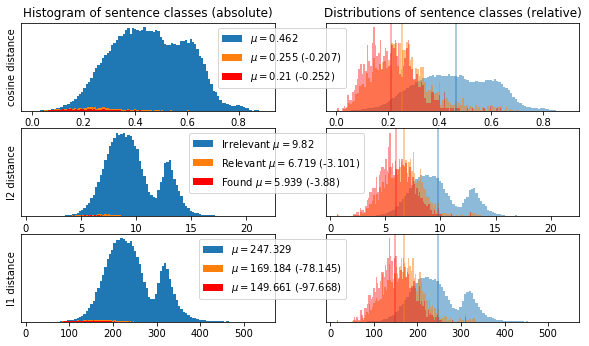

In [708]:
fig = plt.figure()
fig.set_size_inches(10, 5.5)
for k in range(1, len(dist_funcs) + 1):
    fig.add_subplot(len(dist_funcs), 2, (k * 2) - 1)
    res_nel = res_dists[k - 1][np.nonzero(np.asarray(Y) == 0)[0]]
    plt.hist(res_dists[k - 1], bins=100, label=("Irrelevant " if k == 2 else '') + "$\mu = $" + str(round(np.mean(res_nel), 3)))
    res_rel = res_dists[k - 1][np.nonzero(np.asarray(Y) == 1)[0]]
    plt.hist(res_rel, bins=100, label=("Relevant " if k == 2 else '') + "$\mu = $" + str(round(np.mean(res_rel), 3)) + \
             " (" + str(round(np.mean(res_rel) - np.mean(res_nel), 3)) + ")")
    res_rel_found = res_dists[k - 1, :-n_rel_missed][np.nonzero(np.asarray(Y[:-n_rel_missed]) == 1)[0]]
    plt.hist(res_rel_found, bins=100, color='red', label=("Found " if k == 2 else '') + \
             "$\mu = $" + str(round(np.mean(res_rel_found), 3)) + \
             " (" + str(round(np.mean(res_rel_found) - np.mean(res_nel), 3)) + ")")
    if k == 1:
        plt.title("Histogram of sentence classes (absolute)")
    plt.yticks([])
    plt.ylabel(dist_funcs[k - 1][0].__name__)
    plt.legend(loc="upper right", bbox_to_anchor=(1.3 if k != 2 else 1.37, 1.0))
    ax = fig.add_subplot(len(dist_funcs), 2, k * 2)
    _, _, p = plt.hist(res_dists[k - 1], density=True, bins=100, alpha=0.5)
    plt.axvline(x=np.mean(res_nel), color=p[0].get_facecolor())
    res_rel = res_dists[k - 1][np.nonzero(np.asarray(Y) == 1)[0]]
    _, _, p = plt.hist(res_rel, density=True, bins=100, alpha=0.5)
    plt.axvline(x=np.mean(res_rel), color=p[0].get_facecolor())
    _, _, p = plt.hist(res_rel_found, density=True, bins=100, alpha=0.4, color='red')
    plt.axvline(x=np.mean(res_rel_found), color=p[0].get_facecolor())
    if k == 1:
        plt.title("Distributions of sentence classes (relative)")
    plt.yticks([])
    ax.set_zorder(-1)
plt.savefig("graphs/relevance_dists.pdf", format='pdf')
plt.show()

In [ ]:
-0.33458102400039225, -5.399345344291559   0000  :  no truncation, no OOVs (idfs + Qm)  # avg class gap (cos, l1), run#, desc
-0.28619001928751375, -4.326701143373185   0001  :  truncation
-0.28605219995056963, -4.3247937592758525  0002  :  including OOVs + truncation
-0.33456165335580834, -5.3989794715422885  0003  :  including OOVs, no truncation
-0.148858105523899, -2.2402949968138657    0004  :  no query model
-0.21190805914639327, -3.1795841058694583  0005  :  no idf
-0.2862546382052181, -4.1563099773182905   0006  :  no softmax
-0.10288761852999107, -1.004849702060036   0007  :  no idf or query model

In [39]:
claims, claims_vocab = load_claims(n=1000, test_10=False)  # Load training & dev claims
claims_dev, claims_vocab_dev = load_claims(dev=True)
claims += claims_dev
claims_vocab |= claims_vocab_dev
N_claims = len(claims)
load_732 = False
N_claims

1010

In [5]:
claims, claims_vocab = load_claims(n=732, test_10=False)  # Import Lidstone-retrieved claims (optionally, to compare)
N_claims = len(claims)
load_732 = True  # Whether we are comparing with the lidstone results from earlier (before we started filtering for relevance)

In [6]:
all_relsamples, Y, res, res_dists, idx_freqs, arg_min_idx, n_rel_missed = load_ld("rel_dists_025_import")
# _,              Y, res, res_dists, idx_freqs, arg_min_idx               = load_ld("rel_dists_015") # old format import
_,              Y, res, res_dists, idx_freqs, arg_min_idx               = load_ld("rel_dists_005") # old format import

In [290]:
# save_ld((all_relsamples, Y, res, res_dists, idx_freqs, arg_min_idx, n_rel_missed), "rel_dists_0008")  # Load Dirichlet again
all_relsamples, Y, res, res_dists, idx_freqs, arg_min_idx, n_rel_missed = load_ld("rel_dists_0008")
# _,              Y, res, res_dists, idx_freqs, arg_min_idx               = load_ld("rel_dists_0007") # old format import
_,              Y, res, res_dists, idx_freqs, arg_min_idx               = load_ld("rel_dists_0005") # old format import
# _,              Y, res, res_dists, idx_freqs, arg_min_idx               = load_ld("rel_dists_0004") # old format import

In [291]:
len(Y), n_rel_missed, len(Y) - n_rel_missed, max([d[4] for d in all_relsamples])

(70445, 1047, 69398, 1009)

In [292]:
# Filter out invalid sentences (punctuation etc) using a rule that they must contain 3 alphabetical (non-number or punct.) words
rchs = punct + '0123456789'
new_is_ar = [i for i in range(len(all_relsamples)) if len([w for w in all_relsamples[i][1].split(' ') if w[0] not in rchs]) >= \
             min_valid_words]
frac = len(new_is_ar) / len(all_relsamples)
if frac < 1.0:
    print(frac, sum([res_dists[1][i] < 6.0 for i in range(len(all_relsamples)) if i not in new_is_ar]))
    all_relsamples = [all_relsamples[i] for i in new_is_ar]
    Y = [y for _, _, y, _, _, _, _, _ in all_relsamples]
    res = res[:, new_is_ar]
    res_dists = res_dists[:, new_is_ar]
    idx_freqs = [[ix[i] for i in new_is_ar] for ix in idx_freqs]

0.968869330683512 1


In [293]:
X, Y = res, np.asarray(Y).astype(int)  # Assemble final data shape prior to cross validation relevance modelling
use_components = True
X = np.hstack([res_dists.T] + ([X.swapaxes(0, 1).reshape((X.shape[1], X.shape[0] * X.shape[2]))] if use_components else []))
# X = np.hstack([res_dists[1:2].T] + ([X.swapaxes(0, 1).reshape((X.shape[1], X.shape[0] * X.shape[2]))] if use_components else []))
# X = X.swapaxes(0, 1).reshape((X.shape[1], X.shape[0] * X.shape[2]))
ci = np.asarray([d[4] for d in all_relsamples])           # Claim indices for each sentence
ei = np.asarray([d[7] for d in all_relsamples])           # Evidence ids for each sentence
for i in range(len(claims)): claims[i]["claim_i"] = i
if load_732:
    new_ix = np.asarray([i for i in range(len(X) - n_rel_missed) if ci[i] < 732])
    X, Y, ci, ei = X[new_ix], Y[new_ix], ci[new_ix], ei[new_ix]
    n_rel_missed = 0
if n_rel_missed > 0:  # Store missed relevant samples
    X_mr, Y_mr, ci_mr, ei_mr = X[-n_rel_missed:], Y[-n_rel_missed:], ci[-n_rel_missed:], ei[-n_rel_missed:]
    X_, Y_, ci_, ei_ = X[:-n_rel_missed], Y[:-n_rel_missed], ci[:-n_rel_missed], ei[:-n_rel_missed]
else:
    X_mr, Y_mr, ci_mr, ei_mr = [None] * 4
    X_, Y_, ci_, ei_ = X, Y, ci, ei
X_.shape, Y_.shape, ci_.shape, ei_.shape

((67205, 3075), (67205,), (67205,), (67205, 2))

In [223]:
res_dists_, N_df, dfr, cur_t = res_dists[:, :-n_rel_missed], len(dist_funcs), range(N_df), 0  # Evaluate 1D thresholds for task
def macro_f1(_, probs, ci=ci_, ei=ei_, cs=claims, n=5, strict_rel=True, extra_fs=[], verbose=False):
    return eval_rel(probs, ci, ei, cs, n=n, strict_rel=strict_rel, extra_fs=extra_fs, verbose=verbose)#[0]
def macro_recall(*arg, **kwargs): return macro_f1(*args, **kwargs)[1]
def macro_precision(*arg, **kwargs): return macro_f1(*args, **kwargs)[2]
def userdef(Y_, preds):
    global cur_t
    return -abs(cur_t - 5.9032)  # Manually add to the graph the best threshold given by a 1D LR (l1 distance) (see below)
oneD_sfuncs = [accuracy,precision,recall,f1_score,f3_score,f10_score,negative_log_loss,macro_f1,macro_recall,macro_precision]
oneD_scores = [[[] for _ in dfr] for _ in range(len(oneD_sfuncs))]
oneD_thresh_res = []
tcount, count = N_df * len(oneD_sfuncs), 0
for k in dfr:
    min_, max_ = np.min(res_dists_[k]), np.max(res_dists_[k])
    thresh_vals = np.linspace(min_ + 1e-4, max_ - 1e-4, 501)
    for t in thresh_vals:
        cur_t = t
        preds = (res_dists_[k] < t).astype(int).flatten()
        probs = 1.0 - (((res_dists_[k] - t) * 0.5 / max(max(res_dists_[k]) - t, t - min(res_dists_[k]))) + 0.5)
        for j in range(len(oneD_sfuncs) - 2):
            oneD_scores[j][k].append(oneD_sfuncs[j](Y_, preds if oneD_sfuncs[j] is not macro_f1 else probs))
        m_f1, m_r, m_p = oneD_scores[j][k][-1][:3]
        oneD_scores[j][k][-1] = m_f1
        oneD_scores[j + 1][k].append(m_r), oneD_scores[j + 2][k].append(m_p)
    argmaxs = {}
    for j in range(len(oneD_sfuncs)):
        argmax_i = np.argmax(oneD_scores[j][k])
        t = thresh_vals[argmax_i]
        preds = (res_dists_[k] < t).astype(int).flatten()
        probs = 1.0 - (((res_dists_[k] - t) * 0.5 / max(max(res_dists_[k]) - t, t - min(res_dists_[k]))) + 0.5)
        f1m = macro_f1(Y_, probs)[0]
        argmaxs[oneD_sfuncs[j].__name__] = argmax_i, t, oneD_scores[j][k][argmax_i], f1m
        count += 1
        sys_print("\rEvaluations: " + str(count) + '/' + str(tcount) + '     ')
    oneD_thresh_res.append(argmaxs)
tau, tau_dfunc = .42, 0
tau, tau_dfunc = 5.90324953, 1

Evaluations: 30/30     

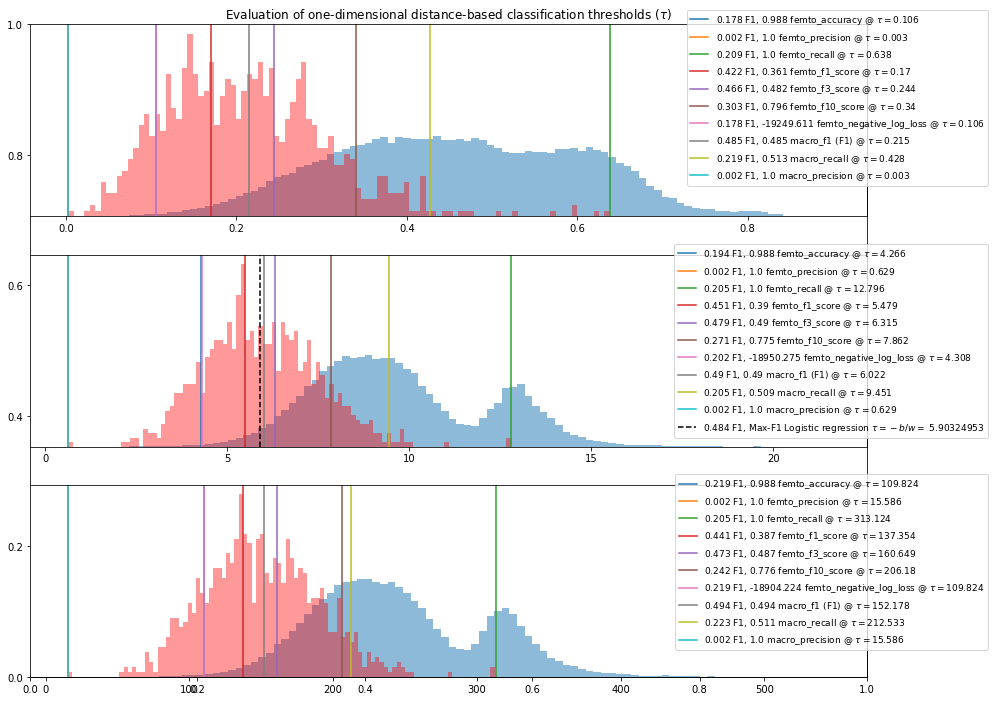

In [224]:
fig = plt.figure()  # Plot evaluation of ideal 1D threshold classifiers
fig.set_size_inches(15, 12)
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.title("Evaluation of one-dimensional distance-based classification thresholds ($\\tau$)")
for k in dfr:
    fig.add_subplot(N_df, 1, k + 1)
    res_nel = res_dists_[k][np.nonzero(Y_ == 0)[0]]
    plt.hist(res_dists_[k], bins=100, density=True, alpha=0.5)
    res_rel_found = res_dists_[k][np.nonzero(Y_ == 1)[0]]
    plt.hist(res_rel_found, bins=100, density=True, alpha=0.4, color="red")
    j = -1
    for j in range(len(oneD_sfuncs)):
        name = oneD_sfuncs[j].__name__
        r = oneD_thresh_res[k][name]
        plt.axvline(x=r[1], label=str(round(r[3], 3)) + ' F1, ' + str(round(r[2], 3)) + \
          (' femto_' if j < 7 else ' ') + name + (' (F1)' if name == "macro_f1" else '') + ' @ $\\tau =$' + str(round(r[1], 3)),
                    color=colours[j])
    if k == tau_dfunc:
        preds = (res_dists_[k] < tau).astype(int).flatten()
        probs = 1.0 - (((res_dists_[k] - tau) * 0.5 / max(max(res_dists_[k]) - tau, tau - min(res_dists_[k]))) + 0.5)
        f1m = macro_f1(Y_, probs)[0]
        plt.axvline(x=tau, ls='--', label=str(round(f1m, 3)) + " F1, Max-F1 Logistic regression $\\tau = -b/w = $ " + str(tau),
                    color="black")
    plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.1 if k == 0 else 1.08), prop={'size': 9})
    plt.yticks([])
plt.show()

In [622]:
# Define method to generate a new logistic regression model for a given data subset (parameters described further below)
def new_model(X, Y, add_relmissed, X_mr, ci_mr, idx, return_steps=False, verbose=False, init_w=None, ret_train_X=False,
              C=None, eta=None, usampl_ratio=None, proximity=-1, pc_train=1.0, feat_pc=1.0, n_pca=5, print_steps=500):
#     m = Pipeline(steps=[("scale", RobustScaler())] + \
    m = Pipeline(steps=[("scale", StandardScaler())] + \
            ([("pca", PCA(n_components=round(n_pca)))] if n_pca != -1 else []) + \
#             [("select", SelectKBest(f_classif, k=2))] + \
            ([("select", SelectKBest(mutual_info_classif, k=round(min(n_pca, feat_pc))))] if feat_pc != -1 else []) + \
#             ([("select", SelectPercentile(mutual_info_classif, feat_pc*100.0))] if feat_pc < 1.0 else []) + \
            ([("model", LR(eta=eta, C=10.0 ** C, regularisation='l2', w_init='uniform' if init_w is None else init_w,
              return_steps=return_steps, print_steps=print_steps, max_iter=50000, no_imp_stop=100, tol=1e-3, verbose=verbose))]\
                if not ret_train_X else []))
    if add_relmissed:
        X_mr = X_mr[[i for i in range(len(X_mr)) if ci_mr[i] in idx]]
        X, Y = np.vstack([X, X_mr]), np.hstack([Y, np.ones(len(X_mr))])
    if proximity != -1:
        if usampl_ratio == -1: usampl_ratio = 1.0
        nel_idx, rel_idx = np.nonzero(Y == 0)[0], np.nonzero(Y == 1)[0]
        X_ = StandardScaler().fit_transform(X)
#         X_ = PCA(n_components=220).fit_transform(StandardScaler().fit_transform(X))
        nel_dists = [l2_distance(np.tile(X_[nel_idx[i]], (len(rel_idx), 1)), X_[rel_idx]) for i in range(len(nel_idx))]
        nel_dists = np.mean(nel_dists, axis=1)
        dist_ord = np.argsort(nel_dists)
        n_maj = round(len(rel_idx) * usampl_ratio)
        min_prox = n_maj / len(nel_idx)
        proximity = min(1.0, min_prox + (proximity * ((len(nel_idx) - n_maj) / len(nel_idx))))
        dist_ord = dist_ord[:max(n_maj, round(len(nel_idx) * proximity))]
        nel_i = dist_ord[::int(len(dist_ord) // n_maj)][:n_maj]
        train_idx = np.hstack([nel_idx[nel_i], rel_idx])
        X, Y = X[train_idx], Y[train_idx]
    if usampl_ratio != -1 and proximity == -1:
        nel_idx, rel_idx = np.nonzero(Y == 0)[0], np.nonzero(Y == 1)[0]
        n_maj = round(len(rel_idx) * usampl_ratio)
        np.random.shuffle(nel_idx)
        train_idx = np.hstack([nel_idx[:int(n_maj)], rel_idx])
        X, Y = X[train_idx], Y[train_idx]
    if pc_train != 1.0:  # If resizing, stratify the samples (so that our learning curve is smooth & representative)
        nel_idx, rel_idx = np.nonzero(Y == 0)[0], np.nonzero(Y == 1)[0]
        np.random.shuffle(nel_idx), np.random.shuffle(rel_idx)
        shuf_idx, rel_ratio, i = [], len(nel_idx) // len(rel_idx), -1
        for i in range(len(rel_idx)):
            shuf_idx += [nel_idx[i * rel_ratio:(i + 1) * rel_ratio], rel_idx[i:i + 1]]
        shuf_idx.append(nel_idx[(i + 1) * rel_ratio:])
        shuf_idx = np.hstack(shuf_idx)
        X, Y = X[shuf_idx], Y[shuf_idx]
        n_train = int(np.ceil(X.shape[0] * pc_train))
        X, Y = X[:n_train], Y[:n_train]
    if ret_train_X:
        for (name, m_) in m.steps:
            if name != "model": X = m_.fit_transform(X, Y)
        return X, Y
    print(), m.fit(X, Y)
    return m, len(X)
# Define model training and validation set performance optimisation pipeline
def evaluate_params(train_idx, ci, ei, X_mr, ci_mr, cls, cv_k, pc_train,
      add_relmissed, proximity_undersampling, X, Y, sr,
                    C=None, eta=None, proximity=None, usampl_ratio=None, feat_pc=None, n_pca=None):
    trtr_inds, val_inds = gen_cv_inds(cv_k, len(train_idx))
    cv_probs, val_iidxs = [], []
    for cv_i in range(cv_k):
        trtr_idx, val_idx = trtr_inds[cv_i], val_inds[cv_i]
        trtr_idx, val_idx  = [train_idx[i] for i in trtr_idx], [train_idx[i] for i in val_idx]
        trtr_iidx, val_iidx = [i for i in range(len(X)) if ci[i] in trtr_idx], [i for i in range(len(X)) if ci[i] in val_idx]
        val_iidxs += val_iidx
        X_trtr_f, Y_trtr_f, ci_trtr_f = X[trtr_iidx], Y[trtr_iidx], ci[trtr_iidx]
        X_val_f, Y_val_f, ci_val_f = X[val_iidx], Y[val_iidx], ci[val_iidx]
        m, n_tr = new_model(X_trtr_f, Y_trtr_f, add_relmissed, X_mr, ci_mr, trtr_idx,
                    C=C, usampl_ratio=usampl_ratio, proximity=proximity, pc_train=pc_train, feat_pc=feat_pc, n_pca=n_pca)
        cv_probs.append(m.predict_proba(X_val_f)[:, 1])
    cv_probs = np.hstack(cv_probs)
    scores = eval_rel(cv_probs, ci[val_iidxs], ei[val_iidxs], cls, strict_rel=sr, verbose=False)
    return tuple(list(scores) + [None if X.shape[1] > 1 else \
                                 m.steps[0][1].inverse_transform([-m.steps[-1][1].intercept_ / m.steps[-1][1].coef_])[0,0,0]])
# Define main function to evaluate and/or optimise relevance classification
def relevance_evaluation(
      optimise_C=True,            # Whether to include individual hyperparameters in the optimisation
      optimise_eta=False,
      optimise_feat_pc=True,
      optimise_n_pca=True,
      balance_classes=True,       # In order of dependence; proximity undersampling requires class balancing to be enabled
      optimise_ratio=True,
      proximity_undersampling=False,  # Select majority class samples closer to minority class
      optimise_proximity=False,
      C=0.32191516454484104,      # Exponent of C (inverse regularisation strength)
      eta=4e-6,                   # Learning rate
      feat_pc=2,                  # Number of features to select
      n_pca=4,                    # Number of PCA output dimensions
      usampl_ratio = 7.5,         # Ratio of majority class to minority class in binary class balancing
      proximity=0.05,             # Proximity of selected majority class samples to minority class (0 = closest, 1 = all data)
      n_pca_range=np.linspace(1.501, 7.499, 5),      # Ranges of hyperparameters
      usampl_ratio_range=np.linspace(7, 9, 5),
      C_range=np.linspace(0, 2, 9),
      eta_range=np.asarray([-4, 0]),
      proximity_range=np.linspace(0, 1, 11),
      feat_pc_range=np.linspace(0.501, 4.499, 11),
      n_reps=5,                   # Number of times to run the outer cross validation
      cv_k=5,                     # Number of outer folds to test optimised model
      cv_k_internal=5,            # Number of internal folds to optimise hyperparameters for validation accuracy
      n_guess=64,                 # Number of uniformly random guesses at hyperparameters
      pc_train=0.5,               # Train with only a subset of the training data (for generating learning curve)
      add_relmissed=False,        # Whether to add the relevance samples missed by the retrieval to the training subset
      strict_rel=True,            # Whether to exclude negatively-classified sentences when less than 5 positive are found
      scoring_fn=0,               # Which score to maximise (0 = macro (Fever) F1)
      n_jobs=n_cpu,               # Multiprocessing number of parllel hyperparameter set evaluations
      return_ntrs=False,          # Also return numbers of datapoints used to train outer cross validation models
      pause=True,                 # Whether to pause after each outer cross validation fold
        ):
    use_ = {"C": True, "eta": True, "feat_pc": feat_pc != None,"n_pca": n_pca != None, "proximity": proximity_undersampling, \
            "usampl_ratio": balance_classes}
    hypopts = {"C": optimise_C, "eta": optimise_eta, "proximity": proximity_undersampling and optimise_proximity,
               "usampl_ratio": balance_classes and optimise_ratio, "feat_pc": optimise_feat_pc, "n_pca": optimise_n_pca}
    hypopts_rs = {"C": C_range, "eta": eta_range, "proximity": proximity_range, "usampl_ratio": usampl_ratio_range,
                 "feat_pc": feat_pc_range, "n_pca": n_pca_range}
    n_hyperparams = sum(hypopts.values())
    r_hyp = range(n_hyperparams)
    hyp_ps = [key for key in hypopts if hypopts[key]]
    stop, scores, top_pars, all_pars, all_probs, n_trs = False, [], [], [], [], []
    for run_i in range(n_reps):
        train_inds, test_inds = gen_cv_inds(cv_k, len(claims))  # Create testing cross validation indices to split claims set
        cv_probs, test_iidxs, top_par, all_par = [], [], [], []
        for cv_i in range(cv_k):
            gc.collect()
            sys_print("Run " + str(run_i + 1) + " Fold " + str(cv_i + 1) + '/' + str(cv_k) + '     ')
            train_idx, test_idx = train_inds[cv_i], test_inds[cv_i]
            train_iidx, test_iidx = [i for i in range(len(X_)) if ci_[i] in train_idx], \
                                    [i for i in range(len(X_)) if ci_[i] in test_idx]
            test_iidxs += test_iidx
            trtr_idx, trtr_iidx = train_idx, train_iidx
            X_train_f, Y_train_f, ci_train_f = X_[train_iidx], Y_[train_iidx], ci_[train_iidx]
            X_test_f, Y_test_f, ci_test_f = X_[test_iidx], Y_[test_iidx], ci_[test_iidx]
            ps = {"C": C, "eta": eta, "proximity": proximity, "usampl_ratio": usampl_ratio, "feat_pc": feat_pc, "n_pca": n_pca}
            for key in ps:
                if not use_[key]: ps[key] = -1
            if n_hyperparams > 0:
                args = train_idx, ci_, ei_, X_mr, ci_mr, claims, cv_k_internal, pc_train, \
                    add_relmissed, proximity_undersampling, X_, Y_, strict_rel
    #             pars=[dict([(hyp_ps[i],r[i]) for i in r_hyp]) for r in itertools.product(*[hypopts_rs[key] for key in hyp_ps])]
                pars = [dict([(hyp_ps[i], np.random.uniform(min(hypopts_rs[hyp_ps[i]]), \
                                                         max(hypopts_rs[hyp_ps[i]]))) for i in r_hyp]) for _ in range(n_guess)]
                opt_res = joblib.Parallel(n_jobs=n_jobs, verbose=2)(delayed(evaluate_params)(*args, **{**ps, **p}) for p in pars)
                opt_r = [r[0] for r in opt_res]
                max_i = np.argmax(opt_r)
                top_ps, opt_max = pars[max_i], opt_res[max_i]
                sys_print(str((opt_max[0], opt_max[1], opt_max[2], opt_max[-1], top_ps)) + '\n')
                ps = {**ps, **top_ps}
                top_par.append((opt_max, deepcopy(ps)))
                all_par.append(list(zip(pars, deepcopy(opt_res))))
                n_trtr = int(np.floor(len(train_idx) * (1.0 - (1.0 / cv_k_internal))))
                trtr_idx = [train_idx[i] for i in np.random.choice(range(len(train_idx)), n_trtr, replace=False)]
                trtr_iidx = [i for i in range(len(X_)) if ci_[i] in trtr_idx]
            X_trtr_f, Y_trtr_f, ci_trtr_f = X_[trtr_iidx], Y_[trtr_iidx], ci_[trtr_iidx]
            m, n_tr = new_model(X_trtr_f, Y_trtr_f, add_relmissed, X_mr, ci_mr, trtr_idx, pc_train=pc_train, **ps)
            n_trs.append(n_tr)
            probs_test = m.predict_proba(X_test_f)[:, 1]
            cv_probs.append(probs_test)
            if pause:
                uimp = input("Press Enter to continue, 's' to stop, 'f' to automate: ")
                if uimp == "s":
                    stop = True
                    break
                if uimp == 'f': pause = False
        top_pars.append(top_par)
        all_pars.append(all_par)
        if stop: break
        cv_probs = np.hstack(cv_probs)
        scores.append(eval_rel(cv_probs, ci_[test_iidxs], ei_[test_iidxs], claims, strict_rel=strict_rel, verbose=False))
        print('\n', scores[-1])
        all_probs.append(cv_probs[np.argsort(test_iidxs)])
    print(np.mean([s[0] for s in scores]))
    pr(top_pars)
    if return_ntrs: return scores, top_pars, all_pars, all_probs, n_trs
    return scores, top_pars, all_pars, all_probs

In [235]:
scores, top_pars, all_pars = relevance_evaluation()  # Get best n-D (3075-D) LR hyperparameters (x4) for validation accuracy

Run 1 Fold 1/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.1min finished


(0.5107169213344093, 0.4084158415841584, 0.6813943894389438, None, {'C': 0.46373015009998997, 'usampl_ratio': 7.126172840844593, 'feat_pc': 3.8826237085486643, 'n_pca': 5.435100709842681})
Press Enter to continue, 's' to stop, 'f' to automate: f
Run 1 Fold 2/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.3min finished


(0.5097891524157498, 0.4034653465346535, 0.6922029702970296, None, {'C': 1.3978851114598585, 'usampl_ratio': 7.6128914218780555, 'feat_pc': 1.9990911170105532, 'n_pca': 6.344356368241323})
Run 1 Fold 3/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.4min finished


(0.5123402948380247, 0.4034653465346535, 0.7016914191419142, None, {'C': 0.519290047317994, 'usampl_ratio': 7.690376172519182, 'feat_pc': 2.36467135926082, 'n_pca': 2.7491152792587346})
Run 1 Fold 4/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.3min finished


(0.5159011974495878, 0.40717821782178215, 0.7038366336633664, None, {'C': 1.7750672074696596, 'usampl_ratio': 8.312498922444771, 'feat_pc': 2.906094143845453, 'n_pca': 4.13884243023679})
Run 1 Fold 5/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.3min finished


(0.4955797928467828, 0.40470297029702973, 0.639088283828383, None, {'C': 1.5844343896294792, 'usampl_ratio': 7.133985094621078, 'feat_pc': 3.9728152203298253, 'n_pca': 4.5558165841617})
Run 2 Fold 1/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.2min finished


(0.5109182432116142, 0.40594059405940597, 0.6891295379537953, None, {'C': 0.04959462854557106, 'usampl_ratio': 8.595563473496275, 'feat_pc': 2.951057466190423, 'n_pca': 5.250055002388515})
Run 2 Fold 2/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.3min finished


(0.5119190911827353, 0.4121287128712871, 0.6754744224422442, None, {'C': 0.0570019858086499, 'usampl_ratio': 7.265296937832504, 'feat_pc': 2.601987385561038, 'n_pca': 5.2527925013457715})
Run 2 Fold 3/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.2min finished


(0.5088046514627466, 0.4084158415841584, 0.6746287128712871, None, {'C': 0.25337728005489346, 'usampl_ratio': 7.0277680520838715, 'feat_pc': 1.641063635752447, 'n_pca': 3.9348526712810035})
Run 2 Fold 4/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.3min finished


(0.5073221128289653, 0.40717821782178215, 0.672792904290429, None, {'C': 1.2130204899088108, 'usampl_ratio': 7.204416571922567, 'feat_pc': 4.326500358871965, 'n_pca': 4.127420899589613})
Run 2 Fold 5/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.3min finished


(0.49665453697404, 0.3972772277227723, 0.6623349834983497, None, {'C': 0.659467784961099, 'usampl_ratio': 7.1429450444796245, 'feat_pc': 3.759022027907739, 'n_pca': 3.6547904900441135})
Run 3 Fold 1/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.2min finished


(0.5072292361197542, 0.4121287128712871, 0.6593853135313531, None, {'C': 1.600832748365166, 'usampl_ratio': 7.331293310492744, 'feat_pc': 1.8637291850842232, 'n_pca': 7.40560402307025})
Run 3 Fold 2/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.3min finished


(0.5134924495867146, 0.40594059405940597, 0.6985767326732674, None, {'C': 1.0815035048350912, 'usampl_ratio': 7.865398985050268, 'feat_pc': 3.4029789253634832, 'n_pca': 7.2902651789897295})
Run 3 Fold 3/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.3min finished


(0.5060793434241162, 0.4034653465346535, 0.6786922442244224, None, {'C': 0.885159607817465, 'usampl_ratio': 7.845878872939815, 'feat_pc': 1.8947734410399697, 'n_pca': 4.253485441699182})
Run 3 Fold 4/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.2min finished


(0.5024808635145989, 0.39232673267326734, 0.6986386138613861, None, {'C': 1.369394232542635, 'usampl_ratio': 8.037547033764918, 'feat_pc': 3.3325009597277173, 'n_pca': 5.6730990103710734})
Run 3 Fold 5/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.3min finished


(0.5104220898949305, 0.40965346534653463, 0.6769389438943895, None, {'C': 1.7642744282055098, 'usampl_ratio': 7.645027685075502, 'feat_pc': 2.9461651751461777, 'n_pca': 7.164014870541623})
Run 4 Fold 1/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.2min finished


(0.5053803920064397, 0.3948019801980198, 0.7020008250825083, None, {'C': 1.7393140432697143, 'usampl_ratio': 7.425207916989703, 'feat_pc': 2.8079677358323543, 'n_pca': 1.6147309088222168})
Run 4 Fold 2/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.4min finished


(0.5146492178721759, 0.40717821782178215, 0.6991955445544553, None, {'C': 1.7987504719131013, 'usampl_ratio': 8.409229367425429, 'feat_pc': 1.8688350904010789, 'n_pca': 7.12341548660072})
Run 4 Fold 3/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.2min finished


(0.5049915960720303, 0.4034653465346535, 0.6747937293729374, None, {'C': 0.6143655968838133, 'usampl_ratio': 7.415711981753736, 'feat_pc': 3.240189900631631, 'n_pca': 2.9326192694688507})
Run 4 Fold 4/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.2min finished


(0.5078808469205819, 0.4084158415841584, 0.6713902640264027, None, {'C': 0.8918512091928466, 'usampl_ratio': 7.34671314078244, 'feat_pc': 3.768540436763859, 'n_pca': 6.099791064032676})
Run 4 Fold 5/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.3min finished


(0.5055096815517595, 0.400990099009901, 0.6837252475247524, None, {'C': 1.8271693631574624, 'usampl_ratio': 8.104439741434122, 'feat_pc': 1.8486403530067692, 'n_pca': 7.103322971210426})
Run 5 Fold 1/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.6min finished


(0.5099269177743232, 0.4084158415841584, 0.6785891089108911, None, {'C': 1.850175798777148, 'usampl_ratio': 7.3415237345052, 'feat_pc': 3.5179891007632484, 'n_pca': 3.4133447332937803})
Run 5 Fold 2/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.6min finished


(0.5036703722401377, 0.3948019801980198, 0.6954414191419142, None, {'C': 0.9802571676186558, 'usampl_ratio': 8.283439520543833, 'feat_pc': 2.396430262769319, 'n_pca': 2.979429910675999})
Run 5 Fold 3/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.9min finished


(0.5050817707011641, 0.40222772277227725, 0.6786097359735973, None, {'C': 1.8161243163148455, 'usampl_ratio': 7.633622361248955, 'feat_pc': 4.098690221122277, 'n_pca': 2.6154522628399794})
Run 5 Fold 4/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.6min finished


(0.5037169212590171, 0.40470297029702973, 0.6668729372937293, None, {'C': 1.8643003997521705, 'usampl_ratio': 7.401414706509036, 'feat_pc': 2.3410866582852194, 'n_pca': 4.410205102565534})
Run 5 Fold 5/5     

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done  64 out of  64 | elapsed:  5.4min finished


(0.5114913394375232, 0.4084158415841584, 0.6841584158415841, None, {'C': 0.7506888526799738, 'usampl_ratio': 7.771899258632265, 'feat_pc': 3.606242340246174, 'n_pca': 6.052783962836319})
0.5014398499003668
[   [   (   (   0.5107169213344093,
                0.4084158415841584,
                0.6813943894389438,
                0.32214570861987274,
                0.3935121465443248,
                0.27269109297411176,
                0.20411331655950052,
                0.2772512088301562,
                0.16150805940214424,
                0.20787867579064173,
                0.2580348943985308,
                0.1740476927841437,
                None),
            {   'C': 0.46373015009998997,
                'eta': -1,
                'feat_pc': 3.8826237085486643,
                'n_pca': 5.435100709842681,
                'proximity': -1,
                'usampl_ratio': 7.126172840844593}),
        (   (   0.5097891524157498,
                0.4034653465346535,
                

                0.21417780132242434,
                0.2748860517237038,
                0.1754335213666972,
                0.21233140655105973,
                0.24741805118994162,
                0.18596017549780627,
                None),
            {   'C': 1.0815035048350912,
                'eta': -1,
                'feat_pc': 3.4029789253634832,
                'n_pca': 7.2902651789897295,
                'proximity': -1,
                'usampl_ratio': 7.865398985050268}),
        (   (   0.5060793434241162,
                0.4034653465346535,
                0.6786922442244224,
                0.32166784022612244,
                0.38934547987765816,
                0.27403410081981505,
                0.19619010175330207,
                0.2570888839822379,
                0.15861714043532224,
                0.1973853802246364,
                0.23457330415754923,
                0.17037507946598857,
                None),
            {   'C': 0.885159607817465,
         

In [286]:
# save_ld((top_pars, np.mean([s[0] for s in scores])), "best_hyperparams_5fcv_topPars_testAcc_overfittingQuantification")
top_pars, test_acc = load_ld("best_hyperparams_5fcv_topPars_testAcc_overfittingQuantification")
val_acc = np.mean(sum([[a_[0][0] for a_ in b] for b in top_pars], []))
val_acc, test_acc, "Our internal cross validation best hyperparameters overfit by", val_acc - test_acc

(0.5074450590247827,
 0.5014398499003668,
 'Our internal cross validation best hyperparameters overfit by',
 0.006005209124415822)

In [ ]:
# (Final hyperparameters, used in the next section, were chosen reasonably from the modal points in the above optimisation)

In [263]:
scores, top_pars, all_pars, all_probs = relevance_evaluation(optimise_C=False,  # Test best 1-D LR (uses only l1 distance as x)
      optimise_eta=False, optimise_feat_pc=False, optimise_n_pca=False, optimise_ratio=False, optimise_proximity=False,
      feat_pc=None, n_pca=None, C=0.32191516454484104, usampl_ratio=7.5, n_reps=10, cv_k=10)

Run 1 Fold 1/10     Press Enter to continue, 's' to stop, 'f' to automate: f
Run 1 Fold 2/10     Run 1 Fold 3/10     Run 1 Fold 4/10     Run 1 Fold 5/10     Run 1 Fold 6/10     Run 1 Fold 7/10     Run 1 Fold 8/10     Run 1 Fold 9/10     Run 1 Fold 10/10     
 (0.48528201971570784, 0.3792079207920792, 0.6737458745874587, 0.3108773299529602, 0.36628121053863627, 0.2700321333168048, 0.21015323776569453, 0.26066217044757817, 0.17604140786749486, 0.21270405689348632, 0.24040920716112532, 0.1907246376811594)
Run 2 Fold 1/10     Run 2 Fold 2/10     Run 2 Fold 3/10     Run 2 Fold 4/10     Run 2 Fold 5/10     Run 2 Fold 6/10     Run 2 Fold 7/10     Run 2 Fold 8/10     Run 2 Fold 9/10     Run 2 Fold 10/10     
 (0.48434585836272115, 0.3801980198019802, 0.6670792079207921, 0.3094910642599106, 0.36786536895447786, 0.26710569564631387, 0.20917264865129728, 0.26173513182096875, 0.17419104745582897, 0.21160628406540563, 0.2411399342345634, 0.18851756640959727)
Run 3 Fold 1/10     Run 3 Fold 2/10     

In [344]:
# save_ld((scores, top_pars, all_pars, all_probs), "best_1feat_10fcv")
scores, top_pars, all_pars, all_probs = load_ld("best_1feat_10fcv")

In [331]:
scores, top_pars, all_pars, all_probs = relevance_evaluation(optimise_C=False,  # Test best n-D LR (3075-D; all features)
      optimise_eta=False, optimise_feat_pc=False, optimise_n_pca=False, optimise_ratio=False, optimise_proximity=False,
      C=1.127, feat_pc=2, n_pca=4, usampl_ratio=7.5, n_reps=10, cv_k=10)

Run 1 Fold 1/10     
Press Enter to continue, 's' to stop, 'f' to automate: f
Run 1 Fold 2/10     
Run 1 Fold 3/10     
Run 1 Fold 4/10     
Run 1 Fold 5/10     
Run 1 Fold 6/10     
Run 1 Fold 7/10     
Run 1 Fold 8/10     
Run 1 Fold 9/10     
Run 1 Fold 10/10     

 (0.50045596805074, 0.39702970297029705, 0.6767491749174918, 0.3184371931617953, 0.3863809705146339, 0.27081525344884116, 0.21349580208934182, 0.2723216840384222, 0.17556987377131264, 0.2141395055896709, 0.2484472049689441, 0.18815716657443277)
Run 2 Fold 1/10     
Run 2 Fold 2/10     
Run 2 Fold 3/10     
Run 2 Fold 4/10     
Run 2 Fold 5/10     
Run 2 Fold 6/10     
Run 2 Fold 7/10     
Run 2 Fold 8/10     
Run 2 Fold 9/10     
Run 2 Fold 10/10     

 (0.5040195098173528, 0.400990099009901, 0.6783003300330033, 0.319097923498251, 0.3859189243100134, 0.2720014749149432, 0.21818196610610757, 0.2740384222358471, 0.18124028493032185, 0.21821086261980832, 0.2495432955791012, 0.19386886176554075)
Run 3 Fold 1/10     
Run 3 Fol

In [631]:
# save_ld((scores, top_pars, all_pars, all_probs), "best_multifeat_10fcv")
scores, top_pars, all_pars, all_probs = load_ld("best_multifeat_10fcv")

In [624]:
scores, top_pars, all_pars, all_probs = relevance_evaluation(optimise_C=False,  # Test best n-D LR (3075-D; all features)
      optimise_eta=False, optimise_feat_pc=False, optimise_n_pca=False, optimise_ratio=False, optimise_proximity=False,
      C=1.127, feat_pc=2, n_pca=4, usampl_ratio=7.5, n_reps=10, cv_k=10, pc_train=0.5)

Run 1 Fold 1/10     
Press Enter to continue, 's' to stop, 'f' to automate: f
Run 1 Fold 2/10     
Run 1 Fold 3/10     
Run 1 Fold 4/10     
Run 1 Fold 5/10     
Run 1 Fold 6/10     
Run 1 Fold 7/10     
Run 1 Fold 8/10     
Run 1 Fold 9/10     
Run 1 Fold 10/10     

 (0.5024309693088358, 0.4069306930693069, 0.6565016501650166, 0.3134132555982949, 0.3940938956533016, 0.26015348667309446, 0.20744814629638045, 0.2798324136521561, 0.16481534980018298, 0.2085761243089795, 0.25502374862988675, 0.17644084934277046)
Run 2 Fold 1/10     
Run 2 Fold 2/10     
Run 2 Fold 3/10     
Run 2 Fold 4/10     
Run 2 Fold 5/10     
Run 2 Fold 6/10     
Run 2 Fold 7/10     
Run 2 Fold 8/10     
Run 2 Fold 9/10     
Run 2 Fold 10/10     

 (0.5022298078275347, 0.403960396039604, 0.6636798679867986, 0.3156854172796779, 0.3921062930468871, 0.26419436689616804, 0.21243922936154508, 0.27639893725730635, 0.17251795440919473, 0.2132921174652241, 0.25210084033613445, 0.18483793195821055)
Run 3 Fold 1/10     
Run 

In [630]:
# save_ld((scores, top_pars, all_pars, all_probs), "best_multifeat_10fcv_half")
scores, top_pars, all_pars, all_probs = load_ld("best_multifeat_10fcv_half")

In [335]:
0.5038385269485952, 0.48499161975262267, "Multiple features increase F1 score by", 0.5038385269485952 - 0.48499161975262267

(0.5038385269485952,
 0.48499161975262267,
 'Multiple features increase F1 score by',
 0.01884690719597254)

In [582]:
# Compute the n-D (best) LR performance metrics over the 10 development set claims (the first 10 verifiable) for question 4/5
scores_10dev = [eval_rel(pr, ci_, ei_, claims[-10:], print_preds=True) for pr in all_probs] # Analyse the evidence predictions
'macro f1, recall, precision:', [np.mean([s[i] for s in scores_10dev]) for i in range(3)]

(   'Fox 2000 Pictures released the film Soul Food.',
    [('Soul_Food_-LRB-film-RRB-', 0, True)])
(   'Telemundo is a English-language television network.',
    [('List_of_Telemundo_affiliates_-LRB-table-RRB-', 0, False)])
("Damon Albarn's debut album was released in 2011.", [('Gorillaz', 12, False)])
('There is a capital called Mogadishu.', [])
('Savages was exclusively a German film.', [])
('Andrew Kevin Walker is only Chinese.', [])
(   'The Cretaceous ended.',
    [('Mesozoic', 10, False), ('Ischioceratops', 2, False)])
("Murda Beatz's real name is Marshall Mathers.", [])
('Nicholas Brody is a character on Homeland.', [('Nicholas_Brody', 1, True)])
('Charles Manson has been proven innocent of all crimes.', [])
(   'Fox 2000 Pictures released the film Soul Food.',
    [('Soul_Food_-LRB-film-RRB-', 0, True)])
(   'Telemundo is a English-language television network.',
    [('List_of_Telemundo_affiliates_-LRB-table-RRB-', 0, False)])
(   "Damon Albarn's debut album was released in 201

('macro f1, recall, precision:', [0.31111111111111106, 0.2, 0.7])

In [611]:
# Plot the learning curve
rez = []
for pc in [0.04, 0.08, 0.16, 0.24, 0.32, 0.4, 0.5, 0.65, 0.8]:
    rez.append(relevance_evaluation(optimise_C=False,  # Test best n-D LR (3075-D; all features)
      optimise_eta=False, optimise_feat_pc=False, optimise_n_pca=False, optimise_ratio=False, optimise_proximity=False,
      C=1.127, feat_pc=2, n_pca=4, usampl_ratio=7.5, n_reps=10, cv_k=10, pc_train=pc, return_ntrs=True, pause=False))

Run 1 Fold 1/10     
Run 1 Fold 2/10     
Run 1 Fold 3/10     
Run 1 Fold 4/10     
Run 1 Fold 5/10     
Run 1 Fold 6/10     
Run 1 Fold 7/10     
Run 1 Fold 8/10     
Run 1 Fold 9/10     
Run 1 Fold 10/10     

 (0.49238275269398835, 0.3821782178217822, 0.6918976897689768, 0.3175394285963047, 0.37035786820440286, 0.2779059783703172, 0.2108300760727945, 0.2562987941957899, 0.17906332548011705, 0.21014492753623187, 0.23310193642674462, 0.19130434782608696)
Run 2 Fold 1/10     
Run 2 Fold 2/10     
Run 2 Fold 3/10     
Run 2 Fold 4/10     
Run 2 Fold 5/10     
Run 2 Fold 6/10     
Run 2 Fold 7/10     
Run 2 Fold 8/10     
Run 2 Fold 9/10     
Run 2 Fold 10/10     

 (0.4991128969980518, 0.39504950495049507, 0.6776072607260727, 0.3173893010644446, 0.38306688910649306, 0.2709366652643963, 0.2115871407664721, 0.26888820764357246, 0.17441801887792982, 0.21330383946911044, 0.24662038728534894, 0.1879175946547884)
Run 3 Fold 1/10     
Run 3 Fold 2/10     
Run 3 Fold 3/10     
Run 3 Fold 4/10  

Run 6 Fold 2/10     
Run 6 Fold 3/10     
Run 6 Fold 4/10     
Run 6 Fold 5/10     
Run 6 Fold 6/10     
Run 6 Fold 7/10     
Run 6 Fold 8/10     
Run 6 Fold 9/10     
Run 6 Fold 10/10     

 (0.5021686241111551, 0.401980198019802, 0.6688778877887788, 0.3158857213497631, 0.3892275051680992, 0.26580106843798523, 0.2124555468817764, 0.2753259758839158, 0.17296023828781987, 0.21222463543282657, 0.24990865911582025, 0.18441628471286062)
Run 7 Fold 1/10     
Run 7 Fold 2/10     
Run 7 Fold 3/10     
Run 7 Fold 4/10     
Run 7 Fold 5/10     
Run 7 Fold 6/10     
Run 7 Fold 7/10     
Run 7 Fold 8/10     
Run 7 Fold 9/10     
Run 7 Fold 10/10     

 (0.503777832568776, 0.402970297029703, 0.6718481848184817, 0.3174959918877193, 0.3875965920767901, 0.26886851510821286, 0.21171866905758122, 0.27146331493970977, 0.17352799007119998, 0.21184581635850827, 0.24698575082206795, 0.18545953360768175)
Run 8 Fold 1/10     
Run 8 Fold 2/10     
Run 8 Fold 3/10     
Run 8 Fold 4/10     
Run 8 Fold 5/10     

Run 1 Fold 2/10     
Run 1 Fold 3/10     
Run 1 Fold 4/10     
Run 1 Fold 5/10     
Run 1 Fold 6/10     
Run 1 Fold 7/10     
Run 1 Fold 8/10     
Run 1 Fold 9/10     
Run 1 Fold 10/10     

 (0.5012169233618369, 0.401980198019802, 0.6655115511551156, 0.31243985502358707, 0.3879203744550279, 0.2615484500664741, 0.21200971177944863, 0.2766135295319845, 0.17186920634920638, 0.2127331586249422, 0.25210084033613445, 0.184)
Run 2 Fold 1/10     
Run 2 Fold 2/10     
Run 2 Fold 3/10     
Run 2 Fold 4/10     
Run 2 Fold 5/10     
Run 2 Fold 6/10     
Run 2 Fold 7/10     
Run 2 Fold 8/10     
Run 2 Fold 9/10     
Run 2 Fold 10/10     

 (0.5026097383691086, 0.400990099009901, 0.6732178217821783, 0.3143504524437751, 0.38686892315605187, 0.2647273796664041, 0.2094749209503308, 0.27146331493970977, 0.17053370822580854, 0.21005274588892334, 0.24735111435878698, 0.18252898355351846)
Run 3 Fold 1/10     
Run 3 Fold 2/10     
Run 3 Fold 3/10     
Run 3 Fold 4/10     
Run 3 Fold 5/10     
Run 3 Fold 6/

In [612]:
# save_ld(rez, "learning_curve_results")
rez = load_ld("learning_curve_results")

In [650]:
xyz = np.asarray([list(a) for a in zip([r[-1][0] / 7.5 for r in rez], [np.mean([r_[0] for r_ in r[0]]) for r in rez],
                                        [np.std([r_[0] for r_ in r[0]]) for r in rez])])
xyz

array([[3.66666667e+01, 4.96308894e-01, 4.68308998e-03],
       [7.33333333e+01, 4.98609802e-01, 1.70523758e-03],
       [1.45466667e+02, 5.01193337e-01, 1.87086358e-03],
       [2.16800000e+02, 5.00843378e-01, 4.10286159e-03],
       [2.89066667e+02, 5.00535111e-01, 1.93623219e-03],
       [3.64000000e+02, 5.02102173e-01, 2.78637775e-03],
       [4.59600000e+02, 5.03253064e-01, 1.90125463e-03],
       [5.81333333e+02, 5.02867743e-01, 1.32019031e-03],
       [7.32666667e+02, 5.02065379e-01, 2.94215992e-03]])

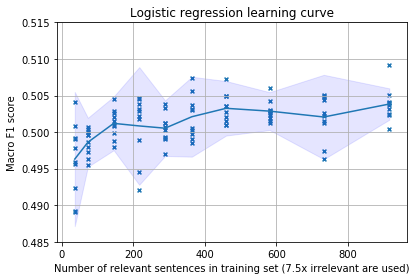

In [677]:
x = xyz[:, 0]
y = xyz[:, 1]
ci = 1.96 * xyz[:, 2]
x = np.hstack([x, [((1/0.8) * x[-1])]])
scores__, _, _, _ = load_ld("best_multifeat_10fcv")  # append scores for full dataset
y = np.hstack([y, [np.mean([s[0] for s in scores__])]])
ci = np.hstack([ci, [np.std([s[0] for s in scores__])]])
fig = plt.figure()
fig.set_size_inches(6, 4)
plt.plot(x, y)
plt.scatter(np.repeat(x, 10),# + (np.random.random(size=len(x) * 10) * 20),
            np.hstack([[r_[0] for r_ in r[0]] for r in rez] + [s[0] for s in scores__]), marker='x', s=15)
plt.fill_between(x, (y - ci), (y + ci), color='b', alpha=.1)
plt.grid(which='both')
plt.ylim(0.485, 0.515)
plt.ylabel("Macro F1 score")
plt.xlabel("Number of relevant sentences in training set (7.5x irrelevant are used)")
plt.title("Logistic regression learning curve")
plt.savefig("graphs/learning_curve.pdf", format='pdf')
plt.tight_layout()
plt.show()

In [478]:
# Analyse the effect of changing the learning rate on model training loss
trX, trY = new_model(X_, Y_, False, X_mr, ci_mr,list(range(len(claims))),ret_train_X=True, feat_pc=2, n_pca=4, usampl_ratio=7.5)
init_w = init_weights('uniform', 1e-2, 3, a=-2.0, b=-2.0)

In [546]:
m = LR(w_init=init_w, eta=1e-5, C=1.127, return_steps=True, print_steps=1, no_imp_stop=50)
m.fit(trX, trY)
us_steps = m.steps
len(us_steps)

|  iteration  |   loss   |  accuracy   |   precision   |   recall   |   f1_score   |   f2_score   |
|  0  |  4930.744275794814  |  0.5840486  |  0.2167043  |  0.969697  |  0.3542435  |  0.5721097  |
|  1  |  5391.794864611623  |  0.5649016  |  0.2118888  |  0.9921437  |  0.3492001  |  0.5713547  |
|  2  |  6548.2784844454945  |  0.4950482  |  0.0016989  |  0.0056117  |  0.0026082  |  0.003842  |
|  3  |  10638.428429746642  |  0.563185  |  0.2110925  |  0.9910213  |  0.3480489  |  0.569898  |
|  4  |  4572.285616294254  |  0.6119107  |  0.2305263  |  0.983165  |  0.3734811  |  0.5947854  |
|  5  |  4844.9307397656185  |  0.7549188  |  0.002064  |  0.0022447  |  0.0021505  |  0.002206  |
|  6  |  6537.8773519651895  |  0.5779744  |  0.2166216  |  0.9887767  |  0.3553852  |  0.5772507  |
|  7  |  5779.673097295364  |  0.5785026  |  0.0017324  |  0.0044893  |  0.0025  |  0.0034054  |
|  8  |  9528.564064675562  |  0.5730886  |  0.2146686  |  0.9887767  |  0.3527528  |  0.5744653  |
|  9  

C:\Users\alfew\Code\IR\facts\Retrieval.py:30: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(np.logical_and(y, y_hat)) / np.sum(y_hat)


|  23  |  3699.994571978044  |  0.8823452  |  nan  |  0.0  |  nan  |  nan  |
|  24  |  4605.181109613906  |  0.6568071  |  0.2523202  |  0.976431  |  0.4010141  |  0.6203651  |
|  25  |  4749.799987813215  |  0.7249439  |  0.0016722  |  0.0022447  |  0.0019166  |  0.0021008  |
|  26  |  7831.222556517733  |  0.6101941  |  0.230165  |  0.986532  |  0.3732484  |  0.5952865  |
|  27  |  3284.6953448595605  |  0.9226198  |  0.6908636  |  0.6195286  |  0.6532544  |  0.6325923  |
|  28  |  3317.3575661148657  |  0.8087944  |  0.3717181  |  0.9057239  |  0.5271065  |  0.7035745  |
|  29  |  3495.0720549894763  |  0.8823452  |  nan  |  0.0  |  nan  |  nan  |
|  30  |  4363.124987534293  |  0.6764822  |  0.2632858  |  0.973064  |  0.4144359  |  0.6322007  |
|  31  |  4355.902954325297  |  0.7483164  |  0.0019627  |  0.0022447  |  0.0020942  |  0.002182  |
|  32  |  6977.522347094892  |  0.626436  |  0.2371134  |  0.9809203  |  0.3819095  |  0.6027586  |
|  33  |  3171.1633110414646  |  0.889211

|  192  |  1788.6631458950428  |  0.9263172  |  0.8195777  |  0.4792368  |  0.6048159  |  0.5226438  |
|  193  |  1786.8125746003627  |  0.9261851  |  0.8192308  |  0.4781145  |  0.6038271  |  0.5215475  |
|  194  |  1784.977556646115  |  0.9263172  |  0.8195777  |  0.4792368  |  0.6048159  |  0.5226438  |
|  195  |  1783.157895051322  |  0.9261851  |  0.8192308  |  0.4781145  |  0.6038271  |  0.5215475  |
|  196  |  1781.3533947869857  |  0.9263172  |  0.8195777  |  0.4792368  |  0.6048159  |  0.5226438  |
|  197  |  1779.5638655523933  |  0.9263172  |  0.8195777  |  0.4792368  |  0.6048159  |  0.5226438  |
|  198  |  1777.789119287732  |  0.9263172  |  0.8195777  |  0.4792368  |  0.6048159  |  0.5226438  |
|  199  |  1776.0289719842392  |  0.9263172  |  0.8195777  |  0.4792368  |  0.6048159  |  0.5226438  |
|  200  |  1774.283242048792  |  0.9263172  |  0.8195777  |  0.4792368  |  0.6048159  |  0.5226438  |
|  201  |  1772.5517514653436  |  0.9264492  |  0.8199234  |  0.4803591  |  0

|  350  |  1612.348481115308  |  0.9269774  |  0.8141264  |  0.4915825  |  0.6130161  |  0.5338859  |
|  351  |  1611.6774792565552  |  0.9269774  |  0.8141264  |  0.4915825  |  0.6130161  |  0.5338859  |
|  352  |  1611.0098062340417  |  0.9269774  |  0.8141264  |  0.4915825  |  0.6130161  |  0.5338859  |
|  353  |  1610.3454369401811  |  0.9269774  |  0.8141264  |  0.4915825  |  0.6130161  |  0.5338859  |
|  354  |  1609.684346522497  |  0.9269774  |  0.8141264  |  0.4915825  |  0.6130161  |  0.5338859  |
|  355  |  1609.0265103803956  |  0.9271095  |  0.8144712  |  0.4927048  |  0.613986  |  0.5349744  |
|  356  |  1608.3719041619834  |  0.9271095  |  0.8144712  |  0.4927048  |  0.613986  |  0.5349744  |
|  357  |  1607.7205037609376  |  0.9271095  |  0.8144712  |  0.4927048  |  0.613986  |  0.5349744  |
|  358  |  1607.072285313419  |  0.9271095  |  0.8144712  |  0.4927048  |  0.613986  |  0.5349744  |
|  359  |  1606.4272251950322  |  0.9272415  |  0.8148148  |  0.4938272  |  0.61

|  509  |  1535.660127852266  |  0.9271095  |  0.802139  |  0.5050505  |  0.6198347  |  0.5454545  |
|  510  |  1535.3145789437424  |  0.9271095  |  0.802139  |  0.5050505  |  0.6198347  |  0.5454545  |
|  511  |  1534.9702516033597  |  0.9271095  |  0.802139  |  0.5050505  |  0.6198347  |  0.5454545  |
|  512  |  1534.6271393968896  |  0.9271095  |  0.802139  |  0.5050505  |  0.6198347  |  0.5454545  |
|  513  |  1534.2852359363203  |  0.9271095  |  0.802139  |  0.5050505  |  0.6198347  |  0.5454545  |
|  514  |  1533.944534879442  |  0.9271095  |  0.802139  |  0.5050505  |  0.6198347  |  0.5454545  |
|  515  |  1533.605029929427  |  0.9271095  |  0.802139  |  0.5050505  |  0.6198347  |  0.5454545  |
|  516  |  1533.2667148344237  |  0.9271095  |  0.802139  |  0.5050505  |  0.6198347  |  0.5454545  |
|  517  |  1532.9295833871465  |  0.9271095  |  0.802139  |  0.5050505  |  0.6198347  |  0.5454545  |
|  518  |  1532.5936294244796  |  0.9272415  |  0.8024911  |  0.5061728  |  0.6207846

KeyboardInterrupt: 

In [487]:
m = LR(w_init=init_w, eta=4e-6, C=1.127, return_steps=True, print_steps=100)
m.fit(trX, trY)
steps = m.steps
len(steps)

|  iteration  |   loss   |  accuracy   |   precision   |   recall   |   f1_score   |   f2_score   |
|  0  |  4930.744275794814  |  0.5840486  |  0.2167043  |  0.969697  |  0.3542435  |  0.5721097  |
|  100  |  2971.392464555124  |  0.9109996  |  0.6050339  |  0.701459  |  0.6496881  |  0.6797912  |
|  200  |  2357.193155788149  |  0.9269774  |  0.7779605  |  0.5308642  |  0.6310874  |  0.5668744  |
|  300  |  2075.571064071605  |  0.9267133  |  0.8146067  |  0.4882155  |  0.6105263  |  0.5307467  |
|  400  |  1916.7189680360475  |  0.9256569  |  0.8153846  |  0.4758698  |  0.6009922  |  0.5190989  |
|  500  |  1815.0039551550726  |  0.9260531  |  0.8188825  |  0.4769921  |  0.6028369  |  0.5204506  |
|  600  |  1744.2625947284241  |  0.9263172  |  0.8171429  |  0.4814815  |  0.6059322  |  0.5245781  |
|  700  |  1692.1498596744473  |  0.9261851  |  0.8143939  |  0.4826038  |  0.6060606  |  0.5254154  |
|  800  |  1652.1072312871563  |  0.9263172  |  0.8135593  |  0.4848485  |  0.607594

|  15600  |  1384.0253206406458  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  15700  |  1384.015114988085  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  15800  |  1384.0052677890137  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  15900  |  1383.99576611086  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  16000  |  1383.9865975056298  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  16100  |  1383.977749990796  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  16200  |  1383.969212030991  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  16300  |  1383.9609725204712  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  16400  |  1383.953020766308  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  16500  |  1383.9453464722878  |  0.9256569  |  0.7507645  

203

In [488]:
m = LR(w_init=init_w, eta=1e-6, C=1.127, return_steps=True, print_steps=100)
m.fit(trX, trY)
os_steps = m.steps
len(os_steps)

|  iteration  |   loss   |  accuracy   |   precision   |   recall   |   f1_score   |   f2_score   |
|  0  |  4930.744275794814  |  0.5840486  |  0.2167043  |  0.969697  |  0.3542435  |  0.5721097  |
|  100  |  4119.741128161955  |  0.7282451  |  0.2964772  |  0.9539843  |  0.4523683  |  0.6608615  |
|  200  |  3616.474384595562  |  0.8385052  |  0.4125395  |  0.8787879  |  0.5614916  |  0.7167704  |
|  300  |  3248.6918029996623  |  0.8840618  |  0.504748  |  0.7755331  |  0.6115044  |  0.7003852  |
|  400  |  2973.6620340382133  |  0.9106035  |  0.6032819  |  0.701459  |  0.6486767  |  0.6793478  |
|  500  |  2763.0618509207457  |  0.9199789  |  0.6662777  |  0.640853  |  0.6533181  |  0.6457815  |
|  600  |  2598.112677789978  |  0.9243365  |  0.7137097  |  0.5959596  |  0.6495413  |  0.6162953  |
|  700  |  2466.216473614854  |  0.9271095  |  0.7579909  |  0.5589226  |  0.6434109  |  0.5899076  |
|  800  |  2358.773684685077  |  0.9271095  |  0.7783251  |  0.5319865  |  0.632  |  0.

|  15600  |  1413.0023216154689  |  0.9271095  |  0.7756098  |  0.5353535  |  0.6334661  |  0.5707107  |
|  15700  |  1412.6338570419719  |  0.9272415  |  0.775974  |  0.5364759  |  0.6343729  |  0.5717703  |
|  15800  |  1412.270999517469  |  0.9271095  |  0.7747164  |  0.5364759  |  0.6339523  |  0.5716336  |
|  15900  |  1411.9136424965811  |  0.9269774  |  0.7734628  |  0.5364759  |  0.6335321  |  0.5714969  |
|  16000  |  1411.5616819728587  |  0.9269774  |  0.7734628  |  0.5364759  |  0.6335321  |  0.5714969  |
|  16100  |  1411.2150164042744  |  0.9269774  |  0.7734628  |  0.5364759  |  0.6335321  |  0.5714969  |
|  16200  |  1410.8735466413398  |  0.9269774  |  0.7734628  |  0.5364759  |  0.6335321  |  0.5714969  |
|  16300  |  1410.5371758577362  |  0.9269774  |  0.7734628  |  0.5364759  |  0.6335321  |  0.5714969  |
|  16400  |  1410.2058094833578  |  0.9267133  |  0.7709677  |  0.5364759  |  0.6326936  |  0.5712237  |
|  16500  |  1409.879355139671  |  0.9267133  |  0.770967

|  31200  |  1388.9726758991521  |  0.9265813  |  0.7621283  |  0.5465769  |  0.6366013  |  0.5793481  |
|  31300  |  1388.9206342458176  |  0.9265813  |  0.7621283  |  0.5465769  |  0.6366013  |  0.5793481  |
|  31400  |  1388.869152666595  |  0.9265813  |  0.7621283  |  0.5465769  |  0.6366013  |  0.5793481  |
|  31500  |  1388.818224444075  |  0.9265813  |  0.7621283  |  0.5465769  |  0.6366013  |  0.5793481  |
|  31600  |  1388.7678429528553  |  0.9265813  |  0.7621283  |  0.5465769  |  0.6366013  |  0.5793481  |
|  31700  |  1388.7180016580821  |  0.9265813  |  0.7621283  |  0.5465769  |  0.6366013  |  0.5793481  |
|  31800  |  1388.6686941140147  |  0.9265813  |  0.7621283  |  0.5465769  |  0.6366013  |  0.5793481  |
|  31900  |  1388.61991396262  |  0.9264492  |  0.7609375  |  0.5465769  |  0.6361855  |  0.5792103  |
|  32000  |  1388.5716549321928  |  0.9264492  |  0.7609375  |  0.5465769  |  0.6361855  |  0.5792103  |
|  32100  |  1388.5239108359963  |  0.9264492  |  0.7609375

|  46800  |  1384.9223642798763  |  0.9255249  |  0.751926  |  0.5476992  |  0.6337662  |  0.5791597  |
|  46900  |  1384.9115208877572  |  0.9255249  |  0.751926  |  0.5476992  |  0.6337662  |  0.5791597  |
|  47000  |  1384.900779939763  |  0.9255249  |  0.751926  |  0.5476992  |  0.6337662  |  0.5791597  |
|  47100  |  1384.8901404134488  |  0.9255249  |  0.751926  |  0.5476992  |  0.6337662  |  0.5791597  |
|  47200  |  1384.8796012973553  |  0.9255249  |  0.751926  |  0.5476992  |  0.6337662  |  0.5791597  |
|  47300  |  1384.8691615908833  |  0.9255249  |  0.751926  |  0.5476992  |  0.6337662  |  0.5791597  |
|  47400  |  1384.8588203041634  |  0.9255249  |  0.751926  |  0.5476992  |  0.6337662  |  0.5791597  |
|  47500  |  1384.8485764579302  |  0.9255249  |  0.751926  |  0.5476992  |  0.6337662  |  0.5791597  |
|  47600  |  1384.838429083399  |  0.9255249  |  0.751926  |  0.5476992  |  0.6337662  |  0.5791597  |
|  47700  |  1384.8283772221396  |  0.9255249  |  0.751926  |  0.5

|  62400  |  1384.025568101367  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  62500  |  1384.0229803259608  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  62600  |  1384.0204155952658  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  62700  |  1384.0178736982105  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  62800  |  1384.0153544257316  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  62900  |  1384.0128575707608  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  63000  |  1384.0103829281993  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  63100  |  1384.0079302949016  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  63200  |  1384.005499469653  |  0.9256569  |  0.7507645  |  0.5510662  |  0.6355987  |  0.5820294  |
|  63300  |  1384.003090253152  |  0.9256569  |  0.750764

654

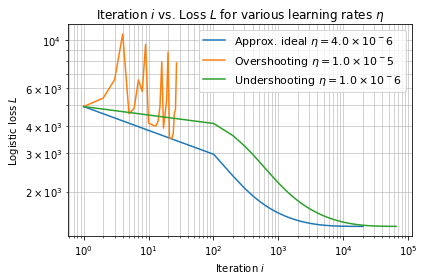

In [676]:
fig = plt.figure()
fig.set_size_inches(6, 4)
plt.plot(*list(np.array(steps[:]).T + 1), label="Approx. ideal $\\eta = 4.0 \\times 10^-6$")
plt.plot(*list(np.array(us_steps[:]).T + 1), label="Overshooting $\\eta = 1.0 \\times 10^-5$")
plt.plot(*list(np.array(os_steps[:]).T + 1), label="Undershooting $\\eta = 1.0 \\times 10^-6$")
# plt.xlim(-1, max(np.hstack([np.array(os_steps).T[1], np.array(us_steps).T[1], np.array(steps).T[1]])))
plt.xscale('log')
plt.yscale('log')
plt.legend(prop={'size': 11})
plt.grid(which='both', alpha=0.7)
plt.xlabel("Iteration $i$")
plt.ylabel("Logistic loss $L$")
plt.title("Iteration $i$ vs. Loss $L$ for various learning rates $\\eta$")
plt.tight_layout()
plt.savefig("graphs/loss_eta.pdf", format='pdf')
plt.show()

In [561]:
# save_ld((steps, us_steps, os_steps), "loss_graph_data")
steps, us_steps, os_steps = load_ld("loss_graph_data")

In [11]:
save_ld((scores, top_pars, all_pars), "relres_3_732_lidstone_005")
# scores, top_pars, all_pars = load_ld("relevance_results")

In [22]:
save_ld((scores, top_pars, all_pars), "relres_3_1010_dirichlet_0005_cv")

In [34]:
scores, top_pars = load_ld("relevance_results_reldists_ratio")
scores

[[{'usampl_ratio': 4.0}]]

In [13]:
scores, top_pars, all_pars = load_ld("relres_3_1010_dirichlet_0005_cv")
all_pars

[[[({'usampl_ratio': 8.754707249069181},
    (0.49466850020447634,
     0.38613861386138615,
     0.6880569306930694,
     0.3178886323436086,
     0.37355848565625793,
     0.27665926343744857,
     0.2457674655787863,
     0.2771420356526739,
     0.22077416399450298,
     0.24397163120567378,
     0.252076209086468,
     0.2363719651855245)),
   ({'usampl_ratio': 8.140267856586771},
    (0.49184269106342393,
     0.38366336633663367,
     0.6849834983498351,
     0.312174788562223,
     0.3689689642041127,
     0.27053259807343283,
     0.24042713567839194,
     0.2751293847038528,
     0.21349843819723335,
     0.23833955223880599,
     0.24963361016121152,
     0.22802320392681838)),
   ({'usampl_ratio': 8.193017468333876},
    (0.4980573065968106,
     0.3935643564356436,
     0.6780940594059406,
     0.3155947660586836,
     0.3788699543031226,
     0.2704301440608861,
     0.2432992263538807,
     0.28030477285796435,
     0.21492504409171076,
     0.24148319814600233,
     0.2

In [192]:
scores, top_pars, all_pars = load_ld("relres_3_732_dirichlet")
top_pars

[[((0.4008904638589796,
    0.3333333333333333,
    0.5027920227920227,
    0.19907436885458862,
    0.3251548024624948,
    0.1434506481452183,
    0.12180793262700353,
    0.2126007586533902,
    0.08535598705501618,
    0.1258523280732515,
    0.19803801348865727,
    0.09223300970873786),
   {'C': 0.723682436529208, 'usampl_ratio': 3.884710195363176})]]

In [200]:
scores, top_pars, all_pars = load_ld("relres_3_732_lidstone_015")
top_pars

[[((0.41773598311495624,
    0.3452991452991453,
    0.5286324786324786,
    0.21166140229658142,
    0.33323102823102824,
    0.1550836527566838,
    0.13843269591301088,
    0.21395456652758463,
    0.10231681631748142,
    0.1431614827439284,
    0.1991701244813278,
    0.1117392750249418),
   {'C': 1.7009284573978438, 'usampl_ratio': 6.418023264292275}),
  ((0.4028611679729761,
    0.3316239316239316,
    0.513076923076923,
    0.20318462401795737,
    0.3188435638435638,
    0.14909950827217017,
    0.13419131481899602,
    0.20579409048938133,
    0.09955332216638749,
    0.13666453128336536,
    0.18845700824499412,
    0.10720268006700168),
   {'C': -0.4902151795958245, 'usampl_ratio': 6.688013191287546})]]

In [ ]:
np.mean(sum([[t['C'] for t in tp] for tp in top_pars], []))

In [ ]:
top_pars

In [131]:
np.mean([s[0] for s in scores]), np.mean([s[4] for s in scores]), np.mean([s[8] for s in scores])

(0.2427248717630992, 0.4130693069306931, 0.17190429042904293)

In [129]:
np.mean([s[0] for s in scores]), np.mean([s[4] for s in scores]), np.mean([s[8] for s in scores])

(0.25805132823252663, 0.3817821782178218, 0.1949141914191419)

In [105]:
# Reduce unnecessary complexity by finding a threshold distance beyond which we can exclude the samples from training,
# as none of them are relevant, and are therefore unlikely to contribute information to the task of classifying relevant
# sentences at test time (add a small margin based on a fraction of the dataset size to account for the possibility)


In [24]:
i = np.nonzero(np.asarray(Y) == 1)[0][17]
# i = 455
idx_freqs[0][i], all_relsamples[i], res_dists[0, i], rel_data[all_relsamples[i][-2]]

NameError: name 'idx_freqs' is not defined

In [ ]:
# Try to seperate samples by the similarity measure alone (a 1D logistic regression)

In [34]:
from Models import *

In [64]:
m = LR(eta=1e-6, tol=1e-10, no_imp_stop=10, w_init='uniform', print_steps=10)
m.fit(X_train, Y_train)

|  iteration  |  accuracy  |  precision  |  recall  |  f1  |  f2  |
|  0  |  3453877.708596049  |  0.52237  |  0.0046645  |  0.5561097  |  0.0092514  |  0.0225654  |
|  10  |  3453877.7948727496  |  0.97199  |  0.0073892  |  0.0448878  |  0.0126895  |  0.0222772  |
Finished training (no loss improvement for 10 steps)


In [ ]:
# Draw learning curve (accuracy vs number of training datapoints)


In [91]:
x = np.asarray([[2,4],[-3,4],[5,3]])
y = np.array([1,2])
# np.sum(x * y, axis=1) / np.atleast_2d((np.sqrt(np.sum(x ** 2, axis=1)) * np.sqrt(np.sum(y ** 2))))
np.sum(x * y / np.atleast_2d((np.sqrt(np.sum(x ** 2, axis=1)) * np.sqrt(np.sum(y ** 2)))).T, axis=1)

array([1.        , 0.4472136 , 0.84366149])

In [37]:
# Figure out how long we should limit sentences to be when extracting embeddings (some outliers with len >1000 exist)
long_rel = 0
for i in range(len(rel_data)):
    for d_t in rel_data[i]["relevance_samples"]:
        for title, line, relevant in rel_data[i]["relevance_samples"][d_t]:
            if relevant and len(line.split(' ')) > 125:
                long_rel += 1
long_rel

0

In [51]:
claims

[{'id': 75397,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.',
  'evidence': [[[92206, 104971, 'Nikolaj_Coster-Waldau', 7],
    [92206, 104971, 'Fox_Broadcasting_Company', 0]]],
  'vocab': defaultdict(int,
              {'nikolaj': 1,
               'costerwaldau': 1,
               'worked': 1,
               'with': 1,
               'the': 1,
               'fox': 1,
               'broadcasting': 1,
               'company': 1})},
 {'id': 150448,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Roman Atwood is a content creator.',
  'evidence': [[[174271, 187498, 'Roman_Atwood', 1]],
   [[174271, 187499, 'Roman_Atwood', 3]]],
  'vocab': defaultdict(int,
              {'roman': 1,
               'atwood': 1,
               'is': 1,
               'a': 1,
               'content': 1,
               'creator': 1})},
 {'id': 214861,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  '

In [64]:
# Retrieve top-5 similar documents using Laplace smoothing with Lidstone correction (using epsilon=0.05)
res = eval_model(lidstone_ll, epsilon=0.05, claims_=claims)
acc = res[0]
print(acc)
pr(res[1])

Computing similarities...
Batches: 540


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=96)]: Done  96 tasks      | elapsed:  6.7min
[Parallel(n_jobs=96)]: Done 258 tasks      | elapsed: 11.6min
[Parallel(n_jobs=96)]: Done 458 out of 540 | elapsed: 17.8min remaining:  3.2min
[Parallel(n_jobs=96)]: Done 540 out of 540 | elapsed: 20.1min finished


Ranking documents...
Evaluating accuracy...
0.25666666666666665
[   [   (-88.32562602513612, 'Glossary_of_sumo_terms'),
        (-87.53034574001876, 'List_of_books_by_Jacob_Neusner'),
        (-87.09446736251365, 'List_of_video_game_crowdfunding_projects'),
        (-85.96664404030582, 'List_of_Latin_legal_terms'),
        (-85.88756594576691, 'List_of_songs_about_Paris')],
    [   (-113.69317923324901, 'Kanye_West_discography'),
        (-113.54722278740641, 'Outkast_discography'),
        (-110.87900565825775, 'Beyoncé_discography'),
        (-108.62218353065947, 'Ricky_Martin_singles_discography'),
        (-102.18636581560878, 'Snoop_Dogg_discography')],
    [   (-69.90791042003866, 'Alma_Ziegler'),
        (-69.85513001771425, 'Timeline_of_San_Bernardino,_California_history'),
        (-69.38033061091798, 'List_of_video_game_crowdfunding_projects'),
        (-68.90621816887726, 'Science_and_technology_in_Venezuela'),
        (-68.33329707121771, 'Wally_Donald')],
    [   (-97.3246

In [65]:
len(res[1])

100

In [132]:
similarities = [jm_ll(*wiki[doc_id]) for doc_id in D_ids]
print("Ranking documents...")
top_docs = []
for i in range(N_claims):
    sims = [(similarities[j][i], D_ids[j]) for j in range(N_docs)]
    sims.sort()
    top_docs.append(sims[-5:])
top_docs_ids = [[s[1] for s in s_] for s_ in top_docs]
print("Evaluating accuracy...")
recall = [np.mean([
    id_ in top_docs_ids[i] for id_ in set([s[2] for s in sum(claims[i]["evidence"], [])])]) \
                  for i in range(len(claims))]
np.mean(recall), top_docs

wat defaultdict(<class 'int'>, {'hunger': 0})


ZeroDivisionError: float division by zero

In [88]:
claims

[{'id': 75397,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.',
  'evidence': [[[92206, 104971, 'Nikolaj_Coster-Waldau', 7],
    [92206, 104971, 'Fox_Broadcasting_Company', 0]]],
  'vocab': defaultdict(int,
              {'nikolaj': 1,
               'costerwaldau': 1,
               'worked': 1,
               'with': 1,
               'the': 1,
               'fox': 1,
               'broadcasting': 1,
               'company': 1})},
 {'id': 150448,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Roman Atwood is a content creator.',
  'evidence': [[[174271, 187498, 'Roman_Atwood', 1]],
   [[174271, 187499, 'Roman_Atwood', 3]]],
  'vocab': defaultdict(int,
              {'roman': 1,
               'atwood': 1,
               'is': 1,
               'a': 1,
               'content': 1,
               'creator': 1})},
 {'id': 214861,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  '

In [13]:
claim_ids = [75397, 150448, 214861, 156709, 129629, 33078, 6744, 226034, 40190, 76253]
claims = []
claims_vocab = set()
with open(data_dir + "train.jsonl", 'r') as f:
    a = jsonlines.Reader(f)
    for a_ in a:
        if a_["id"] in claim_ids:
            claims.append(a_)
            claims[-1]["vocab"] = defaultdict(int)
            for w in a_["claim"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", ''). \
              translate(punc_trans).lower().split():
                claims[-1]["vocab"][w] += 1
                claims_vocab.add(w)

In [15]:
N_docs = 0
n_t = defaultdict(int)
i_ = 0
for fn in fs:
    with open(fn, 'r') as f:
        a = jsonlines.Reader(f)
        for a_ in a:
            if a_["id"] == "":
                continue
            N_docs += 1
            entry = [[w.translate(punc_trans).lower() for w in l.split()[1:] if w != \
                     '' and not ((any(c.isnumeric() for c in w) and len(w) > 7) or \
                                 (w.isnumeric() and len(w) > 5))] for l in a_[
                    "lines"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", '').split('\n') if \
                     len(l) > 0 and not (len(l) == 1 and l[0].isnumeric())]
            for w in set(sum(entry, [])):
                if w in claims_vocab:
                    n_t[w] += 1
    i_ += 1
    sys_print("\r" + str(i_))
N_docs

109

5416536

In [19]:
# Load each document and measure cosine similarity
similarities = {}
i_ = 0
for fn in fs:
    with open(fn, 'r') as f:
        a = jsonlines.Reader(f)
        for a_ in a:
            if a_["id"] == "":
                continue
            doc_tf = defaultdict(int)
            for l in ([w.translate(punc_trans).lower() for w in l.split()[1:] if w != \
                     '' and not ((any(c.isnumeric() for c in w) and len(w) > 7) or \
                                 (w.isnumeric() and len(w) > 5))] for l in a_[
                    "lines"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", '').split('\n') if \
                     len(l) > 0 and not (len(l) == 1 and l[0].isnumeric())):
                for w in l:
                    if w in claims_vocab:
                        doc_tf[w] += 1
            doc_tf = {w: doc_tf[w] * np.log(N_docs / n_t[w]) for w in doc_tf}
            similarities[a_["id"]] = [sum([doc_tf[w] for w in claim["vocab"] if w in doc_tf]) for claim in claims]
    i_ += 1
    sys_print("\r" + str(i_))
similarities = list(similarities.items())

109

In [22]:
top_docs = []
for i in range(10):
    sims = [(s[1][i], s[0]) for s in similarities]
    sims.sort()
    top_docs.append(sims[-5:])
top_docs

[[(566.179224990433, 'List_of_New_Jersey_street_railroads'),
  (579.0265022006889,
   'List_of_early_British_private_locomotive_manufacturers'),
  (580.2826817534418, 'List_of_OMIM_disorder_codes'),
  (920.8325654914589, 'Mottos_and_halls_of_the_Livery_Companies'),
  (1122.7571604226562, 'Pteropodinae')],
 [(236.04509710808153, 'History_of_the_Roman_Constitution'),
  (248.6656867489665, 'List_of_New_Zealand_religious_leaders'),
  (322.341723583277, 'List_of_New_Zealand_Catholic_bishops'),
  (331.034077391518, 'List_of_Catholic_schools_in_New_York'),
  (665.3830074019156, 'History_of_Rome_-LRB-disambiguation-RRB-')],
 [(943.9322647631498, 'Western_literature'),
  (1089.2646242221958, 'List_of_New_Music_America_performances'),
  (1261.5168052555575, 'List_of_national_theatres'),
  (1418.3355392869555, 'List_of_books_by_Jacob_Neusner'),
  (1574.613579602451,
   'List_of_artists_in_the_Philadelphia_Museum_of_Art_handbook_of_the_collections')],
 [(127.08135108472278, 'List_of_This_Is_Daniel

In [26]:
# Query-likelihood unigram language modelling (unsmoothed)
def prod(xs):
    if len(xs) == 0:
        return 0
    if len(xs) > 1:
        return xs[0] * prod(xs[1:])
    return xs[0]
likelihoods = {}
i_ = 0
for fn in fs:
    with open(fn, 'r') as f:
        a = jsonlines.Reader(f)
        for a_ in a:
            if a_["id"] == "":
                continue
            doc_M = defaultdict(int)
            total = 0
            for l in ([w.translate(punc_trans).lower() for w in l.split()[1:] if w != \
                     '' and not ((any(c.isnumeric() for c in w) and len(w) > 7) or \
                                 (w.isnumeric() and len(w) > 5))] for l in a_[
                    "lines"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", '').split('\n') if \
                     len(l) > 0 and not (len(l) == 1 and l[0].isnumeric())):
                for w in l:
                    if w in claims_vocab:
                        doc_M[w] += 1
                    total += 1
            doc_M = {w: doc_M[w] / total for w in doc_M}
            likelihoods[a_["id"]] = [prod([doc_M[w] for w in claim["vocab"] if w in doc_M]) for claim in claims]
    i_ += 1
    sys_print("\r" + str(i_))
likelihoods = list(likelihoods.items())

109

In [27]:
top_docs_us = []
for i in range(10):
    sims = [(s[1][i], s[0]) for s in likelihoods]
    sims.sort()
    top_docs_us.append(sims[-5:])
top_docs_us

[[(0.34615384615384615, 'The_Last_of_the_Jedi-COLON-_Against_the_Empire'),
  (0.35714285714285715, 'The_Glitterati_-LRB-album-RRB-'),
  (0.36363636363636365, 'The_Kabeedies_discography'),
  (0.375, 'On_air'),
  (0.38461538461538464, 'Public_holidays_in_the_Bahamas')],
 [(0.2857142857142857, 'List_of_fictional_alien_species-COLON-_A'),
  (0.3157894736842105, 'C30H50O4'),
  (0.3333333333333333, 'List_of_Members_of_the_Canadian_Senate_-LRB-A-RRB-'),
  (0.3333333333333333, 'Purpuric_acid'),
  (0.3333333333333333, 'Reem_-LRB-given_name-RRB-')],
 [(0.40625, 'Portuguese-language_literature'),
  (0.41935483870967744, 'East_Asian_poetry'),
  (0.42857142857142855, 'Arts_by_region'),
  (0.4523809523809524, 'Yugoslav_literature'),
  (0.5, 'Testament_of_Qahat')],
 [(0.25, 'Diosmetinidin'),
  (0.25, 'Ruether'),
  (0.2608695652173913, 'List_of_DC_Comics_characters-COLON-_K'),
  (0.3333333333333333, 'Purpuric_acid'),
  (0.3333333333333333, 'Reem_-LRB-given_name-RRB-')],
 [(0.373134328358209, 'Constitu

In [47]:
# Import wikipedia dataset document word counts for the claim vocabulary
wiki = {}
i_ = 0
for fn in fs:
    with open(fn, 'r') as f:
        a = jsonlines.Reader(f)
        for a_ in a:
            if a_["id"] == "":
                continue
            doc_M = defaultdict(int)
            total = 0
            for l in ([w.translate(punc_trans).lower() for w in l.split()[1:] if w != \
                     '' and not ((any(c.isnumeric() for c in w) and len(w) > 7) or \
                                 (w.isnumeric() and len(w) > 5))] for l in a_[
                    "lines"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", '').split('\n') if \
                     len(l) > 0 and not (len(l) == 1 and l[0].isnumeric())):
                for w in l:
                    if w in claims_vocab:
                        doc_M[w] += 1
                    total += 1
            wiki[a_["id"]] = doc_M, total
    i_ += 1
    sys_print("\r" + str(i_))
N_docs = len(wiki)
N_docs

5416536

In [49]:

top_docs_ls

[[(-93.88792155564518, 'Peter_Windsor'),
  (-93.3362426640573, 'Mike_Darnell'),
  (-93.2490523905636, "List_of_Bob's_Burgers_episodes"),
  (-93.14458474306068, 'Jimmy_Hodson'),
  (-92.12060364493253, 'Joel_Cheatwood')],
 [(-71.50651994917307, 'Ríos'),
  (-71.29546258204249, 'Giancarlo_Volpe'),
  (-70.35450291570794, 'List_of_essential_oils'),
  (-67.08361379838946, 'List_of_Latin_legal_terms'),
  (-64.71084161996984, 'List_of_video_game_crowdfunding_projects')],
 [(-212.1720252860265, 'List_of_New_Music_America_performances'),
  (-211.8780699805498, 'Narrative'),
  (-211.516743391354, 'List_of_Guggenheim_Fellowships_awarded_in_1968'),
  (-209.68037646198567, 'Acropolis_Institute_of_Technology_and_Research'),
  (-190.23549854041386, 'History_of_art')],
 [(-60.642762136163455, 'Loni_Love'),
  (-60.63228118073983, 'Jeannie_Mai'),
  (-60.41817178428785, 'Roy_"Royalty"_Hamilton'),
  (-60.251009380271654, 'Tamar_Braxton'),
  (-59.94750735936245, 'Adrienne_Bailon')],
 [(-169.6512907398757, 'L

0.75

In [31]:
claims

[{'id': 75397,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.',
  'evidence': [[[92206, 104971, 'Nikolaj_Coster-Waldau', 7],
    [92206, 104971, 'Fox_Broadcasting_Company', 0]]],
  'vocab': defaultdict(int,
              {'nikolaj': 1,
               'costerwaldau': 1,
               'worked': 1,
               'with': 1,
               'the': 1,
               'fox': 1,
               'broadcasting': 1,
               'company': 1})},
 {'id': 150448,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Roman Atwood is a content creator.',
  'evidence': [[[174271, 187498, 'Roman_Atwood', 1]],
   [[174271, 187499, 'Roman_Atwood', 3]]],
  'vocab': defaultdict(int,
              {'roman': 1,
               'atwood': 1,
               'is': 1,
               'a': 1,
               'content': 1,
               'creator': 1})},
 {'id': 214861,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  '

In [ ]:
# Evaluate distances
arg_min_idx = 3    # Minimum index into the sentence to end truncation for minimising distance to query (experimental)
res = np.empty((len(dist_funcs), len(all_relsamples), 1024))
i_ = -1
idx_freqs = [[] for _ in range(len(dist_funcs))]
for j in range(n_elmo_bats):
    rel_bat = all_relsamples[j * elmo_bsize:(j + 1) * elmo_bsize]
    elmo_samples = load_ld("H:\Code\IR\data\learning_data\elmo_res_" + str(j) + ".data", pad=False)
#     pr(elmo_samples[0])
#     break
    for i in range(elmo_samples.shape[0]):
        i_ += 1
#         print(rel_data[rel_bat[i][4]]["claim"])
#         print(rel_bat[i][1])
        query_elmo = query_elmos[rel_bat[i][4]]
        elmo_sample = elmo_samples[i]
        elmo_comps = [eval_comps(elmo_sample, f, query_elmo) for (_, f) in dist_funcs]
        elmo_dists = [eval_dists(elmo_comps[k], dist_funcs[k][0]) for k in range(len(dist_funcs))]
        n_words = rel_bat[i][5]
        title_len = len(rel_bat[i][0].split(' '))
        min_idx = max(min(title_len + arg_min_idx + 1, n_words - 2), 0)
        for k in range(len(dist_funcs)):
#             print(elmo_dists[k].round(3))
#             print((n_words - 1,
#                     max(title_len + arg_min_idx + 1, 
#                     np.argmin(elmo_dists[k]))))
#             if min_idx >= n_words - 1:
#                 print(rel_data[rel_bat[i][4]]["claim"])
#                 print(rel_bat[i][0], rel_bat[i][1])
#                 print(elmo_dists[k])
#                 print(min_idx, n_words - 1)
#             try:
            idx = min_idx + np.argmin(elmo_dists[k][min_idx:max(n_words - 1, 1)])
#             except:
#                 print(rel_data[rel_bat[i][4]]["claim"])
#                 print(rel_bat[i][0], ' : ', rel_bat[i][1])
#                 print(elmo_dists[k])
#                 print(min_idx, n_words - 1)
#                 print("Unexpected error:", sys.exc_info()[0])
#                 raise
#             print(idx, elmo_dists[k][idx])
#             print(n_words - 1 == idx)
            idx_freqs[k].append((n_words, idx))
#             if not n_words - 1 == idx:
#             if True:
#                 print(rel_data[rel_bat[i][4]]["claim"])
#                 print(rel_bat[i][1])
#                 print(elmo_dists[k])
#                 print(idx, elmo_dists[k][idx])
#                 print(np.argmin(elmo_dists[k]), elmo_dists[k][np.argmin(elmo_dists[k])])
#                 print(elmo_dists[k][idx])
#                 print(elmo_comps[k][idx])
#                 print(sum(elmo_comps[k][idx]))
#                 sys.exit()
            res[k, i_] = elmo_comps[k][idx]
    del elmo_samples
    gc.collect()
    sys_print("\rBatch " + str(j + 1) + '/' + str(n_elmo_bats) + '     ')

In [167]:
query_incl_fstop = True   # Whether to include the fullstop at the end of the claim
query_use_mean = False          # Whether to use the mean of the words rather than the last word
query_model = True      # Whether to weight words according to probability of occuring in the specific query
def rem_fullstop(x):
    return x[:-1].strip() if x[-1] == '.' and not query_incl_fstop else x
query_elmos = []
n_batches = 8
for i in range(n_batches):
    i_, i__ = i * (len(rel_data) // n_batches), ((i + 1) * (len(rel_data) // n_batches)) if i < n_batches - 1 else len(rel_data)
    ix = [len(rem_fullstop(claim["relevance_claim"]).split(' ')) - (0 if query_use_mean else 1) for claim in rel_data[i_:i__]]
    xs = elmo_vectors([rem_fullstop(claim["relevance_claim"]) for claim in rel_data[i_:i__]])
    query_elmos += [np.vstack([np.mean(xs[j, :ix[j]], axis=0) for j in range(len(xs))]) if query_use_mean else \
                    xs[range(len(xs)), ix]]
    sys_print("\r" + str(i + 1) + '/' + str(n_batches))
query_elmos = np.vstack(query_elmos)
# from sklearn.linear_model import *
#             [("model", LogisticRegression(C=10.0 ** C, penalty='l2', solver="liblinear"))])

8/8

In [252]:
scores, top_pars, all_pars, all_probs = relevance_evaluation(optimise_C=False,  # Test best n-D LR (3075-D; all features)
      optimise_eta=False, optimise_feat_pc=False, optimise_n_pca=False, optimise_ratio=False, optimise_proximity=False,
      C=1.127, feat_pc=2, n_pca=4, usampl_ratio=7.5, n_reps=10, cv_k=10)

Run 1 Fold 1/10     Press Enter to continue, 's' to stop, 'f' to automate: f
Run 1 Fold 2/10     Run 1 Fold 3/10     Run 1 Fold 4/10     Run 1 Fold 5/10     Run 1 Fold 6/10     Run 1 Fold 7/10     Run 1 Fold 8/10     Run 1 Fold 9/10     Run 1 Fold 10/10     (0.5030983797774532, 0.39900990099009903, 0.6806600660066007, 0.31736479559720143, 0.383979980415624, 0.2704461507808788, 0.20900317460317464, 0.26910279991825053, 0.17084728169196836, 0.20914624629311693, 0.24479356960175375, 0.18256130790190736)
Run 2 Fold 1/10     Run 2 Fold 2/10     Run 2 Fold 3/10     Run 2 Fold 4/10     Run 2 Fold 5/10     Run 2 Fold 6/10     Run 2 Fold 7/10     Run 2 Fold 8/10     Run 2 Fold 9/10     Run 2 Fold 10/10     (0.5032184998699132, 0.4, 0.6782343234323432, 0.3190044266117886, 0.38612169458704115, 0.2717650951448861, 0.21426484282182193, 0.27275086858777847, 0.17643240527749138, 0.2139138665404638, 0.24771647789550602, 0.18822876179900055)
Run 3 Fold 1/10     Run 3 Fold 2/10     Run 3 Fold 3/10     R